# **Credit Risk Modeling - Monitoring**

In this part of our work, we are going to preprocess a new data to determine whether the population has changed and assess whether we can keep the original PD model or rebuild the model.  
We will introduce the population stability index (PSI) as a measure that evaluates two popuations. PSI can be used to assess whether the population of new loan applicants differs from the population of applicants on which the PD model was built. The formula below is used ti calculate the PSI:  

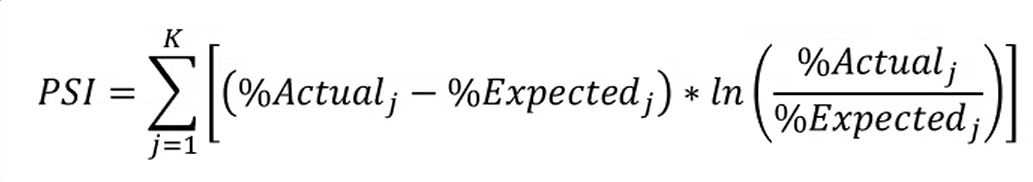

### **Import libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# load the original (actual) population
loan_inputs_train = pd.read_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_inputs_train.csv', index_col = 0)
loan_targets_train = pd.read_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_targets_train.csv', index_col = 0)
loan_inputs_test = pd.read_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_inputs_test.csv', index_col = 0)
loan_targets_test = pd.read_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_targets_test.csv', index_col = 0)

# next, let's import the dataset of 2015
loan_data_2015_backup = pd.read_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_2015.csv')

# copy the "loan_data_2015" dataframe
loan_data_2015 = loan_data_2015_backup.copy()

# display the the first rows of "loan_data_2015"
pd.options.display.max_columns = None
loan_data_2015.head()

C:\Users\Aylan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68444620   73334399      35000        35000          35000.0   60 months   
1  68547583   73437441       8650         8650           8650.0   36 months   
2  67849662   72708407       4225         4225           4225.0   36 months   
3  68506885   73396712      10000        10000          10000.0   60 months   
4  68341763   72928789      20000        20000          20000.0   60 months   

   int_rate  installment grade sub_grade                emp_title emp_length  \
0     11.99       778.38     C        C1  Foreign Service Officer  10+ years   
1      5.32       260.50     A        A1     Associate Consultant   < 1 year   
2     14.85       146.16     C        C5                 mechanic    5 years   
3     11.99       222.40     C        C1      CARDIOVASCULAR TECH  10+ years   
4     10.78       432.66     B        B4             truck driver  10+ years   

  home_ownership  annual_inc verification_status issue_d loan_status  \
0       MORTGAGE    128000.0     Source Verified  Dec-15      Issued   
1       MORTGAGE    100000.0        Not Verified  Dec-15      Issued   
2           RENT     35000.0     Source Verified  Dec-15      Issued   
3           RENT     42500.0        Not Verified  Dec-15      Issued   
4       MORTGAGE     63000.0        Not Verified  Dec-15      Issued   

  pymnt_plan                                                url desc  \
0          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
1          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
2          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
3          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
4          n  https://www.lendingclub.com/browse/loanDetail....  NaN   

              purpose                    title zip_code addr_state    dti  \
0    home_improvement         Home improvement    200xx         DC   6.46   
1         credit_card  Credit card refinancing    462xx         IN   7.28   
2  debt_consolidation       Debt consolidation    672xx         KS  15.22   
3  debt_consolidation       Debt consolidation    460xx         IN  31.04   
4    home_improvement                      NaN    605xx         IL  10.78   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0          0.0           Feb-90             0.0                    46.0   
1          0.0           Jul-01             0.0                     NaN   
2          2.0           Jul-11             0.0                    18.0   
3          0.0           Dec-98             1.0                     NaN   
4          0.0           Aug-00             0.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN      17.0      0.0      14277        27.4   
1                     NaN      15.0      0.0       7158        26.7   
2                     NaN       6.0      0.0       1058        24.6   
3                     NaN      10.0      0.0       5812        40.9   
4                     NaN       6.0      0.0       7869        56.2   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0       46.0                   w    35000.0        35000.0          0.0   
1       24.0                   w     8650.0         8650.0          0.0   
2        6.0                   w     4225.0         4225.0          0.0   
3       23.0                   w    10000.0        10000.0          0.0   
4       18.0                   w    20000.0        20000.0          0.0   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0              0.0              0.0            0.0                 0.0   
1              0.0              0.0            0.0                 0.0   
2              0.0              0.0            0.0                 0.0   
3              0.0              0.0            0.0                 0.0   
4              0.0       

### **Population Stability Index: Preprocessing**  
We need to preprocess the new data the same way we preprocessed the train and test data. Since we already have such a code, we can reuse it from the "Credit Risk Modeling - Part 1" notebook.   

**>>> The code from here to the other line starting with ">>>" is copied from the "Credit Risk Modeling - Part 1" notebook, with some adjustments. We have to perform exactly the same data preprocessing, fine classing and coarse classing on the new data, in order to be able to calculate statistics for the exact same variables to the ones we used for training and testing the PD model.**

#### Preprocessing continuous variables

In [3]:
# print some relevant information on the dataset with the df.info() method
loan_data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

In [4]:
# let's make sure our continuous variables are numeric
# going through the list with variable types we can see that the term and employment length variables are not numeric, they are rather objects 
# print the the unique values of the "emp_length" column
loan_data_2015['emp_length'].unique()

array(['10+ years', '< 1 year', '5 years', '3 years', '4 years', nan,
       '2 years', '8 years', '9 years', '1 year', '6 years', '7 years'],
      dtype=object)

In [5]:
# we have values "more than 10 years", "less than 1 year", and then all the values from 1-9 years 
# we have some missing values too
# the values are sorted as text because they have the word "years" at the end of each
# so, to turn most of these values into integer, we need to get rid of the years string
# we also need to get rid of the following characters: "+", "<", " year"
# the following lines of code will remove the mentionned characters using the str.replace() method and assign the result to a new variable named "emp_length_int"
loan_data_2015['emp_length_int'] = loan_data_2015['emp_length'].str.replace('\+ years', '')  
loan_data_2015['emp_length_int'] = loan_data_2015['emp_length_int'].str.replace('< 1 year', str(0))
loan_data_2015['emp_length_int'] = loan_data_2015['emp_length_int'].str.replace('n/a', str(0))
loan_data_2015['emp_length_int'] = loan_data_2015['emp_length_int'].str.replace(' years', '')
loan_data_2015['emp_length_int'] = loan_data_2015['emp_length_int'].str.replace(' year', '')

# check the type of the new column
loan_data_2015['emp_length_int'].dtype

dtype('O')

In [6]:
# convert the new column to numeric type 
loan_data_2015['emp_length_int'] = pd.to_numeric(loan_data_2015['emp_length_int'])

# check again the type of the new column
loan_data_2015['emp_length_int'].dtype

dtype('float64')

In [7]:
# check the new column
loan_data_2015.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68444620   73334399      35000        35000          35000.0   60 months   
1  68547583   73437441       8650         8650           8650.0   36 months   
2  67849662   72708407       4225         4225           4225.0   36 months   
3  68506885   73396712      10000        10000          10000.0   60 months   
4  68341763   72928789      20000        20000          20000.0   60 months   

   int_rate  installment grade sub_grade                emp_title emp_length  \
0     11.99       778.38     C        C1  Foreign Service Officer  10+ years   
1      5.32       260.50     A        A1     Associate Consultant   < 1 year   
2     14.85       146.16     C        C5                 mechanic    5 years   
3     11.99       222.40     C        C1      CARDIOVASCULAR TECH  10+ years   
4     10.78       432.66     B        B4             truck driver  10+ years   

  home_ownership  annual_inc verification_status issue_d loan_status  \
0       MORTGAGE    128000.0     Source Verified  Dec-15      Issued   
1       MORTGAGE    100000.0        Not Verified  Dec-15      Issued   
2           RENT     35000.0     Source Verified  Dec-15      Issued   
3           RENT     42500.0        Not Verified  Dec-15      Issued   
4       MORTGAGE     63000.0        Not Verified  Dec-15      Issued   

  pymnt_plan                                                url desc  \
0          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
1          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
2          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
3          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
4          n  https://www.lendingclub.com/browse/loanDetail....  NaN   

              purpose                    title zip_code addr_state    dti  \
0    home_improvement         Home improvement    200xx         DC   6.46   
1         credit_card  Credit card refinancing    462xx         IN   7.28   
2  debt_consolidation       Debt consolidation    672xx         KS  15.22   
3  debt_consolidation       Debt consolidation    460xx         IN  31.04   
4    home_improvement                      NaN    605xx         IL  10.78   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0          0.0           Feb-90             0.0                    46.0   
1          0.0           Jul-01             0.0                     NaN   
2          2.0           Jul-11             0.0                    18.0   
3          0.0           Dec-98             1.0                     NaN   
4          0.0           Aug-00             0.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN      17.0      0.0      14277        27.4   
1                     NaN      15.0      0.0       7158        26.7   
2                     NaN       6.0      0.0       1058        24.6   
3                     NaN      10.0      0.0       5812        40.9   
4                     NaN       6.0      0.0       7869        56.2   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0       46.0                   w    35000.0        35000.0          0.0   
1       24.0                   w     8650.0         8650.0          0.0   
2        6.0                   w     4225.0         4225.0          0.0   
3       23.0                   w    10000.0        10000.0          0.0   
4       18.0                   w    20000.0        20000.0          0.0   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0              0.0              0.0            0.0                 0.0   
1              0.0              0.0            0.0                 0.0   
2              0.0              0.0            0.0                 0.0   
3              0.0              0.0            0.0                 0.0   
4              0.0       

In [8]:
# print the the unique values of the new "emp_length_int" column
loan_data_2015['emp_length_int'].unique()

array([10.,  0.,  5.,  3.,  4., nan,  2.,  8.,  9.,  1.,  6.,  7.])

In [9]:
# print the the unique values of the "emp_length" column
loan_data_2015['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [10]:
# we have values " 36 months", " 60 months", and then all the values from 1-9 years 
# the values are sorted as text because they have the word "months" at the end of each
# so, to turn most of these values into integer, we need to get rid of the months string
# the following lines of code will remove the mentionned characters using the str.replace() method and assign the result to a new variable named "term_int"
loan_data_2015['term_int'] = loan_data_2015['term'].str.replace(' months', '')  

# check type of the new column
loan_data_2015['term_int'].dtype

dtype('O')

In [11]:
# convert the new column to numeric type 
loan_data_2015['term_int'] = pd.to_numeric(loan_data_2015['term_int'])

In [12]:
# print the the unique values of the new "term_int" column
loan_data_2015['term_int'].unique()

array([60, 36], dtype=int64)

In [13]:
# check again type of the new column
loan_data_2015['term_int'].dtype

dtype('int64')

In [14]:
# next, let's process the "earliest_cr_line" and "issued_d" columns
# these variables are strings but they are actually supposed to be date variables
# what we can do with them is to calculate the time that has passed since each of these events,
# time since the earliest credit line was issued and time since the loan was issued
# first we will calculate the number of months since the earliest credit line was issued, and then we'll calculate the number of months since the loan was issued
# let's begin by examining the "earliest_cr_line" variable
loan_data_2015['earliest_cr_line']

0         Feb-90
1         Jul-01
2         Jul-11
3         Dec-98
4         Aug-00
           ...  
421089    Sep-04
421090    Mar-74
421091    Sep-03
421092    Oct-03
421093    Dec-01
Name: earliest_cr_line, Length: 421094, dtype: object

In [15]:
# we can see that this variable contains information composed of three letters descripbing a month followed by a hyphen, followed by the last two digits of the year
# we need to turn these strings to timestamps and save the result in a new column
loan_data_2015['earliest_cr_line_date'] = pd.to_datetime(loan_data_2015['earliest_cr_line'], format = '%b-%y')

# to calculate the time that has passed we need to to set a reference date 
# I took "december 1st, 2017 as a reference date, we can also take today's date if we want
# first we caculate the number of days between the reference date and earliest credit line date
n_day = pd.to_datetime('2017-12-1') - loan_data_2015['earliest_cr_line_date']

# next, we will use this result to calculate the difference in months
loan_data_2015['mth_since_earliest_cr_line'] = round(n_day / np.timedelta64(1, 'M'))

# let's analyze this column with the df.describe() method and explore what's inside
loan_data_2015['mth_since_earliest_cr_line'].describe()

count    421094.000000
mean        227.354876
std          98.123989
min        -612.000000
25%         167.000000
50%         212.000000
75%         277.000000
max         587.000000
Name: mth_since_earliest_cr_line, dtype: float64

In [16]:
# the descriptive statistics show that everything is normal except for the min value which is negative
# it's impossible to have a negative time difference between the time in the future and the time in the past
# we need to further explore and solve this issue
# we can display the data points where the negative time differences were calculated 
# to do that, we select all the data points where the "mth_since_earliest_cr_line" < 0
loan_data_2015.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'mth_since_earliest_cr_line']][loan_data_2015['mth_since_earliest_cr_line'] < 0]

earliest_cr_line earliest_cr_line_date  mth_since_earliest_cr_line
254              Jan-57            2057-01-01                      -469.0
618              Aug-64            2064-08-01                      -560.0
648              Jul-68            2068-07-01                      -607.0
1808             Jan-65            2065-01-01                      -565.0
2583             Sep-64            2064-09-01                      -561.0
...                 ...                   ...                         ...
418890           Jun-68            2068-06-01                      -606.0
420450           Jan-66            2066-01-01                      -577.0
420642           Sep-68            2068-09-01                      -609.0
420794           Sep-65            2065-09-01                      -573.0
420887           Apr-63            2063-04-01                      -544.0

[1134 rows x 3 columns]

In [17]:
# it seems that the "mth_since_earliest_cr_line" column contains many negative time differences
# this is because the "earliest_cr_line_date" is way into the future after the year 2060
# I think that what has happend is when we were turning strings into dates that with the number 60 (or more) were not interpreted correctly,
# and turned into year 2060 (or more) instead of 1960 (ore more)
# this is still a hypothesis because I didn't check all the rows
# I think the issues arose most likely because the origin of the built-in time scale starts after 1970
# the best way to solve this problem is turn the 2060 dates into 1960 dates and recalculate the difference
# however this process can be difficult and time consuming 
# since this problem concerns only 1169 rows out of more than 466,000 rows we can remove them and I don't think this will impact our results
# but there is a better solution by imputing the negative values by the maximum observed value
# I chose the max value because most of the dates in the "earliest_cr_line_date" column are in the 1960s so the difference in time would be among the highest
loan_data_2015['mth_since_earliest_cr_line'][loan_data_2015['mth_since_earliest_cr_line'] < 0] = loan_data_2015['mth_since_earliest_cr_line'].max()

# run the df.describe() method again to check the results
loan_data_2015['mth_since_earliest_cr_line'].describe()

<ipython-input-17-2e12087c6f04>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_2015['mth_since_earliest_cr_line'][loan_data_2015['mth_since_earliest_cr_line'] < 0] = loan_data_2015['mth_since_earliest_cr_line'].max()


count    421094.000000
mean        230.471220
std          90.827636
min          61.000000
25%         168.000000
50%         212.000000
75%         278.000000
max         587.000000
Name: mth_since_earliest_cr_line, dtype: float64

In [18]:
# the minimum value is now 73
# let's examine the "issue_d" and do the same processing
loan_data_2015['issue_d']

0         Dec-15
1         Dec-15
2         Dec-15
3         Dec-15
4         Dec-15
           ...  
421089    Jan-15
421090    Jan-15
421091    Jan-15
421092    Jan-15
421093    Jan-15
Name: issue_d, Length: 421094, dtype: object

In [19]:
# we can see that this variable contains information composed of three letters descripbing a month followed by a hyphen, followed by the last two digits of the year
# we need to turn these strings to timestamps and save the result in a new column
loan_data_2015['issue_date'] = pd.to_datetime(loan_data_2015['issue_d'], format = '%b-%y')

# to calculate the time that has passed we need to set a reference date 
# I took "december 1st, 2017 as a reference date, we can also take today's date if we want
# first we caculate the number of days between the reference date and earliest credit line date
n_day = pd.to_datetime('2017-12-1') - loan_data_2015['issue_date']

# next, we will use this result to calculate the difference in months
loan_data_2015['mth_issue_date'] = round(n_day / np.timedelta64(1, 'M'))

# let's analyze this column with the df.describe() method and explore what's inside
loan_data_2015['mth_issue_date'].describe()

count    421094.000000
mean         29.044629
std           3.458162
min          24.000000
25%          26.000000
50%          29.000000
75%          32.000000
max          35.000000
Name: mth_issue_date, dtype: float64

#### Preprocessing discrete variables  
In this part of our work, we will preprocess some discrete features.

In [20]:
# explore the features with df.info() method
loan_data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           421094 non-null  int64         
 1   member_id                    421094 non-null  int64         
 2   loan_amnt                    421094 non-null  int64         
 3   funded_amnt                  421094 non-null  int64         
 4   funded_amnt_inv              421094 non-null  float64       
 5   term                         421094 non-null  object        
 6   int_rate                     421094 non-null  float64       
 7   installment                  421094 non-null  float64       
 8   grade                        421094 non-null  object        
 9   sub_grade                    421094 non-null  object        
 10  emp_title                    397220 non-null  object        
 11  emp_length                

In [21]:
# after exploring the features, I decided to focus on these discrete variables:
# "grade", "sub_grade", "home_ownership", "verification_status", "loan_status", "purpose", "addr_state", "initial_list_status"
# what we'll do is to create dummy variables for all categories of the discrete features
# it's worth mentioning that we only need k-1 dummy variables to represent the information about k categories
loan_dummies = [pd.get_dummies(data = loan_data_2015['grade'], prefix = 'grade', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2015['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2015['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2015['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2015['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2015['purpose'], prefix = 'purpose', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2015['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2015['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

# convert loan_dummies to a dataframe
loan_dummies = pd.concat(loan_dummies, axis = 1)

# concatenate the loan_dummies dataframe with the original dataframe
loan_data_2015 = pd.concat([loan_data_2015, loan_dummies], axis = 1)

# display the concatenated dataframe
loan_data_2015.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68444620   73334399      35000        35000          35000.0   60 months   
1  68547583   73437441       8650         8650           8650.0   36 months   
2  67849662   72708407       4225         4225           4225.0   36 months   
3  68506885   73396712      10000        10000          10000.0   60 months   
4  68341763   72928789      20000        20000          20000.0   60 months   

   int_rate  installment grade sub_grade                emp_title emp_length  \
0     11.99       778.38     C        C1  Foreign Service Officer  10+ years   
1      5.32       260.50     A        A1     Associate Consultant   < 1 year   
2     14.85       146.16     C        C5                 mechanic    5 years   
3     11.99       222.40     C        C1      CARDIOVASCULAR TECH  10+ years   
4     10.78       432.66     B        B4             truck driver  10+ years   

  home_ownership  annual_inc verification_status issue_d loan_status  \
0       MORTGAGE    128000.0     Source Verified  Dec-15      Issued   
1       MORTGAGE    100000.0        Not Verified  Dec-15      Issued   
2           RENT     35000.0     Source Verified  Dec-15      Issued   
3           RENT     42500.0        Not Verified  Dec-15      Issued   
4       MORTGAGE     63000.0        Not Verified  Dec-15      Issued   

  pymnt_plan                                                url desc  \
0          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
1          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
2          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
3          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
4          n  https://www.lendingclub.com/browse/loanDetail....  NaN   

              purpose                    title zip_code addr_state    dti  \
0    home_improvement         Home improvement    200xx         DC   6.46   
1         credit_card  Credit card refinancing    462xx         IN   7.28   
2  debt_consolidation       Debt consolidation    672xx         KS  15.22   
3  debt_consolidation       Debt consolidation    460xx         IN  31.04   
4    home_improvement                      NaN    605xx         IL  10.78   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0          0.0           Feb-90             0.0                    46.0   
1          0.0           Jul-01             0.0                     NaN   
2          2.0           Jul-11             0.0                    18.0   
3          0.0           Dec-98             1.0                     NaN   
4          0.0           Aug-00             0.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN      17.0      0.0      14277        27.4   
1                     NaN      15.0      0.0       7158        26.7   
2                     NaN       6.0      0.0       1058        24.6   
3                     NaN      10.0      0.0       5812        40.9   
4                     NaN       6.0      0.0       7869        56.2   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0       46.0                   w    35000.0        35000.0          0.0   
1       24.0                   w     8650.0         8650.0          0.0   
2        6.0                   w     4225.0         4225.0          0.0   
3       23.0                   w    10000.0        10000.0          0.0   
4       18.0                   w    20000.0        20000.0          0.0   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0              0.0              0.0            0.0                 0.0   
1              0.0              0.0            0.0                 0.0   
2              0.0              0.0            0.0                 0.0   
3              0.0              0.0            0.0                 0.0   
4              0.0       

#### Check for missing values

In [22]:
# let's check for missing values with the df.isnull() method
pd.options.display.max_rows = None
loan_data_2015.isnull().sum()

id                                          0
member_id                                   0
loan_amnt                                   0
funded_amnt                                 0
funded_amnt_inv                             0
term                                        0
int_rate                                    0
installment                                 0
grade                                       0
sub_grade                                   0
emp_title                               23874
emp_length                              23817
home_ownership                              0
annual_inc                                  0
verification_status                         0
issue_d                                     0
loan_status                                 0
pymnt_plan                                  0
url                                         0
desc                                   421049
purpose                                     0
title                             

In [23]:
# we can see that many columns have missing values
# let's impute the missing values for the variables we are going to use for our model

# replace the missing values in the "total_rev_hi_lim" with the corresponding values in the "funded_amnt" column
loan_data_2015['total_rev_hi_lim'].fillna(loan_data_2015['funded_amnt'], inplace = True)

# replace the missing values in the "annual_inc" with the mean of the same column
loan_data_2015['annual_inc'].fillna(loan_data_2015['annual_inc'].mean(), inplace = True)

# replace the missing values with zeroes for the following columns: 
# "mths_since_earliest_cr_line", "acc_now_delinq", "total_acc", "pub_rec", "open_acc", "inq_last_6mths", "delinq_2yrs", "emp_length_int"
loan_data_2015['mth_since_earliest_cr_line'].fillna(0, inplace = True)
loan_data_2015['acc_now_delinq'].fillna(0, inplace = True)
loan_data_2015['total_acc'].fillna(0, inplace = True)
loan_data_2015['pub_rec'].fillna(0, inplace = True)
loan_data_2015['open_acc'].fillna(0, inplace = True)
loan_data_2015['inq_last_6mths'].fillna(0, inplace = True)
loan_data_2015['delinq_2yrs'].fillna(0, inplace = True)
loan_data_2015['emp_length_int'].fillna(0, inplace = True)

### **PD Model**

#### Establishing the dependant variable

In [24]:
# first we need to establish the dependant variable
# we are interested in the borrowers and the respective loanson which they have defaulted or not
# we call loans that have been defaulted bad while we call those which performed well good
# we'll create a dependant variable of a binary type, 0 will stand for default (or bad loan) and 1 will stand for non-default (or good loan)
# to define the dependant variable here, we need to take a look at the information we have in the "loan_status" column
# let's display the unique values of this column
loan_data_2015['loan_status'].unique()

array(['Issued', 'Current', 'Fully Paid', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off',
       'Default'], dtype=object)

In [25]:
# as we can see, the column contains 10 unique values
# obviously, accounts that have been fully paid have not defaulted
# same applies to "Current" and "In Grace Period"
# on the other hand, "Charged Off" accounts have definitely defaulted, therefore they are bad, same goes to status "Default"
# let's use the df.value_counts() method to see how many counts there are for each status
loan_data_2015['loan_status'].value_counts()

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

In [26]:
# calculate the proportion
loan_data_2015['loan_status'].value_counts(normalize = True)

Current               0.896600
Fully Paid            0.054582
Issued                0.020091
Late (31-120 days)    0.011140
In Grace Period       0.007378
Charged Off           0.006585
Late (16-30 days)     0.002705
Default               0.000919
Name: loan_status, dtype: float64

In [27]:
# we'll store our good/bad (or defautlt/non-default) flag in a new variable called "good_bad" which will contain only 0s and 1s
# these following statuses will be assigned a 0: "Charged Off", "Default", "Late (16-30 days)", "Does not meet the credit policy. Status:Charged Off"
# these following statuses will be assigned a 1: "Fully Paid", "Current", "Issued", "In Grace Period", "Does not meet the credit policy. Status:Fully Paid"
# to achieve this we can use the np.where() method
loan_data_2015['good_bad'] = np.where(loan_data_2015['loan_status'].isin(['Charged Off', 'Default', 'Late (16-30 days)', 
                                                                                   'Does not meet the credit policy. Status:Charged Off']), 0, 1)

# display the first few rows of the column
loan_data_2015['good_bad'].head()

0    1
1    1
2    1
3    1
4    1
Name: good_bad, dtype: int32

#### Establishing the independant variables
To construct the independant variables we only need dummy variables. For discrete variables we can use their categories to create the dummies. However, for continuous variables we need to turn them into categories and use the fine classing process to create the dummies for these variables. 

#### Preparing the data
To assess populaion stability we don't really need a train and test dataset. So we can simply comment all the splitting part.

In [29]:
# preprocess the discrete variables
# here I took as an example the "grade" variable
# first we create working dataframes for all the preprocessing
# this time the "df_inputs_prepr" and "df_targets_prepr" are assigned the content of the "loan_data_2015" dataframe
df_inputs_prepr = loan_data_2015.drop(['good_bad'], axis = 1)
df_targets_prepr = loan_data_2015['good_bad']

# print the unique values of the "grade" variable
df_inputs_prepr['grade'].unique()

array(['C', 'A', 'B', 'F', 'D', 'E', 'G'], dtype=object)

In [30]:
# the "grade" variable contains 7 letters from A to G: A shows the highest credit worthiness and G shows the lowest credit worthiness
# we will calculate the Weight of Evidence and information value of this discrete variable 
# create a dataframe that concatenates the "grade" and the target variables
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head() 

grade  good_bad
0     C         1
1     A         1
2     C         1
3     C         1
4     B         1

In [31]:
# calculate the proportion of good and bad borrowers by grade
# first count the number of good and bad borrowers by grade
df_count = df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
df_count

grade  good_bad
0     A     73335
1     B    117606
2     C    120567
3     D     62654
4     E     34948
5     F      9817
6     G      2167

In [32]:
# here we calculate the proportion of good borrowers by calculating the mean of "good_bad"
df_prop = df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()
df_prop

grade  good_bad
0     A  0.997505
1     B  0.995136
2     C  0.990528
3     D  0.982076
4     E  0.976765
5     F  0.962208
6     G  0.955699

In [33]:
# concatenate the two results into one dataframe
df1 = pd.concat([df_count, df_prop], axis = 1)
df1

grade  good_bad grade  good_bad
0     A     73335     A  0.997505
1     B    117606     B  0.995136
2     C    120567     C  0.990528
3     D     62654     D  0.982076
4     E     34948     E  0.976765
5     F      9817     F  0.962208
6     G      2167     G  0.955699

In [34]:
# remove the the third column which is the same as the first
df1 = df1.iloc[:, [0,1,3]]
df1

grade  good_bad  good_bad
0     A     73335  0.997505
1     B    117606  0.995136
2     C    120567  0.990528
3     D     62654  0.982076
4     E     34948  0.976765
5     F      9817  0.962208
6     G      2167  0.955699

In [35]:
# rename the columns
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

grade   n_obs  prop_good
0     A   73335   0.997505
1     B  117606   0.995136
2     C  120567   0.990528
3     D   62654   0.982076
4     E   34948   0.976765
5     F    9817   0.962208
6     G    2167   0.955699

In [36]:
# from now on, we will use only these variables to calculate the weight of evidence and information value
# calculate the proprtion of the number of observations
df1['obs_prop'] = df1['n_obs'] / df1['n_obs'].sum()
df1

grade   n_obs  prop_good  obs_prop
0     A   73335   0.997505  0.174154
1     B  117606   0.995136  0.279287
2     C  120567   0.990528  0.286318
3     D   62654   0.982076  0.148789
4     E   34948   0.976765  0.082993
5     F    9817   0.962208  0.023313
6     G    2167   0.955699  0.005146

In [37]:
# calculate the number of good and bad borrowers
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

grade   n_obs  prop_good  obs_prop    n_good   n_bad
0     A   73335   0.997505  0.174154   73152.0   183.0
1     B  117606   0.995136  0.279287  117034.0   572.0
2     C  120567   0.990528  0.286318  119425.0  1142.0
3     D   62654   0.982076  0.148789   61531.0  1123.0
4     E   34948   0.976765  0.082993   34136.0   812.0
5     F    9817   0.962208  0.023313    9446.0   371.0
6     G    2167   0.955699  0.005146    2071.0    96.0

In [38]:
# calculate the proportion of the number of good borrowers
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

grade   n_obs  prop_good  obs_prop    n_good   n_bad  prop_n_good  \
0     A   73335   0.997505  0.174154   73152.0   183.0     0.175511   
1     B  117606   0.995136  0.279287  117034.0   572.0     0.280795   
2     C  120567   0.990528  0.286318  119425.0  1142.0     0.286532   
3     D   62654   0.982076  0.148789   61531.0  1123.0     0.147629   
4     E   34948   0.976765  0.082993   34136.0   812.0     0.081901   
5     F    9817   0.962208  0.023313    9446.0   371.0     0.022663   
6     G    2167   0.955699  0.005146    2071.0    96.0     0.004969   

   prop_n_bad  
0    0.042568  
1    0.133054  
2    0.265643  
3    0.261224  
4    0.188881  
5    0.086299  
6    0.022331

In [39]:
# calculate the weight of evidence
# it is equal to the natural logarithm of the ratio of the proportion of good borrowers to the proportion of bad borrowers
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

grade   n_obs  prop_good  obs_prop    n_good   n_bad  prop_n_good  \
0     A   73335   0.997505  0.174154   73152.0   183.0     0.175511   
1     B  117606   0.995136  0.279287  117034.0   572.0     0.280795   
2     C  120567   0.990528  0.286318  119425.0  1142.0     0.286532   
3     D   62654   0.982076  0.148789   61531.0  1123.0     0.147629   
4     E   34948   0.976765  0.082993   34136.0   812.0     0.081901   
5     F    9817   0.962208  0.023313    9446.0   371.0     0.022663   
6     G    2167   0.955699  0.005146    2071.0    96.0     0.004969   

   prop_n_bad       WoE  
0    0.042568  1.416597  
1    0.133054  0.746869  
2    0.265643  0.075695  
3    0.261224 -0.570675  
4    0.188881 -0.835605  
5    0.086299 -1.337067  
6    0.022331 -1.502773

In [40]:
# sort the dataframe by the "WoE" column
df1.sort_values(by = 'WoE', inplace = True)
df1.reset_index(drop = True)
df1

grade   n_obs  prop_good  obs_prop    n_good   n_bad  prop_n_good  \
6     G    2167   0.955699  0.005146    2071.0    96.0     0.004969   
5     F    9817   0.962208  0.023313    9446.0   371.0     0.022663   
4     E   34948   0.976765  0.082993   34136.0   812.0     0.081901   
3     D   62654   0.982076  0.148789   61531.0  1123.0     0.147629   
2     C  120567   0.990528  0.286318  119425.0  1142.0     0.286532   
1     B  117606   0.995136  0.279287  117034.0   572.0     0.280795   
0     A   73335   0.997505  0.174154   73152.0   183.0     0.175511   

   prop_n_bad       WoE  
6    0.022331 -1.502773  
5    0.086299 -1.337067  
4    0.188881 -0.835605  
3    0.261224 -0.570675  
2    0.265643  0.075695  
1    0.133054  0.746869  
0    0.042568  1.416597

In [41]:
# calculate the differences of good loans and WoE between two subsequent categories (the difference between one row and the row above)
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

grade   n_obs  prop_good  obs_prop    n_good   n_bad  prop_n_good  \
6     G    2167   0.955699  0.005146    2071.0    96.0     0.004969   
5     F    9817   0.962208  0.023313    9446.0   371.0     0.022663   
4     E   34948   0.976765  0.082993   34136.0   812.0     0.081901   
3     D   62654   0.982076  0.148789   61531.0  1123.0     0.147629   
2     C  120567   0.990528  0.286318  119425.0  1142.0     0.286532   
1     B  117606   0.995136  0.279287  117034.0   572.0     0.280795   
0     A   73335   0.997505  0.174154   73152.0   183.0     0.175511   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  
6    0.022331 -1.502773             NaN       NaN  
5    0.086299 -1.337067        0.006509  0.165706  
4    0.188881 -0.835605        0.014557  0.501463  
3    0.261224 -0.570675        0.005311  0.264930  
2    0.265643  0.075695        0.008452  0.646370  
1    0.133054  0.746869        0.004608  0.671173  
0    0.042568  1.416597        0.002368  0.669728

In [42]:
# calculate the information value
df1['Info_Value'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['Info_Value'] = df1['Info_Value'].sum()
df1

grade   n_obs  prop_good  obs_prop    n_good   n_bad  prop_n_good  \
6     G    2167   0.955699  0.005146    2071.0    96.0     0.004969   
5     F    9817   0.962208  0.023313    9446.0   371.0     0.022663   
4     E   34948   0.976765  0.082993   34136.0   812.0     0.081901   
3     D   62654   0.982076  0.148789   61531.0  1123.0     0.147629   
2     C  120567   0.990528  0.286318  119425.0  1142.0     0.286532   
1     B  117606   0.995136  0.279287  117034.0   572.0     0.280795   
0     A   73335   0.997505  0.174154   73152.0   183.0     0.175511   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
6    0.022331 -1.502773             NaN       NaN    0.565645  
5    0.086299 -1.337067        0.006509  0.165706    0.565645  
4    0.188881 -0.835605        0.014557  0.501463    0.565645  
3    0.261224 -0.570675        0.005311  0.264930    0.565645  
2    0.265643  0.075695        0.008452  0.646370    0.565645  
1    0.133054  0.746869        0.004608  0.671173    0.565645  
0    0.042568  1.416597        0.002368  0.669728    0.565645

In [43]:
# after calculating the weight of evidence and information value for the "grade" variable,
# we can do the same by automating the calculations for the other discrete variables
# we can achieve this by writing a function that performs these calculations for any pair of categorical variable and dependant variable
def woe_discrete(df, discrete_variable_name, target):
  df = pd.concat([df[discrete_variable_name], target], axis = 1)
  df_count = df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count()
  df_prop = df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()
  df = pd.concat([df_count, df_prop], axis = 1)
  df = df.iloc[:, [0,1,3]]
  df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
  df['obs_prop'] = df['n_obs'] / df['n_obs'].sum()
  df['n_good'] = df['prop_good'] * df['n_obs']
  df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
  df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
  df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
  df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
  df.sort_values(by = 'WoE', inplace = True)
  df.reset_index(drop = True)
  df['diff_prop_good'] = df['prop_good'].diff().abs()
  df['diff_WoE'] = df['WoE'].diff().abs()
  df['Info_Value'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
  df['Info_Value'] = df['Info_Value'].sum()
  return df

# test the function on the "grade" variable to see if it outputs the same results
temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
temp

grade   n_obs  prop_good  obs_prop    n_good   n_bad  prop_n_good  \
6     G    2167   0.955699  0.005146    2071.0    96.0     0.004969   
5     F    9817   0.962208  0.023313    9446.0   371.0     0.022663   
4     E   34948   0.976765  0.082993   34136.0   812.0     0.081901   
3     D   62654   0.982076  0.148789   61531.0  1123.0     0.147629   
2     C  120567   0.990528  0.286318  119425.0  1142.0     0.286532   
1     B  117606   0.995136  0.279287  117034.0   572.0     0.280795   
0     A   73335   0.997505  0.174154   73152.0   183.0     0.175511   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
6    0.022331 -1.502773             NaN       NaN    0.565645  
5    0.086299 -1.337067        0.006509  0.165706    0.565645  
4    0.188881 -0.835605        0.014557  0.501463    0.565645  
3    0.261224 -0.570675        0.005311  0.264930    0.565645  
2    0.265643  0.075695        0.008452  0.646370    0.565645  
1    0.133054  0.746869        0.004608  0.671173    0.565645  
0    0.042568  1.416597        0.002368  0.669728    0.565645

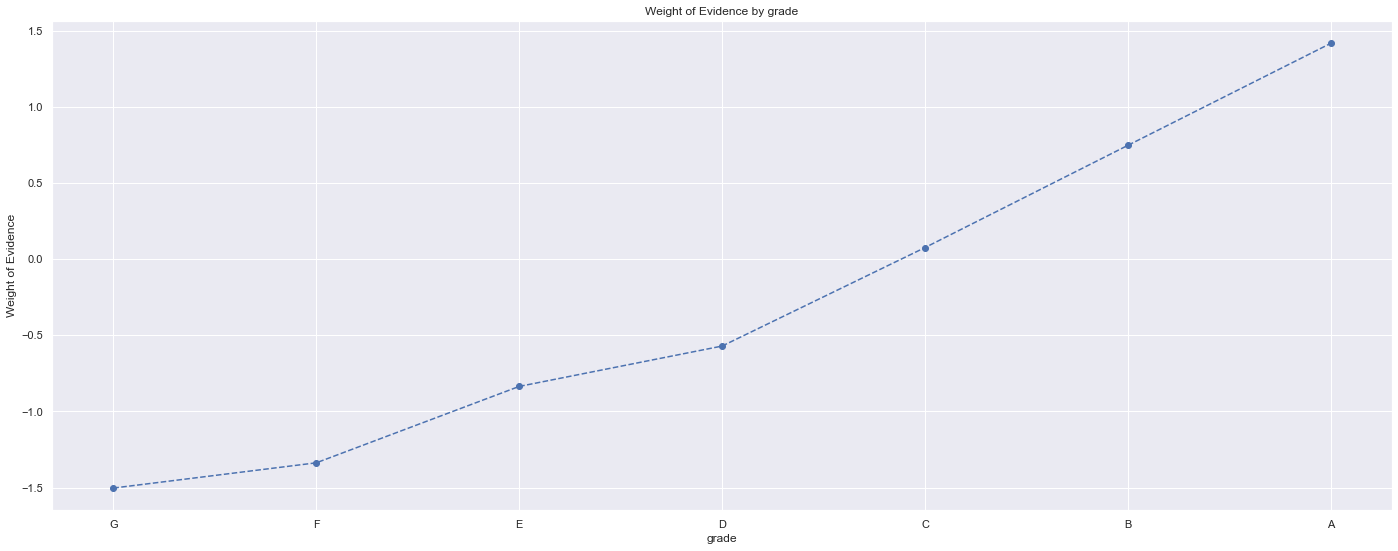

In [44]:
# we can visualize the weight of evidence by grade
# to do that, I created a function the places the WoE in the x-axis and the grade in the y-axis
def plot_woe(df, a, b, rotation_x_axis = 0):
  plt.figure(figsize = (24,9))
  x = np.array(df[a].apply(str))
  y = df[b]
  plt.plot(x, y, marker = 'o', linestyle = '--')
  plt.xlabel(str(a))
  plt.ylabel('Weight of Evidence')
  plt.xticks(rotation = rotation_x_axis)
  plt.title('Weight of Evidence by ' + a)

# apply the function
plot_woe(temp, 'grade', 'WoE')

In [45]:
# "grade G" has the lowest WoE, so it will be considered as the reference category
# now let's use these two functions to calculate and visualize the weight of evidence for all discrete variables we've decided to use for the probability of default model
# let's start with the "home_ownership" variable
temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
temp

home_ownership   n_obs  prop_good  obs_prop    n_good   n_bad  prop_n_good  \
3           RENT  167644   0.987372  0.398115  165527.0  2117.0     0.397142   
2            OWN   45766   0.989905  0.108684   45304.0   462.0     0.108696   
1       MORTGAGE  207682   0.991718  0.493196  205962.0  1720.0     0.494157   
0            ANY       2   1.000000  0.000005       2.0     0.0     0.000005   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
3    0.492440 -0.215078             NaN       NaN         inf  
2    0.107467  0.011374        0.002533  0.226451         inf  
1    0.400093  0.211155        0.001813  0.199782         inf  
0    0.000000       inf        0.008282       inf         inf

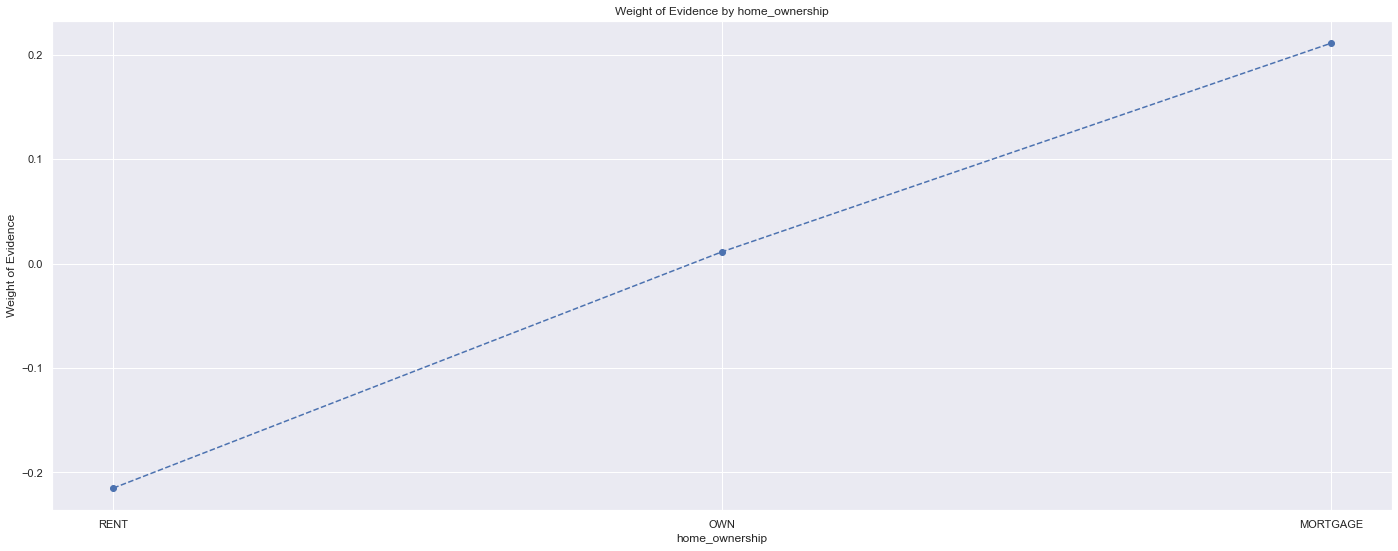

In [46]:
# visualize the weight of evidence by home_ownership
plot_woe(temp, 'home_ownership', 'WoE')

In [47]:
# we can see clearly that the categories "OTHER" and "NONE" are associated with the highest probability of default
# also, the proportion of the number of observations in the table show that there are very few loans associated with these categories
# the category "ANY" has no weight of evidence calculated because the number of obsevations is 3
# it doens't make sense to have dummies for these categories but we won't remove them either because this will mean losing the information about these customers
# in this case, I combined these underrepresented categories 
# the categories "OTHER", "NONE" and "ANY" are combined with the riskiest category "RENT" that has enough number of observations
# borrowers with the category "OWN" have higher weight of evidence than the ones with category "RENT" 
# so these two categories will be in two different dummy variables
# finally, the "MORTGAGE" category encompasses about half of all borrowers, hence it will be in separate dummy variable
# therefore, the categories "OTHER", "NONE", "ANY" and "RENT" will have their own dummy variable,
# the category "OWN" and "MORTGAGE" will have their own separate dummy variables 
# lets' create the dummy variable for "OTHER", "NONE", "ANY" and "RENT" 
# this dummy variable will have value 1 if the borrower has any of the 4 categories and 0 otherwise
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                            df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'],
                                                            df_inputs_prepr['home_ownership:ANY']])

KeyError: 'home_ownership:OTHER'

In [48]:
# the code above generated an error message
# this is because the "home_ownership:ANY" variable is missing
# let's print the unique values for the "home_ownership" variable
df_inputs_prepr['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [49]:
# from the result above we can notice that actually two values are missing: "OTHER" & "NONE"
# this may be an indicator of population change
# we can assume that the bank has much better practices in place and home ownership status is always recorded 
# since we won't be modeling, we only want to assess the population change, we can simply ignore this and delete these values
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                            df_inputs_prepr['home_ownership:ANY']])

In [50]:
# print the unique values of the "addr_state" variable
df_inputs_prepr['addr_state'].unique()

array(['DC', 'IN', 'KS', 'IL', 'OR', 'VA', 'PA', 'GA', 'TN', 'OH', 'NY',
       'FL', 'NJ', 'RI', 'NC', 'AL', 'TX', 'SC', 'MD', 'WA', 'MO', 'MN',
       'NH', 'VT', 'AZ', 'MI', 'MA', 'CA', 'LA', 'DE', 'NM', 'CO', 'WI',
       'SD', 'CT', 'NE', 'HI', 'AR', 'MT', 'WV', 'WY', 'OK', 'NV', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK'], dtype=object)

In [51]:
# calculate and visualize the weight of evidence for the "addr_state" variable
temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
temp

addr_state  n_obs  prop_good  obs_prop   n_good  n_bad  prop_n_good  \
42         UT   2836   0.984838  0.006735   2793.0   43.0     0.006701   
11         HI   2083   0.985118  0.004947   2052.0   31.0     0.004923   
31         NV   5924   0.985989  0.014068   5841.0   83.0     0.014014   
1          AL   5347   0.986347  0.012698   5274.0   73.0     0.012654   
34         OK   3968   0.986643  0.009423   3915.0   53.0     0.009393   
48         WY    900   0.986667  0.002137    888.0   12.0     0.002131   
43         VA  12033   0.986953  0.028576  11876.0  157.0     0.028494   
21         MN   7799   0.988204  0.018521   7707.0   92.0     0.018491   
14         KS   3736   0.988490  0.008872   3693.0   43.0     0.008860   
30         NM   2351   0.988516  0.005583   2324.0   27.0     0.005576   
32         NY  33844   0.988595  0.080372  33458.0  386.0     0.080274   
25         NC  12038   0.988786  0.028587  11903.0  135.0     0.028558   
4          CA  58067   0.988858  0.137896  57420.0  647.0     0.137766   
3          AZ   9700   0.988866  0.023035   9592.0  108.0     0.023014   
20         MI  11436   0.988982  0.027158  11310.0  126.0     0.027136   
16         LA   5098   0.989211  0.012107   5043.0   55.0     0.012099   
9          FL  29298   0.989351  0.069576  28986.0  312.0     0.069545   
13         IN   7264   0.989400  0.017250   7187.0   77.0     0.017243   
46         WI   5663   0.989405  0.013448   5603.0   60.0     0.013443   
0          AK    954   0.989518  0.002266    944.0   10.0     0.002265   
38         SC   5056   0.989715  0.012007   5004.0   52.0     0.012006   
22         MO   6699   0.989849  0.015909   6631.0   68.0     0.015909   
5          CO   9068   0.990075  0.021534   8978.0   90.0     0.021541   
33         OH  14394   0.990135  0.034182  14252.0  142.0     0.034194   
29         NJ  15195   0.990326  0.036085  15048.0  147.0     0.036104   
45         WA   8917   0.990356  0.021176   8831.0   86.0     0.021188   
39         SD    835   0.990419  0.001983    827.0    8.0     0.001984   
18         MD  10057   0.990753  0.023883   9964.0   93.0     0.023906   
41         TX  34699   0.990778  0.082402  34379.0  320.0     0.082484   
10         GA  14110   0.990858  0.033508  13981.0  129.0     0.033544   
17         MA   9521   0.991072  0.022610   9436.0   85.0     0.022639   
15         KY   4112   0.991245  0.009765   4076.0   36.0     0.009779   
35         OR   4944   0.991303  0.011741   4901.0   43.0     0.011759   
36         PA  14969   0.991315  0.035548  14839.0  130.0     0.035603   
6          CT   6327   0.991781  0.015025   6275.0   52.0     0.015055   
23         MS   2593   0.991901  0.006158   2572.0   21.0     0.006171   
8          DE   1239   0.991929  0.002942   1229.0   10.0     0.002949   
2          AR   3152   0.992069  0.007485   3127.0   25.0     0.007502   
40         TN   6903   0.992322  0.016393   6850.0   53.0     0.016435   
12         IL  16864   0.992884  0.040048  16744.0  120.0     0.040173   
47         WV   1974   0.992908  0.004688   1960.0   14.0     0.004703   
37         RI   1843   0.992946  0.004377   1830.0   13.0     0.004391   
44         VT    892   0.993274  0.002118    886.0    6.0     0.002126   
24         MT   1162   0.993976  0.002759   1155.0    7.0     0.002771   
7          DC   1006   0.994036  0.002389   1000.0    6.0     0.002399   
28         NH   2062   0.995635  0.004897   2053.0    9.0     0.004926   
26         ND    479   0.995825  0.001138    477.0    2.0     0.001144   
27         NE   1162   0.998279  0.002759   1160.0    2.0     0.002783   
19         ME    521   1.000000  0.001237    521.0    0.0     0.001250   

    prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
42    0.010002 -0.400541             NaN       NaN         inf  
11    0.007211 -0.381629        0.000280  0.018912         inf  
31    0.019307 -0.320395        0.000872  0.061234         inf  
1     0.016981 -0.294127        0.000358  

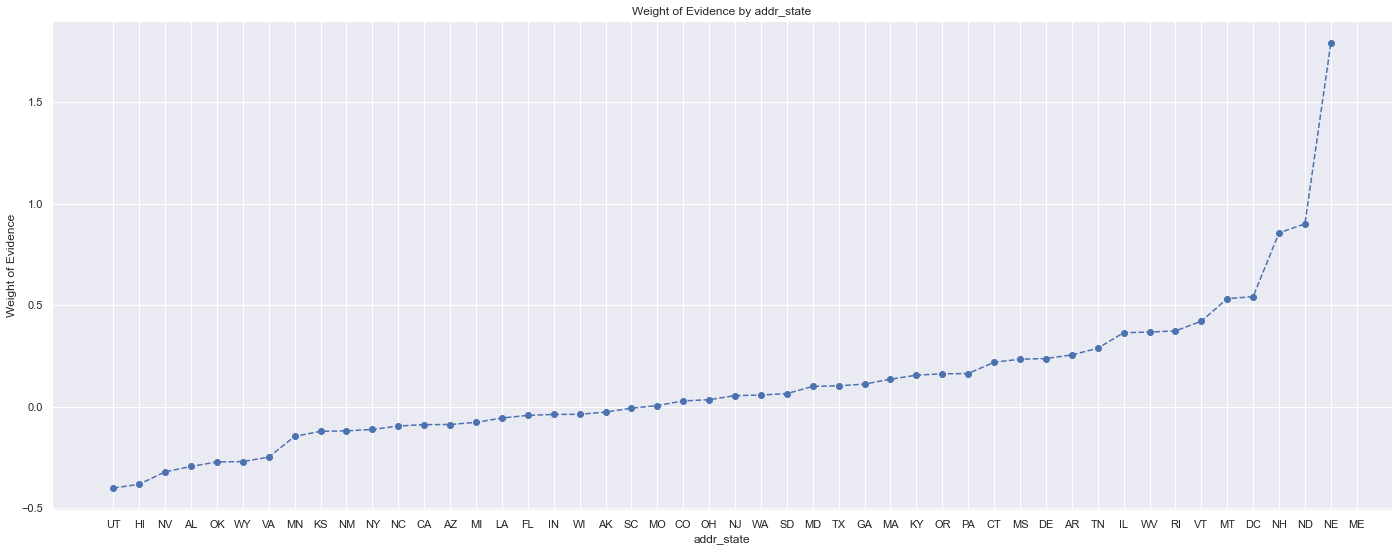

In [52]:
# visualize the weight of evidence by adress state
plot_woe(temp, 'addr_state', 'WoE')

In [53]:
# the graph shows the weight of evidence of only 50 states out of 51
# this is because there are no borrowers for one of the states, which is ND
# let's make sure there is a dummy for ND (North Dakota) state and set it to 0 when there is a missing value
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
  pass
else:
  df_inputs_prepr['addr_state:ND'] = 0

In [54]:
# from the table above we can notice that we have only 49 states
# in our original preprocessing we had 51 categories
# after analyzing the dataI realized that the missing states are Idaho (ID) and Iowa (IA)
# when we were preprocessing the train data, we dealt with one missing state which is North Dakota (ND)
# we will deal with our missing categories here the same way
if ['addr_state:ID'] in df_inputs_prepr.columns.values:
  pass
else:
  df_inputs_prepr['addr_state:ID'] = 0

if ['addr_state:IA'] in df_inputs_prepr.columns.values:
  pass
else:
  df_inputs_prepr['addr_state:IA'] = 0

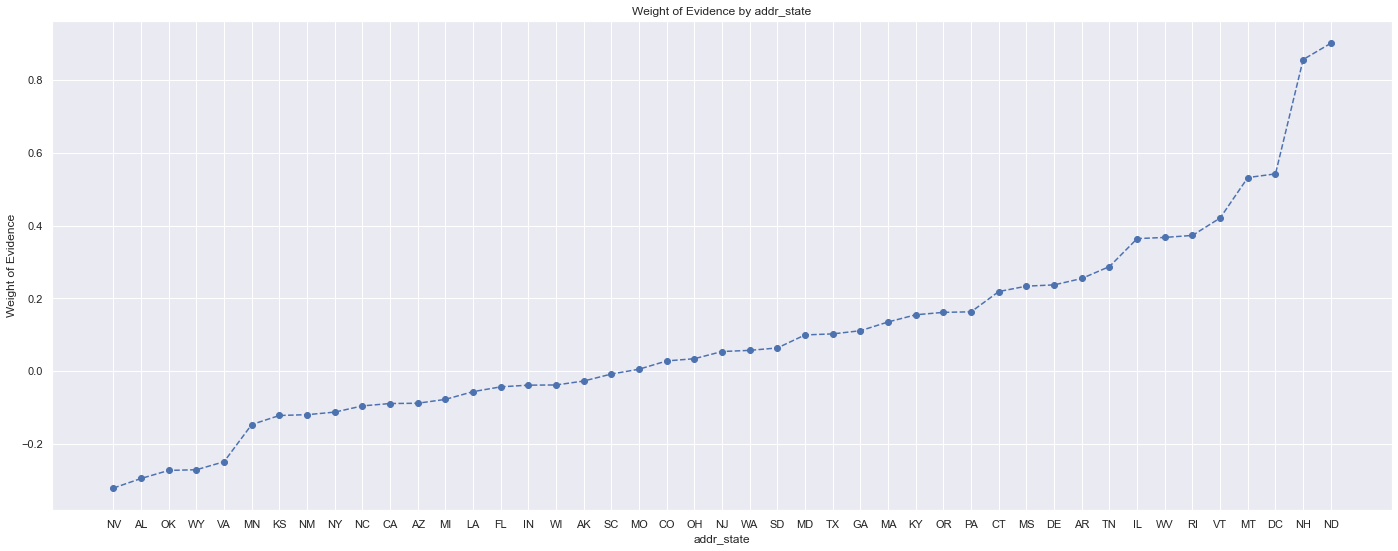

In [55]:
# the graph shows the weight of evidence of only 50 states out of 51
# this is because there are no borrowers for one of the states, which is ND
# we notice that there are two states "IA" and "ID" with considerably lower WoE comparing to most states
# on the other hand, there are two states "ME" and "ID" with higher WoE 
# note that the WoE for the "ME" and "ID" states could not be calculated because there are no bad borrowers  
# the other categories seem to habe approximately similar WoE values 
# looking back at the table, we can clearly see that the first and the last two states have the lowest number of observations
# I think it is very likely that the low number of observations is the reason of the extreme WoE values
# so I decided to include the first two states to the worst and the last two states to the best category respectively
# now let's focus on the other 46 categories
plot_woe(temp.iloc[2:-2, :], 'addr_state', 'WoE') # plots all the states excluding the first and the last two rows 

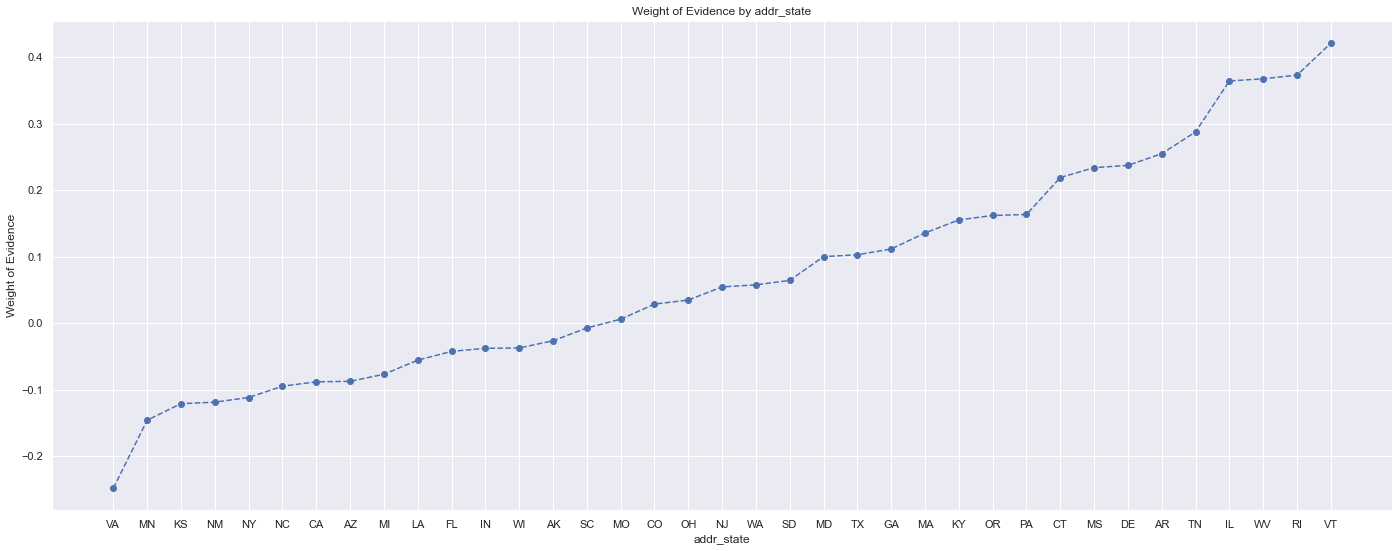

In [56]:
# this new graph gives us a different perspective
# it shows that actually after excluding the first two and the last two rows there are some differences between the WoE of the 46 states
# we can see that "NV" state has the lowest value comparing to the other states in the graph
# we can include it in the same category as "IA" and "ID" states
# also we place the state we have no information about in the worst (highest risk) category, when we have no information we assume the worst or highest risk
# on the other hand, we include the last four states in the graph "WV" to "MS" in the same category as "ND", "NE" and "ME"
# now let's focus on the remaining 41 states
plot_woe(temp.iloc[6:-6, :], 'addr_state', 'WoE')

In [57]:
# the graph above is usually what we expect from a typical WoE plot
# with the help of this graph I created dummy variable by grouping each number of states with approximately the same WoE values
# below is the code 
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                          df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                          df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                                 df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                                    df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                                    df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                                    df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                                    df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [58]:
# print the unique values of the "verification_status" variable
df_inputs_prepr['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [59]:
# calculate the weight of evidence by "verification_status"
temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
temp

verification_status   n_obs  prop_good  obs_prop    n_good   n_bad  \
2            Verified  123016   0.987554  0.292134  121485.0  1531.0   
1     Source Verified  179565   0.989519  0.426425  177683.0  1882.0   
0        Not Verified  118513   0.992524  0.281441  117627.0   886.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
2     0.291474    0.356129 -0.200342             NaN       NaN    0.037187  
1     0.426308    0.437776 -0.026546        0.001965  0.173796    0.037187  
0     0.282218    0.206094  0.314345        0.003005  0.340891    0.037187

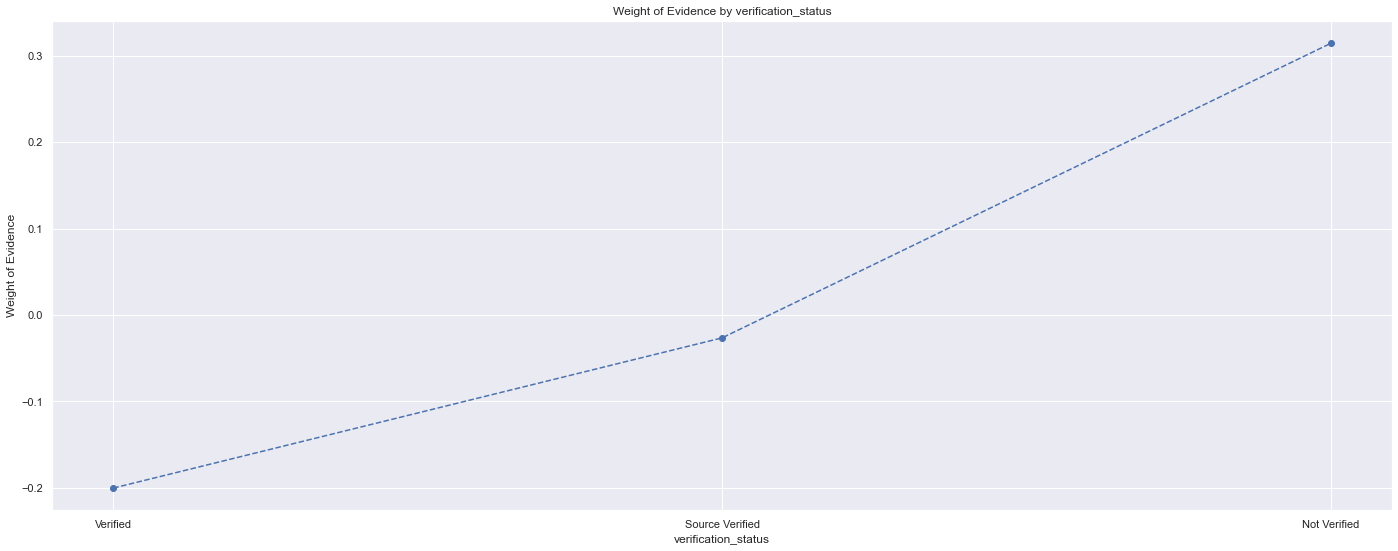

In [60]:
# visulaize the weight of evidence by "verification_status"
plot_woe(temp, 'verification_status', 'WoE')

In [61]:
# for the "verification_status" variable we have only three categories
# the category "Verified" has the lowest weight of evidence, the categories "Not Verified" and "Source Verified" are close in terms of WoE
# all three categories have approximately the same proportion of good and bad borrowers, so I decided to keep the same dummies for all three categories

In [62]:
# print the unique values of the "verification_status" variable
df_inputs_prepr['purpose'].unique()

array(['home_improvement', 'credit_card', 'debt_consolidation',
       'major_purchase', 'other', 'medical', 'small_business', 'house',
       'car', 'vacation', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [63]:
# calculate the weight of evidence by "purpose"
temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


purpose   n_obs  prop_good  obs_prop    n_good   n_bad  \
5                house    1438   0.978442  0.003415    1407.0    31.0   
8               moving    2420   0.978512  0.005747    2368.0    52.0   
11      small_business    3364   0.978597  0.007989    3292.0    72.0   
7              medical    3938   0.984256  0.009352    3876.0    62.0   
10    renewable_energy     224   0.986607  0.000532     221.0     3.0   
12            vacation    2249   0.986661  0.005341    2219.0    30.0   
6       major_purchase    7449   0.986710  0.017690    7350.0    99.0   
9                other   19204   0.986930  0.045605   18953.0   251.0   
2   debt_consolidation  250020   0.988989  0.593739  247267.0  2753.0   
0                  car    3466   0.989613  0.008231    3430.0    36.0   
4     home_improvement   25292   0.990906  0.060063   25062.0   230.0   
1          credit_card  102025   0.993335  0.242286  101345.0   680.0   
3          educational       1   1.000000  0.000002       1.0     0.0   
13             wedding       4   1.000000  0.000009       4.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
5      0.003376    0.007211 -0.758984             NaN       NaN         inf  
8      0.005681    0.012096 -0.755655        0.000070  0.003329         inf  
11     0.007898    0.016748 -0.751628        0.000085  0.004027         inf  
7      0.009300    0.014422 -0.438787        0.005659  0.312840         inf  
10     0.000530    0.000698 -0.274662        0.002351  0.164126         inf  
12     0.005324    0.006978 -0.270598        0.000054  0.004064         inf  
6      0.017635    0.023029 -0.266876        0.000049  0.003721         inf  
9      0.045473    0.058386 -0.249947        0.000220  0.016929         inf  
2      0.593258    0.640381 -0.076435        0.002059  0.173513         inf  
0      0.008229    0.008374 -0.017415        0.000625  0.059019         inf  
4      0.060130    0.053501  0.116817        0.001293  0.134232         inf  
1      0.243153    0.158176  0.429981        0.002429  0.313164         inf  
3      0.000002    0.000000       inf        0.006665       inf         inf  
13     0.000010    0.000000       inf        0.000000       NaN         inf

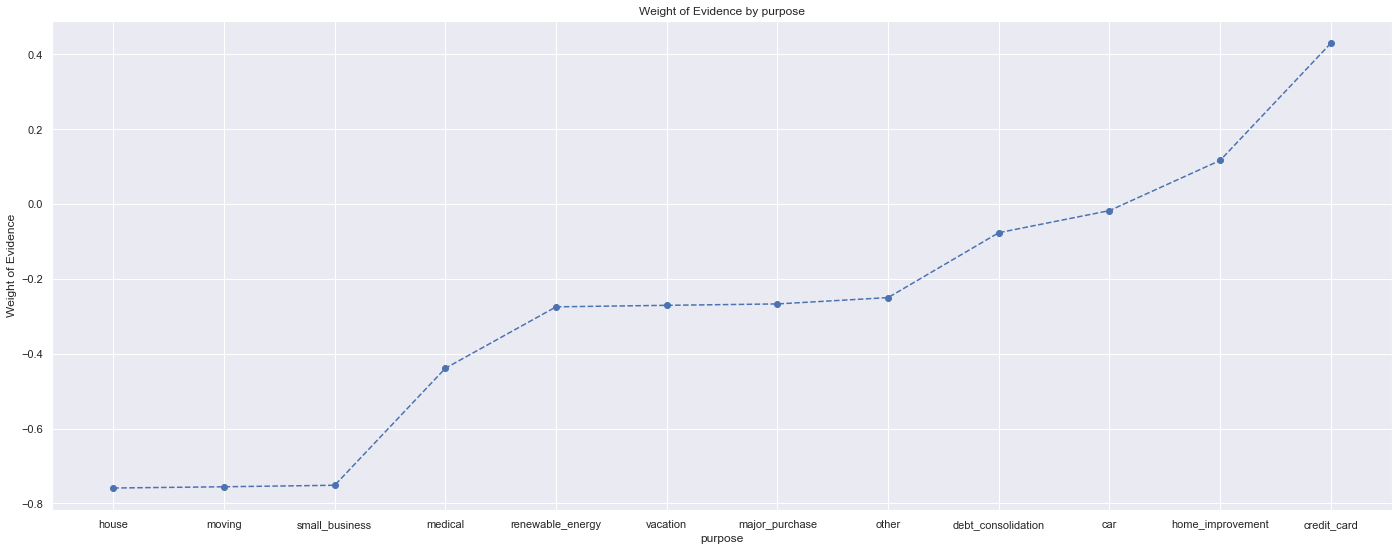

In [64]:
# visulaize the weight of evidence by "purpose"
plot_woe(temp, 'purpose', 'WoE')

In [65]:
# the code below illustrates how I assigned the dummy variables
df_inputs_prepr['purpose:educ_smb_wedd_renen_mov_house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth_med_vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                                   df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:majorpurch_car_homeimpr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                          df_inputs_prepr['purpose:home_improvement']])

In [66]:
# print the unique values of the "initial_list_status" variable
df_inputs_prepr['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [67]:
# calculate the weight of evidence by "initial_list_status"
temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
temp

initial_list_status   n_obs  prop_good  obs_prop    n_good   n_bad  \
0                   f  153843   0.984848  0.365341  151512.0  2331.0   
1                   w  267251   0.992636  0.634659  265283.0  1968.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0     0.363517    0.542219 -0.399845             NaN       NaN    0.130348  
1     0.636483    0.457781  0.329567        0.007788  0.729412    0.130348

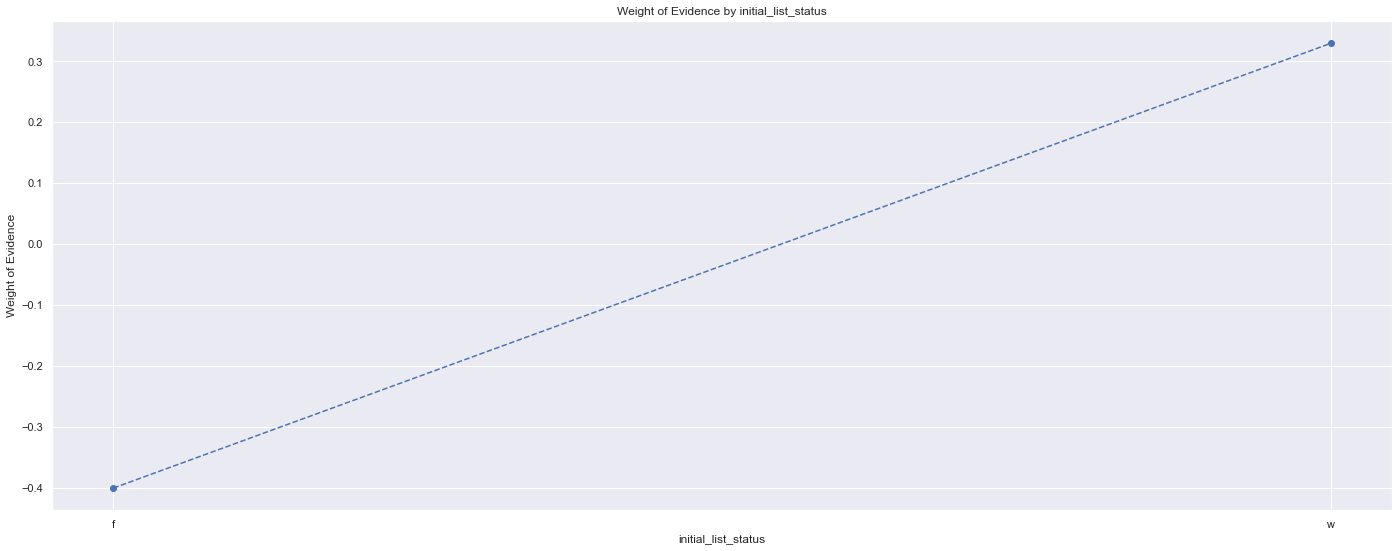

In [68]:
# visulaize the weight of evidence by "initial_list_status"
plot_woe(temp, 'initial_list_status', 'WoE')

In [69]:
# the "initial_list_status" variable has two categories "f" and "w"
# the "f" category has the lowest weight of evidence while the "w" category has the highest weight of evidence
# it makes more sens that each variable has its own dummy
# so we leave these dummy variables as they are
# the variable "initial_list_status:f" will be the reference category

##### Preprocessing continuous variables

In [70]:
# in this step, we need to split the continuous variables into categorical ones
# continuous variables show quantitative differences
# theses variables will be ordered by their values and not by their weight of evidence 
# thus we only need to use the previous function that calculates the weight of evidence
# the function below takes a variable containing the categories of a continuous variable obtained via fine classing
# the difference with the previous function appears right after it calculates the weight of evidence
# here we don't want the values to be ordered by their weight of evidence
# rather, we want to preserve their natural order which is compliant with the ascending order of the values of the continuous independant variable
# hence, I commented out the df.sort_values() and df.reset_index() methods
def woe_continuous(df, discrete_variable_name, target):
  df = pd.concat([df[discrete_variable_name], target], axis = 1)
  df_count = df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count()
  df_prop = df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()
  df = pd.concat([df_count, df_prop], axis = 1)
  df = df.iloc[:, [0,1,3]]
  df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
  df['obs_prop'] = df['n_obs'] / df['n_obs'].sum()
  df['n_good'] = df['prop_good'] * df['n_obs']
  df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
  df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
  df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
  df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
  #df.sort_values(by = 'WoE', inplace = True)
  #df.reset_index(drop = True)
  df['diff_prop_good'] = df['prop_good'].diff().abs()
  df['diff_WoE'] = df['WoE'].diff().abs()
  df['Info_Value'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
  df['Info_Value'] = df['Info_Value'].sum()
  return df

# let's now create our dummy variables

In [71]:
# print the unique values of the "term_int" variable
df_inputs_prepr["term_int"].unique()

array([60, 36], dtype=int64)

In [72]:
# this variable contains only two categories "60" and "36"
# calculate the weight of evidence for this variable
temp = woe_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
temp

term_int   n_obs  prop_good  obs_prop    n_good   n_bad  prop_n_good  \
0        36  283172   0.990935  0.672467  280605.0  2567.0     0.673245   
1        60  137922   0.987442  0.327533  136190.0  1732.0     0.326755   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0    0.597116  0.119998             NaN       NaN     0.02508  
1    0.402884 -0.209438        0.003493  0.329436     0.02508

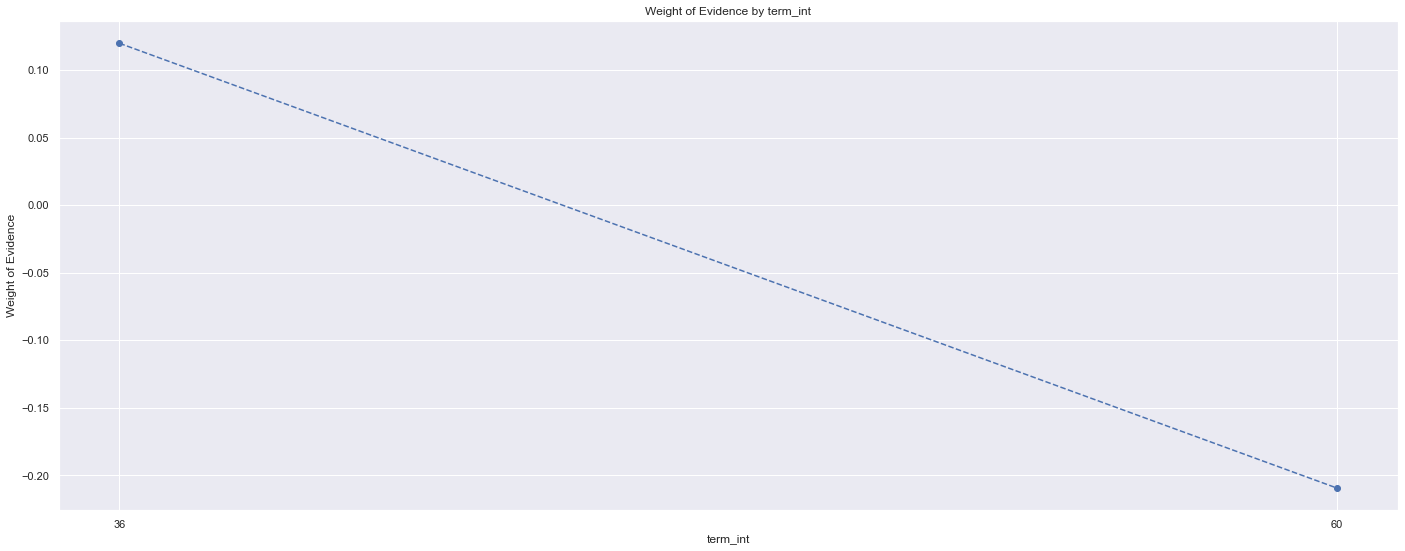

In [73]:
# visualize the weight of evidence by "term_int"
plot_woe(temp, 'term_int', 'WoE')

In [74]:
# the plot shows that the "60" months loans is much riskier than the "36" months loans
# the only thing we can do here to keep both categories, and take the "60" category as a reference category
# create a dummy variable for each category with the np.where() method
df_inputs_prepr['term:36'] = np.where(df_inputs_prepr['term_int'] == 36, 1, 0)
df_inputs_prepr['term:60'] = np.where(df_inputs_prepr['term_int'] == 60, 1, 0)

In [75]:
# print the unique values for the employment length variable
df_inputs_prepr['emp_length_int'].unique()

array([10.,  0.,  5.,  3.,  4.,  2.,  8.,  9.,  1.,  6.,  7.])

In [76]:
# calculate the weight of evidence for this variable
temp = woe_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
temp

emp_length_int   n_obs  prop_good  obs_prop    n_good   n_bad  \
0              0.0   58157   0.987688  0.138109   57441.0   716.0   
1              1.0   27473   0.987515  0.065242   27130.0   343.0   
2              2.0   37497   0.990266  0.089047   37132.0   365.0   
3              3.0   33430   0.990278  0.079388   33105.0   325.0   
4              4.0   24506   0.988452  0.058196   24223.0   283.0   
5              5.0   24930   0.988809  0.059203   24651.0   279.0   
6              6.0   16838   0.988894  0.039986   16651.0   187.0   
7              7.0   18414   0.988650  0.043729   18205.0   209.0   
8              8.0   21560   0.990816  0.051200   21362.0   198.0   
9              9.0   16769   0.988789  0.039822   16581.0   188.0   
10            10.0  141520   0.991478  0.336077  140314.0  1206.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0      0.137816    0.166550 -0.189379             NaN       NaN    0.022312  
1      0.065092    0.079786 -0.203547        0.000173  0.014168    0.022312  
2      0.089089    0.084903  0.048125        0.002751  0.251672    0.022312  
3      0.079428    0.075599  0.049402        0.000012  0.001277    0.022312  
4      0.058117    0.065829 -0.124601        0.001826  0.174003    0.022312  
5      0.059144    0.064899 -0.092851        0.000357  0.031750    0.022312  
6      0.039950    0.043498 -0.085095        0.000086  0.007756    0.022312  
7      0.043679    0.048616 -0.107095        0.000244  0.022000    0.022312  
8      0.051253    0.046057  0.106890        0.002166  0.213985    0.022312  
9      0.039782    0.043731 -0.094641        0.002027  0.201531    0.022312  
10     0.336650    0.280530  0.182362        0.002689  0.277003    0.022312

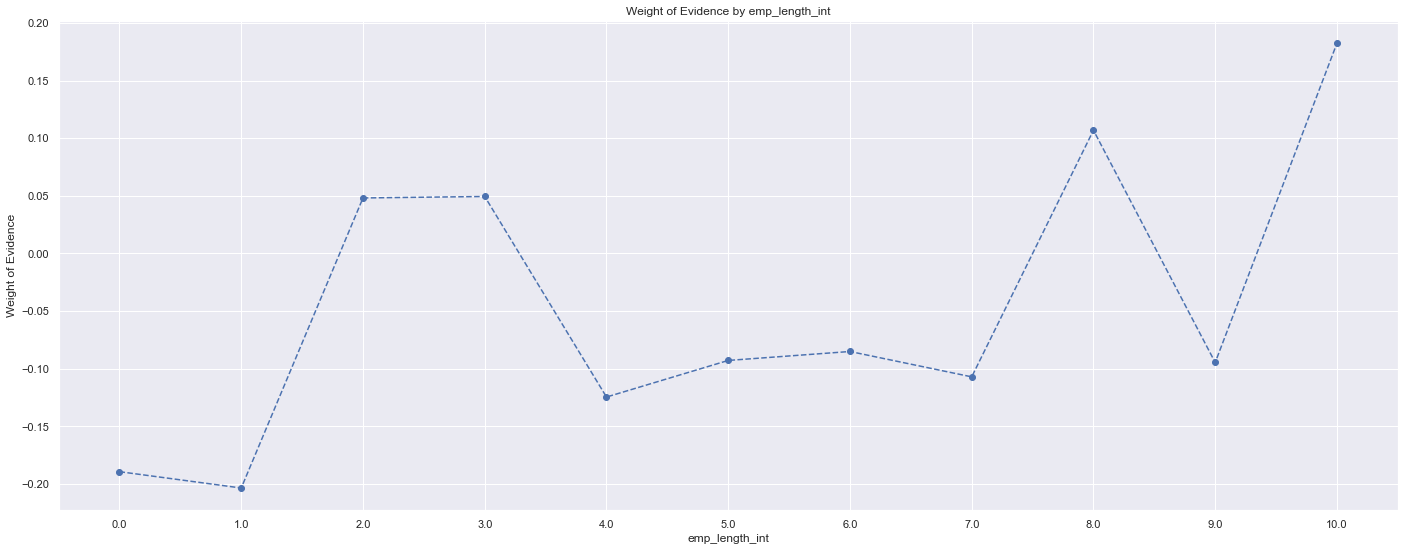

In [77]:
# visualize the weight of evidence by "emp_length_int"
plot_woe(temp, 'emp_length_int', 'WoE')

In [78]:
# bed on how the weight of evidence changes with the number employment length categories we can easily determine the number of categories for the PD model
# the first category will be the "0" employment length
# the second category will be the "1" employment length
# the third category will be from "2" to "4" employment length categories as the WoE hardly changes between the two
# the "5" and "6" categories have approximately the same WoE, so I chose to group them into the same dummy
# categories "7", "8" and "9" will have their own dummies as they differ in terms of WoE
# the riskiest group is the "0" category so I'll use it as a reference category
# now that we have a plan, we can proceed to create the dummies themselves
df_inputs_prepr['emp_length_int:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length_int:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length_int:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)), 1, 0)
df_inputs_prepr['emp_length_int:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)), 1, 0)
df_inputs_prepr['emp_length_int:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)), 1, 0)
df_inputs_prepr['emp_length_int:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [79]:
# print the unique values for the "mths_since_issue_d"
df_inputs_prepr['mth_issue_date'].unique()

array([24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.])

In [80]:
# with this variable we'll following the steps described below:
# first, we will do fine classing to roughly group the values into categories
# second, we will do coarse classing to determine final categories combining few of the initial fine classing categories into bigger categories if needed 
# we will the pd.cut() method to divide the variable into 50 categories
df_inputs_prepr['mth_issue_date_factor'] = pd.cut(df_inputs_prepr['mth_issue_date'], 50)
df_inputs_prepr['mth_issue_date_factor'].head()

0    (23.989, 24.22]
1    (23.989, 24.22]
2    (23.989, 24.22]
3    (23.989, 24.22]
4    (23.989, 24.22]
Name: mth_issue_date_factor, dtype: category
Categories (50, interval[float64]): [(23.989, 24.22] < (24.22, 24.44] < (24.44, 24.66] < (24.66, 24.88] ... (34.12, 34.34] < (34.34, 34.56] < (34.56, 34.78] < (34.78, 35.0]]

In [81]:
# now we can treat our new categorical variable as any other categorical variable
# calculate the weight of evidence for this variable
temp = woe_continuous(df_inputs_prepr, 'mth_issue_date_factor', df_targets_prepr)
temp

mth_issue_date_factor  n_obs  prop_good  obs_prop   n_good   n_bad  \
0        (23.989, 24.22]  44342   0.999436  0.105302  44317.0    25.0   
1         (24.22, 24.44]      0        NaN  0.000000      NaN     NaN   
2         (24.44, 24.66]      0        NaN  0.000000      NaN     NaN   
3         (24.66, 24.88]      0        NaN  0.000000      NaN     NaN   
4          (24.88, 25.1]  37530   0.998375  0.089125  37469.0    61.0   
5          (25.1, 25.32]      0        NaN  0.000000      NaN     NaN   
6         (25.32, 25.54]      0        NaN  0.000000      NaN     NaN   
7         (25.54, 25.76]      0        NaN  0.000000      NaN     NaN   
8         (25.76, 25.98]      0        NaN  0.000000      NaN     NaN   
9          (25.98, 26.2]  48631   0.998190  0.115487  48543.0    88.0   
10         (26.2, 26.42]      0        NaN  0.000000      NaN     NaN   
11        (26.42, 26.64]      0        NaN  0.000000      NaN     NaN   
12        (26.64, 26.86]      0        NaN  0.000000      NaN     NaN   
13        (26.86, 27.08]  28641   0.997591  0.068016  28572.0    69.0   
14         (27.08, 27.3]      0        NaN  0.000000      NaN     NaN   
15         (27.3, 27.52]      0        NaN  0.000000      NaN     NaN   
16        (27.52, 27.74]      0        NaN  0.000000      NaN     NaN   
17        (27.74, 27.96]      0        NaN  0.000000      NaN     NaN   
18        (27.96, 28.18]  35886   0.996935  0.085221  35776.0   110.0   
19         (28.18, 28.4]      0        NaN  0.000000      NaN     NaN   
20         (28.4, 28.62]      0        NaN  0.000000      NaN     NaN   
21        (28.62, 28.84]      0        NaN  0.000000      NaN     NaN   
22        (28.84, 29.06]  45962   0.993973  0.109149  45685.0   277.0   
23        (29.06, 29.28]      0        NaN  0.000000      NaN     NaN   
24         (29.28, 29.5]      0        NaN  0.000000      NaN     NaN   
25         (29.5, 29.72]      0        NaN  0.000000      NaN     NaN   
26        (29.72, 29.94]      0        NaN  0.000000      NaN     NaN   
27        (29.94, 30.16]  28485   0.990907  0.067645  28226.0   259.0   
28        (30.16, 30.38]      0        NaN  0.000000      NaN     NaN   
29         (30.38, 30.6]      0        NaN  0.000000      NaN     NaN   
30         (30.6, 30.82]      0        NaN  0.000000      NaN     NaN   
31        (30.82, 31.04]  31913   0.986777  0.075786  31491.0   422.0   
32        (31.04, 31.26]      0        NaN  0.000000      NaN     NaN   
33        (31.26, 31.48]      0        NaN  0.000000      NaN     NaN   
34         (31.48, 31.7]      0        NaN  0.000000      NaN     NaN   
35         (31.7, 31.92]      0        NaN  0.000000      NaN     NaN   
36        (31.92, 32.14]  35427   0.982104  0.084131  34793.0   634.0   
37        (32.14, 32.36]      0        NaN  0.000000      NaN     NaN   
38        (32.36, 32.58]      0        NaN  0.000000      NaN     NaN   
39         (32.58, 32.8]      0        NaN  0.000000      NaN     NaN   
40         (32.8, 33.02]  25400   0.977677  0.060319  24833.0   567.0   
41        (33.02, 33.24]      0        NaN  0.000000      NaN     NaN   
42        (33.24, 33.46]      0        NaN  0.000000      NaN     NaN   
43        (33.46, 33.68]      0        NaN  0.000000      NaN     NaN   
44         (33.68, 33.9]      0        NaN  0.000000      NaN     NaN   
45         (33.9, 34.12]  23770   0.973244  0.056448  23134.0   636.0   
46        (34.12, 34.34]      0        NaN  0.000000      NaN     NaN   
47        (34.34, 34.56]      0        NaN  0.000000      NaN     NaN   
48        (34.56, 34.78]      0        NaN  0.000000      NaN     NaN   
49         (34.78, 35.0]  35107   0.967215  0.083371  33956.0  1151.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0      0.106328    0.005815  2.906036             NaN       NaN    1.184832  
1           NaN         NaN       NaN             NaN       NaN    1.184832  
2           NaN         NaN       NaN        

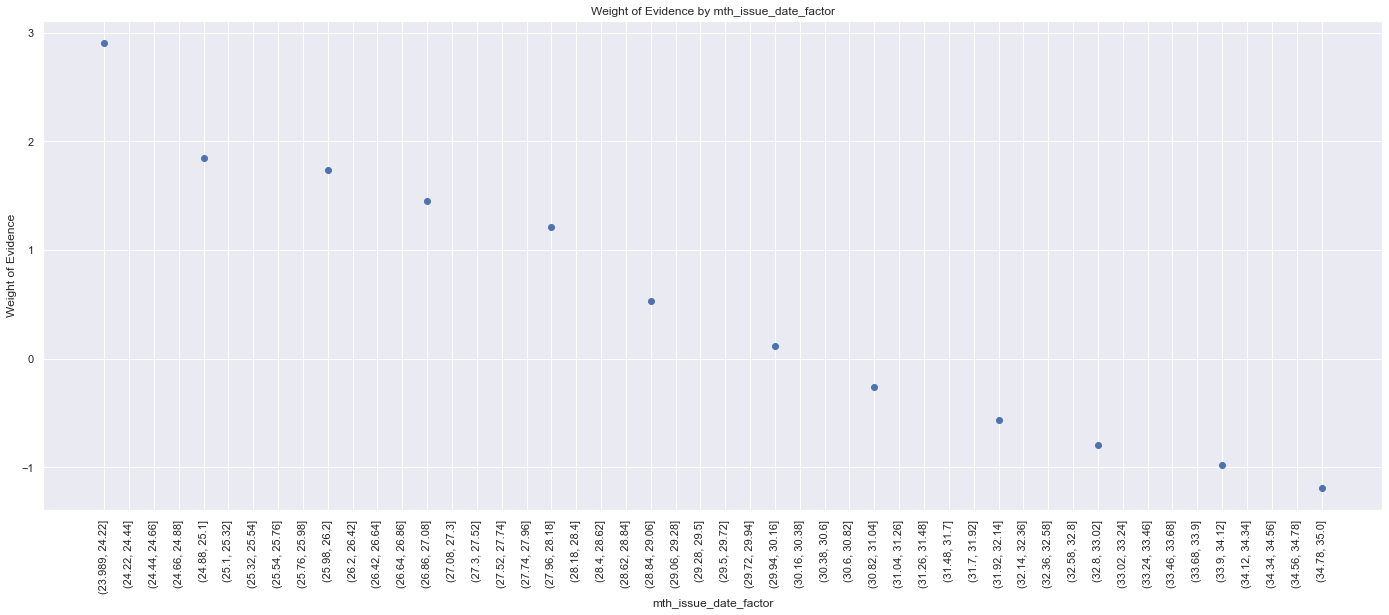

In [82]:
# visualize the weight of evidence by "emp_length_int"
plot_woe(temp, 'mth_issue_date_factor', 'WoE', 90)

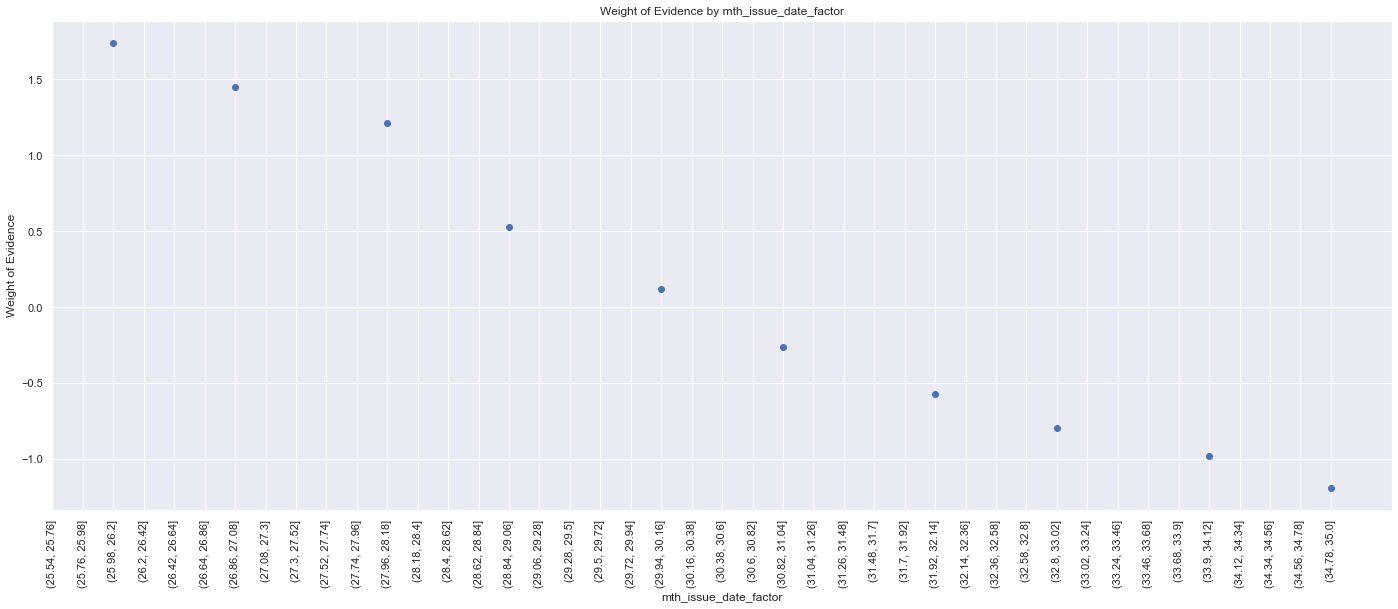

In [83]:
# as we can see, the first 7 points have very high WoE, so each of them will have their own dummies
# let's plot again the weights of evidence of the categories without the first 4 ones to see the differences mre easily
plot_woe(temp.iloc[7:, :], 'mth_issue_date_factor', 'WoE', 90)

In [84]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mth_issue_date:<38'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(38)), 1, 0)
df_inputs_prepr['mth_issue_date:38-39'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mth_issue_date:40-41'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mth_issue_date:42-48'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mth_issue_date:49-52'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mth_issue_date:53-64'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mth_issue_date:65-84'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mth_issue_date:>84'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(85, int(df_inputs_prepr['mth_issue_date'].max()))), 1, 0)

In [85]:
# the next variable is going to be the interest rate variable "int_rate"
# print the unique values of this variable
df_inputs_prepr['int_rate'].unique()

array([11.99,  5.32, 14.85, 10.78,  9.8 ,  7.49, 13.99, 13.44, 22.45,
       17.27,  8.49, 19.89, 11.48,  6.49,  7.91, 15.77, 12.88,  9.17,
       23.13, 19.48, 16.59, 18.49, 20.5 , 17.97, 24.24,  6.99, 18.99,
       26.06, 21.48, 27.49, 26.99, 27.99, 28.49, 25.09, 28.99, 16.55,
       12.59, 13.67,  7.89, 10.64,  7.26, 17.86, 14.48, 13.18, 18.2 ,
        6.24,  8.38, 15.41,  6.89, 22.99,  9.76, 11.22, 20.99, 23.99,
       17.57, 27.88, 25.99, 21.99, 16.99, 19.99, 27.31, 24.99, 26.77,
       14.33,  6.  , 12.05,  8.18, 11.49, 10.99,  9.99, 11.53, 18.55,
       12.69, 13.33, 14.65, 18.25, 19.19, 12.29, 15.61, 25.78, 19.52,
       24.5 ,  6.39,  5.93, 21.67,  6.92,  6.68, 20.49, 25.8 , 18.84,
       25.57, 25.83, 25.89,  6.03,  8.19, 14.99,  8.67, 12.39, 16.49,
        9.49, 13.66, 10.49, 11.44, 15.59, 19.24, 17.14, 14.31, 12.99,
       18.54, 15.99])

In [86]:
# the same steps will be carried out as for the "mth_issue_date" variable
# we will again use the pd.cut() method to divide the variable into 50 categories
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_inputs_prepr['int_rate_factor'].head()

0    (11.948, 12.421]
1      (5.296, 5.793]
2    (14.788, 15.261]
3    (11.948, 12.421]
4    (10.527, 11.001]
Name: int_rate_factor, dtype: category
Categories (50, interval[float64]): [(5.296, 5.793] < (5.793, 6.267] < (6.267, 6.74] < (6.74, 7.214] ... (27.096, 27.57] < (27.57, 28.043] < (28.043, 28.517] < (28.517, 28.99]]

In [87]:
# calculate the weight of evidence for this variable
temp = woe_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
temp

int_rate_factor  n_obs  prop_good  obs_prop   n_good  n_bad  prop_n_good  \
0     (5.296, 5.793]   9651   0.999378  0.022919   9645.0    6.0     0.023141   
1     (5.793, 6.267]  10214   0.998531  0.024256  10199.0   15.0     0.024470   
2      (6.267, 6.74]   6530   0.996325  0.015507   6506.0   24.0     0.015610   
3      (6.74, 7.214]  12488   0.997117  0.029656  12452.0   36.0     0.029876   
4     (7.214, 7.687]  11416   0.998160  0.027110  11395.0   21.0     0.027340   
5      (7.687, 8.16]  20636   0.997286  0.049006  20580.0   56.0     0.049377   
6      (8.16, 8.634]  22498   0.996355  0.053428  22416.0   82.0     0.053782   
7     (8.634, 9.107]   2020   0.988614  0.004797   1997.0   23.0     0.004791   
8     (9.107, 9.581]  22171   0.996527  0.052651  22094.0   77.0     0.053009   
9    (9.581, 10.054]  22364   0.996959  0.053109  22296.0   68.0     0.053494   
10  (10.054, 10.527]   2271   0.985029  0.005393   2237.0   34.0     0.005367   
11  (10.527, 11.001]  22559   0.994991  0.053572  22446.0  113.0     0.053854   
12  (11.001, 11.474]   4780   0.991213  0.011351   4738.0   42.0     0.011368   
13  (11.474, 11.948]  18875   0.995338  0.044824  18787.0   88.0     0.045075   
14  (11.948, 12.421]  28919   0.989592  0.068676  28618.0  301.0     0.068662   
15  (12.421, 12.894]  22799   0.993289  0.054142  22646.0  153.0     0.054334   
16  (12.894, 13.368]  24609   0.990532  0.058441  24376.0  233.0     0.058484   
17  (13.368, 13.841]   7433   0.991255  0.017652   7368.0   65.0     0.017678   
18  (13.841, 14.315]  20243   0.988045  0.048072  20001.0  242.0     0.047988   
19  (14.315, 14.788]  16697   0.991076  0.039651  16548.0  149.0     0.039703   
20  (14.788, 15.261]   2344   0.970563  0.005566   2275.0   69.0     0.005458   
21  (15.261, 15.735]  16718   0.985824  0.039701  16481.0  237.0     0.039542   
22  (15.735, 16.208]   1852   0.958963  0.004398   1776.0   76.0     0.004261   
23  (16.208, 16.682]  12548   0.982149  0.029799  12324.0  224.0     0.029568   
24  (16.682, 17.155]  11482   0.979272  0.027267  11244.0  238.0     0.026977   
25  (17.155, 17.628]  10062   0.985291  0.023895   9914.0  148.0     0.023786   
26  (17.628, 18.102]   9854   0.979704  0.023401   9654.0  200.0     0.023162   
27  (18.102, 18.575]  14616   0.984948  0.034710  14396.0  220.0     0.034540   
28  (18.575, 19.049]   3139   0.972921  0.007454   3054.0   85.0     0.007327   
29  (19.049, 19.522]   6273   0.972900  0.014897   6103.0  170.0     0.014643   
30  (19.522, 19.995]   4564   0.973707  0.010838   4444.0  120.0     0.010662   
31  (19.995, 20.469]      0        NaN  0.000000      NaN    NaN          NaN   
32  (20.469, 20.942]   1449   0.959282  0.003441   1390.0   59.0     0.003335   
33  (20.942, 21.416]   3417   0.982441  0.008115   3357.0   60.0     0.008054   
34  (21.416, 21.889]   1137   0.951627  0.002700   1082.0   55.0     0.002596   
35  (21.889, 22.362]   2659   0.973674  0.006315   2589.0   70.0     0.006212   
36  (22.362, 22.836]     49   1.000000  0.000116     49.0    0.0     0.000118   
37  (22.836, 23.309]   2677   0.961524  0.006357   2574.0  103.0     0.006176   
38  (23.309, 23.783]      0        NaN  0.000000      NaN    NaN          NaN   
39  (23.783, 24.256]   1910   0.966492  0.004536   1846.0   64.0     0.004429   
40  (24.256, 24.729]    582   0.905498  0.001382    527.0   55.0     0.001264   
41  (24.729, 25.203]   1342   0.954545  0.003187   1281.0   61.0     0.003073   
42  (25.203, 25.676]    415   0.879518  0.000986    365.0   50.0     0.000876   
43   (25.676, 26.15]   1547   0.947641  0.003674   1466.0   81.0     0.003517   
44   (26.15, 26.623]      0        NaN  0.000000      NaN    NaN          NaN   
45  (26.623, 27.096]    453   0.975717  0.001076    442.0   11.0     0.001060   
46   (27.096, 27.57]    354   0.983051  0.000841    348.0    6.0     0.000835   
47   (27.57, 28.043]    227   0.995595  0.000539    226.0    1.0     0.000542   
48  (28.043, 28.517]    139   0.9784

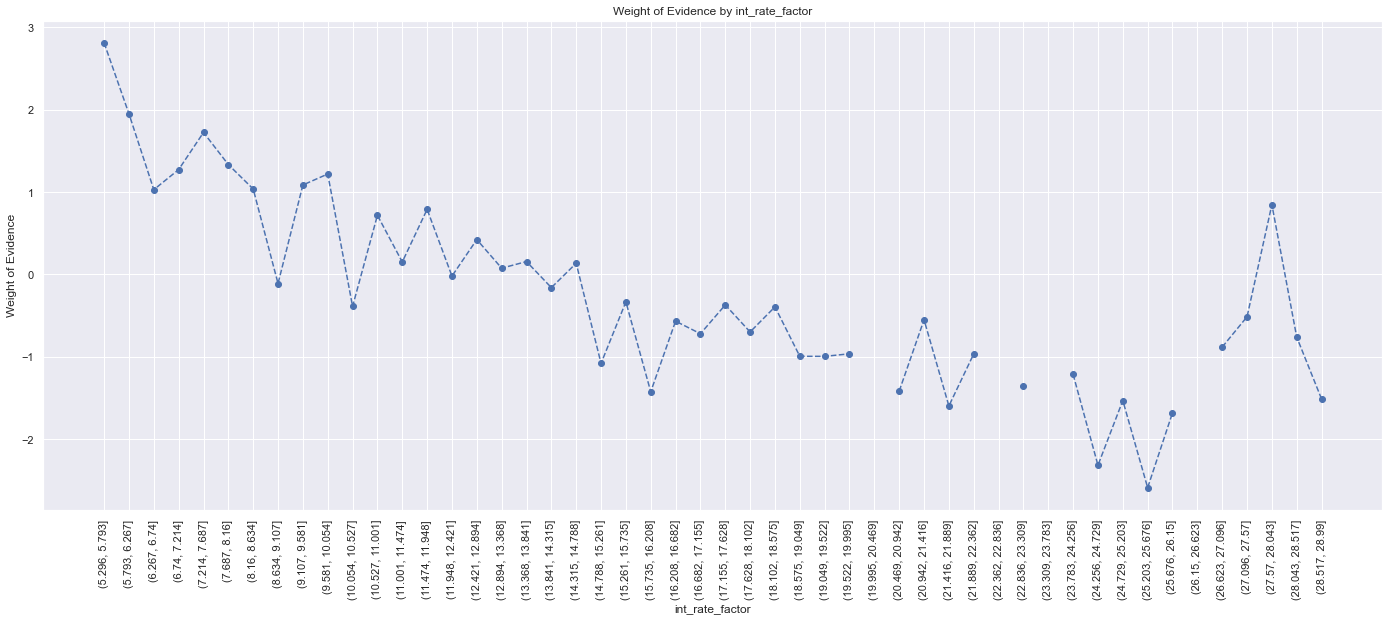

In [88]:
# visualize the weight of evidence by "emp_length_int"
plot_woe(temp, 'int_rate_factor', 'WoE', 90)

In [89]:
# we can see from the plot above that the WoE decreases when the interest rate increases 
# this makes it somehow easier to determine the boundaries of the intervals
# the cutoff point will be at a point where the WoE decreases significantly compared to the previous value
# the following lines of code illustrate the details of the approach
df_inputs_prepr['int_rate: < 9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548 - 12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025 - 15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74 - 20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate: > 20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [90]:
# the next variable that is going to be processed similarly is the funded amount variable "funded_amnt"
# we will again use the pd.cut() method to divide the variable into 50 categories
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_inputs_prepr['funded_amnt_factor'].head()

0    (34320.0, 35000.0]
1      (8480.0, 9160.0]
2      (3720.0, 4400.0]
3     (9840.0, 10520.0]
4    (19360.0, 20040.0]
Name: funded_amnt_factor, dtype: category
Categories (50, interval[float64]): [(966.0, 1680.0] < (1680.0, 2360.0] < (2360.0, 3040.0] < (3040.0, 3720.0] ... (32280.0, 32960.0] < (32960.0, 33640.0] < (33640.0, 34320.0] < (34320.0, 35000.0]]

In [91]:
# calculate the weight of evidence for this variable
temp = woe_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
temp

funded_amnt_factor  n_obs  prop_good  obs_prop   n_good  n_bad  \
0      (966.0, 1680.0]   3391   0.988794  0.008053   3353.0   38.0   
1     (1680.0, 2360.0]   3751   0.990136  0.008908   3714.0   37.0   
2     (2360.0, 3040.0]   8134   0.988444  0.019316   8040.0   94.0   
3     (3040.0, 3720.0]   5133   0.990454  0.012190   5084.0   49.0   
4     (3720.0, 4400.0]   7315   0.987286  0.017371   7222.0   93.0   
5     (4400.0, 5080.0]  18150   0.989587  0.043102  17961.0  189.0   
6     (5080.0, 5760.0]   5617   0.991989  0.013339   5572.0   45.0   
7     (5760.0, 6440.0]  16224   0.989275  0.038528  16050.0  174.0   
8     (6440.0, 7120.0]  10565   0.990156  0.025089  10461.0  104.0   
9     (7120.0, 7800.0]   8423   0.989909  0.020003   8338.0   85.0   
10    (7800.0, 8480.0]  17295   0.990460  0.041072  17130.0  165.0   
11    (8480.0, 9160.0]   9255   0.990384  0.021978   9166.0   89.0   
12    (9160.0, 9840.0]   6898   0.990867  0.016381   6835.0   63.0   
13   (9840.0, 10520.0]  33582   0.990650  0.079749  33268.0  314.0   
14  (10520.0, 11200.0]   9958   0.987648  0.023648   9835.0  123.0   
15  (11200.0, 11880.0]   3813   0.982691  0.009055   3747.0   66.0   
16  (11880.0, 12560.0]  28601   0.990350  0.067921  28325.0  276.0   
17  (12560.0, 13240.0]   7923   0.987000  0.018815   7820.0  103.0   
18  (13240.0, 13920.0]   3723   0.987107  0.008841   3675.0   48.0   
19  (13920.0, 14600.0]  12209   0.989352  0.028994  12079.0  130.0   
20  (14600.0, 15280.0]  26506   0.990606  0.062946  26257.0  249.0   
21  (15280.0, 15960.0]   3535   0.985573  0.008395   3484.0   51.0   
22  (15960.0, 16640.0]  14142   0.990808  0.033584  14012.0  130.0   
23  (16640.0, 17320.0]   6096   0.990486  0.014477   6038.0   58.0   
24  (17320.0, 18000.0]  13664   0.990632  0.032449  13536.0  128.0   
25  (18000.0, 18680.0]   2739   0.986491  0.006504   2702.0   37.0   
26  (18680.0, 19360.0]   4923   0.985984  0.011691   4854.0   69.0   
27  (19360.0, 20040.0]  26477   0.990482  0.062877  26225.0  252.0   
28  (20040.0, 20720.0]   2233   0.990596  0.005303   2212.0   21.0   
29  (20720.0, 21400.0]   7925   0.989653  0.018820   7843.0   82.0   
30  (21400.0, 22080.0]   4795   0.991449  0.011387   4754.0   41.0   
31  (22080.0, 22760.0]   2136   0.987360  0.005073   2109.0   27.0   
32  (22760.0, 23440.0]   3008   0.991356  0.007143   2982.0   26.0   
33  (23440.0, 24120.0]  13806   0.991308  0.032786  13686.0  120.0   
34  (24120.0, 24800.0]   1803   0.980588  0.004282   1768.0   35.0   
35  (24800.0, 25480.0]  13964   0.991335  0.033161  13843.0  121.0   
36  (25480.0, 26160.0]   2063   0.990790  0.004899   2044.0   19.0   
37  (26160.0, 26840.0]   1336   0.982784  0.003173   1313.0   23.0   
38  (26840.0, 27520.0]   2199   0.987722  0.005222   2172.0   27.0   
39  (27520.0, 28200.0]   9083   0.993394  0.021570   9023.0   60.0   
40  (28200.0, 28880.0]   1106   0.974684  0.002626   1078.0   28.0   
41  (28880.0, 29560.0]   1217   0.985210  0.002890   1199.0   18.0   
42  (29560.0, 30240.0]  10292   0.990867  0.024441  10198.0   94.0   
43  (30240.0, 30920.0]    580   0.989655  0.001377    574.0    6.0   
44  (30920.0, 31600.0]    915   0.990164  0.002173    906.0    9.0   
45  (31600.0, 32280.0]   1987   0.985405  0.004719   1958.0   29.0   
46  (32280.0, 32960.0]    632   0.984177  0.001501    622.0   10.0   
47  (32960.0, 33640.0]   1106   0.992767  0.002626   1098.0    8.0   
48  (33640.0, 34320.0]    665   0.989474  0.001579    658.0    7.0   
49  (34320.0, 35000.0]  20201   0.988664  0.047973  19972.0  229.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0      0.008045    0.008839 -0.094187             NaN       NaN    0.030597  
1      0.008911    0.008607  0.034735        0.001342  0.128922    0.030597  
2      0.019290    0.021866 -0.125322        0.001692  0.160057    0.030597  
3      0.012198    0.011398  0.067821        0.002010  0.193144    0.030597  
4      0.017327    0.021633 -0.221924      

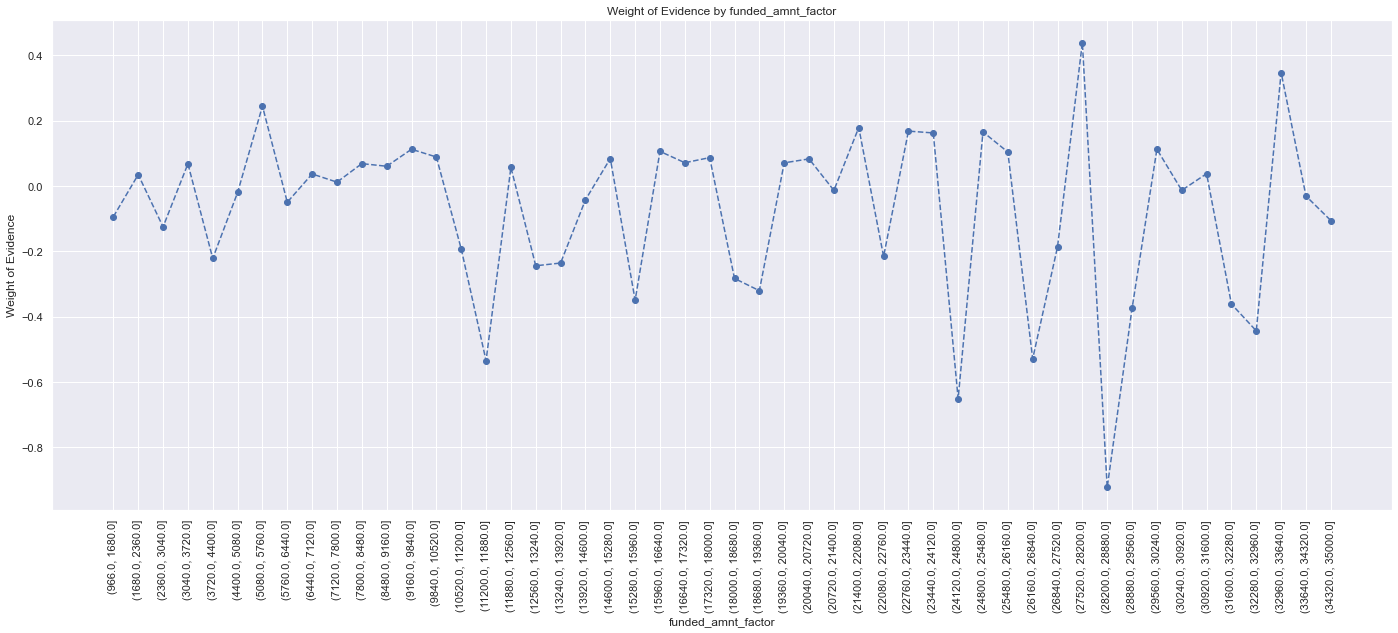

In [92]:
# visualize the weight of evidence by "funded_amnt"
plot_woe(temp, 'funded_amnt_factor', 'WoE', 90)

In [93]:
# the chart shows consecutive intervals for the variable have very different weights of evidence
# at the same time, it shows almost all these variations are around a trend that is almost horizontal
# there is no other clear pattern of dependance between the independante variables and weight of evidence
# in other words, weight of evidence varies greatly and there seems to be no association between "funded_amnt" and WoE
# this is sufficient reason not to use the "funded_amnt" variable in our PD model 

In [94]:
# next, we will preprocess other types of continuous variables
# some continuous variables, like annual income, may contain any value greater than zero, perhaps up to millions
# we will have to cut this kind of variables into categories
# let's start with annual income variable "annual_inc"
# divide the variable into 50 intervals
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)

# calculate the WoE of these intervals
temp = woe_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor   n_obs  prop_good  obs_prop    n_good   n_bad  \
0      (-9500.0, 190000.0]  409693   0.989731  0.972925  405486.0  4207.0   
1     (190000.0, 380000.0]   10007   0.991406  0.023764    9921.0    86.0   
2     (380000.0, 570000.0]     943   0.996819  0.002239     940.0     3.0   
3     (570000.0, 760000.0]     257   0.996109  0.000610     256.0     1.0   
4     (760000.0, 950000.0]      70   1.000000  0.000166      70.0     0.0   
5    (950000.0, 1140000.0]      43   1.000000  0.000102      43.0     0.0   
6   (1140000.0, 1330000.0]      20   0.950000  0.000047      19.0     1.0   
7   (1330000.0, 1520000.0]      14   1.000000  0.000033      14.0     0.0   
8   (1520000.0, 1710000.0]       3   1.000000  0.000007       3.0     0.0   
9   (1710000.0, 1900000.0]       5   1.000000  0.000012       5.0     0.0   
10  (1900000.0, 2090000.0]       2   1.000000  0.000005       2.0     0.0   
11  (2090000.0, 2280000.0]       4   1.000000  0.000009       4.0     0.0   
12  (2280000.0, 2470000.0]       2   1.000000  0.000005       2.0     0.0   
13  (2470000.0, 2660000.0]       2   1.000000  0.000005       2.0     0.0   
14  (2660000.0, 2850000.0]       0        NaN  0.000000       NaN     NaN   
15  (2850000.0, 3040000.0]       3   1.000000  0.000007       3.0     0.0   
16  (3040000.0, 3230000.0]       2   1.000000  0.000005       2.0     0.0   
17  (3230000.0, 3420000.0]       0        NaN  0.000000       NaN     NaN   
18  (3420000.0, 3610000.0]       0        NaN  0.000000       NaN     NaN   
19  (3610000.0, 3800000.0]       0        NaN  0.000000       NaN     NaN   
20  (3800000.0, 3990000.0]       1   1.000000  0.000002       1.0     0.0   
21  (3990000.0, 4180000.0]       1   1.000000  0.000002       1.0     0.0   
22  (4180000.0, 4370000.0]       2   1.000000  0.000005       2.0     0.0   
23  (4370000.0, 4560000.0]       0        NaN  0.000000       NaN     NaN   
24  (4560000.0, 4750000.0]       2   1.000000  0.000005       2.0     0.0   
25  (4750000.0, 4940000.0]       1   1.000000  0.000002       1.0     0.0   
26  (4940000.0, 5130000.0]       3   1.000000  0.000007       3.0     0.0   
27  (5130000.0, 5320000.0]       0        NaN  0.000000       NaN     NaN   
28  (5320000.0, 5510000.0]       0        NaN  0.000000       NaN     NaN   
29  (5510000.0, 5700000.0]       0        NaN  0.000000       NaN     NaN   
30  (5700000.0, 5890000.0]       0        NaN  0.000000       NaN     NaN   
31  (5890000.0, 6080000.0]       3   1.000000  0.000007       3.0     0.0   
32  (6080000.0, 6270000.0]       0        NaN  0.000000       NaN     NaN   
33  (6270000.0, 6460000.0]       0        NaN  0.000000       NaN     NaN   
34  (6460000.0, 6650000.0]       0        NaN  0.000000       NaN     NaN   
35  (6650000.0, 6840000.0]       0        NaN  0.000000       NaN     NaN   
36  (6840000.0, 7030000.0]       2   1.000000  0.000005       2.0     0.0   
37  (7030000.0, 7220000.0]       0        NaN  0.000000       NaN     NaN   
38  (7220000.0, 7410000.0]       0        NaN  0.000000       NaN     NaN   
39  (7410000.0, 7600000.0]       1   1.000000  0.000002       1.0     0.0   
40  (7600000.0, 7790000.0]       0        NaN  0.000000       NaN     NaN   
41  (7790000.0, 7980000.0]       0        NaN  0.000000       NaN     NaN   
42  (7980000.0, 8170000.0]       1   1.000000  0.000002       1.0     0.0   
43  (8170000.0, 8360000.0]       1   1.000000  0.000002       1.0     0.0   
44  (8360000.0, 8550000.0]       1   1.000000  0.000002       1.0     0.0   
45  (8550000.0, 8740000.0]       2   0.500000  0.000005       1.0     1.0   
46  (8740000.0, 8930000.0]       1   1.000000  0.000002       1.0     0.0   
47  (8930000.0, 9120000.0]       1   1.000000  0.000002       1.0     0.0   
48  (9120000.0, 9310000.0]       0        NaN  0.000000       NaN     NaN   
49  (9310000.0, 9500000.0]       1   1.000000  0.000002       1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0  

In [95]:
# it seems that the first interval out of 50 intervals makes up to 97% of the total of observations
# let's calculate the weight of evidence for 100 intervals and see how this proportion changes
# divide the variable into 100 intervals
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)

# calculate the WoE of these intervals
temp = woe_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor   n_obs  prop_good  obs_prop    n_good   n_bad  \
0       (-9500.0, 95000.0]  325648   0.989123  0.773338  322106.0  3542.0   
1      (95000.0, 190000.0]   84045   0.992088  0.199587   83380.0   665.0   
2     (190000.0, 285000.0]    8186   0.991449  0.019440    8116.0    70.0   
3     (285000.0, 380000.0]    1821   0.991214  0.004324    1805.0    16.0   
4     (380000.0, 475000.0]     652   0.995399  0.001548     649.0     3.0   
5     (475000.0, 570000.0]     291   1.000000  0.000691     291.0     0.0   
6     (570000.0, 665000.0]     165   0.993939  0.000392     164.0     1.0   
7     (665000.0, 760000.0]      92   1.000000  0.000218      92.0     0.0   
8     (760000.0, 855000.0]      46   1.000000  0.000109      46.0     0.0   
9     (855000.0, 950000.0]      24   1.000000  0.000057      24.0     0.0   
10   (950000.0, 1045000.0]      31   1.000000  0.000074      31.0     0.0   
11  (1045000.0, 1140000.0]      12   1.000000  0.000028      12.0     0.0   
12  (1140000.0, 1235000.0]       8   1.000000  0.000019       8.0     0.0   
13  (1235000.0, 1330000.0]      12   0.916667  0.000028      11.0     1.0   
14  (1330000.0, 1425000.0]       5   1.000000  0.000012       5.0     0.0   
15  (1425000.0, 1520000.0]       9   1.000000  0.000021       9.0     0.0   
16  (1520000.0, 1615000.0]       0        NaN  0.000000       NaN     NaN   
17  (1615000.0, 1710000.0]       3   1.000000  0.000007       3.0     0.0   
18  (1710000.0, 1805000.0]       3   1.000000  0.000007       3.0     0.0   
19  (1805000.0, 1900000.0]       2   1.000000  0.000005       2.0     0.0   
20  (1900000.0, 1995000.0]       1   1.000000  0.000002       1.0     0.0   
21  (1995000.0, 2090000.0]       1   1.000000  0.000002       1.0     0.0   
22  (2090000.0, 2185000.0]       3   1.000000  0.000007       3.0     0.0   
23  (2185000.0, 2280000.0]       1   1.000000  0.000002       1.0     0.0   
24  (2280000.0, 2375000.0]       2   1.000000  0.000005       2.0     0.0   
25  (2375000.0, 2470000.0]       0        NaN  0.000000       NaN     NaN   
26  (2470000.0, 2565000.0]       2   1.000000  0.000005       2.0     0.0   
27  (2565000.0, 2660000.0]       0        NaN  0.000000       NaN     NaN   
28  (2660000.0, 2755000.0]       0        NaN  0.000000       NaN     NaN   
29  (2755000.0, 2850000.0]       0        NaN  0.000000       NaN     NaN   
30  (2850000.0, 2945000.0]       1   1.000000  0.000002       1.0     0.0   
31  (2945000.0, 3040000.0]       2   1.000000  0.000005       2.0     0.0   
32  (3040000.0, 3135000.0]       1   1.000000  0.000002       1.0     0.0   
33  (3135000.0, 3230000.0]       1   1.000000  0.000002       1.0     0.0   
34  (3230000.0, 3325000.0]       0        NaN  0.000000       NaN     NaN   
35  (3325000.0, 3420000.0]       0        NaN  0.000000       NaN     NaN   
36  (3420000.0, 3515000.0]       0        NaN  0.000000       NaN     NaN   
37  (3515000.0, 3610000.0]       0        NaN  0.000000       NaN     NaN   
38  (3610000.0, 3705000.0]       0        NaN  0.000000       NaN     NaN   
39  (3705000.0, 3800000.0]       0        NaN  0.000000       NaN     NaN   
40  (3800000.0, 3895000.0]       0        NaN  0.000000       NaN     NaN   
41  (3895000.0, 3990000.0]       1   1.000000  0.000002       1.0     0.0   
42  (3990000.0, 4085000.0]       1   1.000000  0.000002       1.0     0.0   
43  (4085000.0, 4180000.0]       0        NaN  0.000000       NaN     NaN   
44  (4180000.0, 4275000.0]       0        NaN  0.000000       NaN     NaN   
45  (4275000.0, 4370000.0]       2   1.000000  0.000005       2.0     0.0   
46  (4370000.0, 4465000.0]       0        NaN  0.000000       NaN     NaN   
47  (4465000.0, 4560000.0]       0        NaN  0.000000       NaN     NaN   
48  (4560000.0, 4655000.0]       1   1.000000  0.000002       1.0     0.0   
49  (4655000.0, 4750000.0]       1   1.000000  0.000002       1.0     0.0   
50  (4750000.0, 4845000.0]       1   1.000000  0.000002       1.0     0.0   
51  (

In [96]:
# the first interval still has the highest number of observations with a proportion down to 88%
# the second interval has the second highest number of observations 
# this can be expected, there are a few people with high income and a lot of people with low income
# the idea here is to put aside people with very high income and investigate people with lower income separately
# the first two categories contain a lot of observations while the subsequent categories contain very few observations
# so the number of observations becomes lower and lower as we go into categories with higher income  
# we'll create one dummy variable for people with large income and figure out what dummy variables to create for people with lower income next
# the third category starts with the number 140000 so we assume that $140,000 is the threshold above which people are considered to have high income
# this means that the number of observations with very high income will include about 4% of total observations
# so we will create a category for people with income higher than $140,000
# now let's take a look at only the remaining observations with income lower than $140,000
# for convenience, let's store them in a dataframe
df_inputs_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, :]

# split the "annual_inc" variable into 50 categories
df_inputs_temp['annual_inc_factor'] = pd.cut(df_inputs_temp['annual_inc'], 50)

# the two lines of code below removes all rows with duplicate indices for the "df_inputs_temp" and "df_targets_prepr" dataframes
# if the WoE is calculated without removing the rows with duplicate indices we'll get errors  
# df_inputs_temp = df_inputs_temp[~df_inputs_temp.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]

# calculate the weight of evidence by annual income
temp = woe_continuous(df_inputs_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_temp.index])
temp

<ipython-input-96-cc5f38b68760>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_temp['annual_inc_factor'] = pd.cut(df_inputs_temp['annual_inc'], 50)
C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor  n_obs  prop_good  obs_prop   n_good  n_bad  \
0       (-140.0, 2800.0]      4   1.000000  0.000010      4.0    0.0   
1       (2800.0, 5600.0]     12   1.000000  0.000031     12.0    0.0   
2       (5600.0, 8400.0]     55   0.981818  0.000141     54.0    1.0   
3      (8400.0, 11200.0]    429   0.986014  0.001097    423.0    6.0   
4     (11200.0, 14000.0]    873   0.986254  0.002233    861.0   12.0   
5     (14000.0, 16800.0]   1339   0.988798  0.003425   1324.0   15.0   
6     (16800.0, 19600.0]   1808   0.986173  0.004624   1783.0   25.0   
7     (19600.0, 22400.0]   3823   0.987444  0.009778   3775.0   48.0   
8     (22400.0, 25200.0]   6445   0.984794  0.016485   6347.0   98.0   
9     (25200.0, 28000.0]   5904   0.984925  0.015101   5815.0   89.0   
10    (28000.0, 30800.0]   8968   0.984389  0.022938   8828.0  140.0   
11    (30800.0, 33600.0]   8605   0.986519  0.022010   8489.0  116.0   
12    (33600.0, 36400.0]  14614   0.985562  0.037380  14403.0  211.0   
13    (36400.0, 39200.0]   9747   0.986765  0.024931   9618.0  129.0   
14    (39200.0, 42000.0]  20957   0.988214  0.053604  20710.0  247.0   
15    (42000.0, 44800.0]   7486   0.990248  0.019148   7413.0   73.0   
16    (44800.0, 47600.0]  18165   0.988715  0.046462  17960.0  205.0   
17    (47600.0, 50400.0]  24554   0.988474  0.062804  24271.0  283.0   
18    (50400.0, 53200.0]  12921   0.989707  0.033049  12788.0  133.0   
19    (53200.0, 56000.0]  18407   0.991308  0.047081  18247.0  160.0   
20    (56000.0, 58800.0]   7766   0.988411  0.019864   7676.0   90.0   
21    (58800.0, 61600.0]  20831   0.989631  0.053281  20615.0  216.0   
22    (61600.0, 64400.0]  10082   0.990577  0.025788   9987.0   95.0   
23    (64400.0, 67200.0]  17704   0.990228  0.045283  17531.0  173.0   
24    (67200.0, 70000.0]  17956   0.989697  0.045928  17771.0  185.0   
25    (70000.0, 72800.0]   7841   0.990690  0.020056   7768.0   73.0   
26    (72800.0, 75600.0]  15452   0.989645  0.039523  15292.0  160.0   
27    (75600.0, 78400.0]   6675   0.989813  0.017073   6607.0   68.0   
28    (78400.0, 81200.0]  14475   0.991779  0.037024  14356.0  119.0   
29    (81200.0, 84000.0]   6859   0.989794  0.017544   6789.0   70.0   
30    (84000.0, 86800.0]  10260   0.991326  0.026243  10171.0   89.0   
31    (86800.0, 89600.0]   4986   0.990774  0.012753   4940.0   46.0   
32    (89600.0, 92400.0]  11984   0.991322  0.030653  11880.0  104.0   
33    (92400.0, 95200.0]   7715   0.991834  0.019733   7652.0   63.0   
34    (95200.0, 98000.0]   5317   0.990596  0.013600   5267.0   50.0   
35   (98000.0, 100800.0]  10251   0.991025  0.026220  10159.0   92.0   
36  (100800.0, 103600.0]   3706   0.989207  0.009479   3666.0   40.0   
37  (103600.0, 106400.0]   5582   0.991938  0.014278   5537.0   45.0   
38  (106400.0, 109200.0]   2814   0.991116  0.007198   2789.0   25.0   
39  (109200.0, 112000.0]   7067   0.993208  0.018076   7019.0   48.0   
40  (112000.0, 114800.0]   1321   0.996972  0.003379   1317.0    4.0   
41  (114800.0, 117600.0]   3842   0.994794  0.009827   3822.0   20.0   
42  (117600.0, 120400.0]   7803   0.991285  0.019958   7735.0   68.0   
43  (120400.0, 123200.0]   1197   0.994987  0.003062   1191.0    6.0   
44  (123200.0, 126000.0]   4648   0.989458  0.011889   4599.0   49.0   
45  (126000.0, 128800.0]    981   0.988787  0.002509    970.0   11.0   
46  (128800.0, 131600.0]   3885   0.993565  0.009937   3860.0   25.0   
47  (131600.0, 134400.0]    971   0.994851  0.002484    966.0    5.0   
48  (134400.0, 137200.0]   2552   0.991379  0.006527   2530.0   22.0   
49  (137200.0, 140000.0]   3323   0.992778  0.008500   3299.0   24.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0      0.000010    0.000000       inf             NaN       NaN         inf  
1      0.000031    0.000000       inf        0.000000       NaN         inf  
2      0.000140    0.000245 -0.564030        0.018182       inf         inf  
3      0.001093    0.0

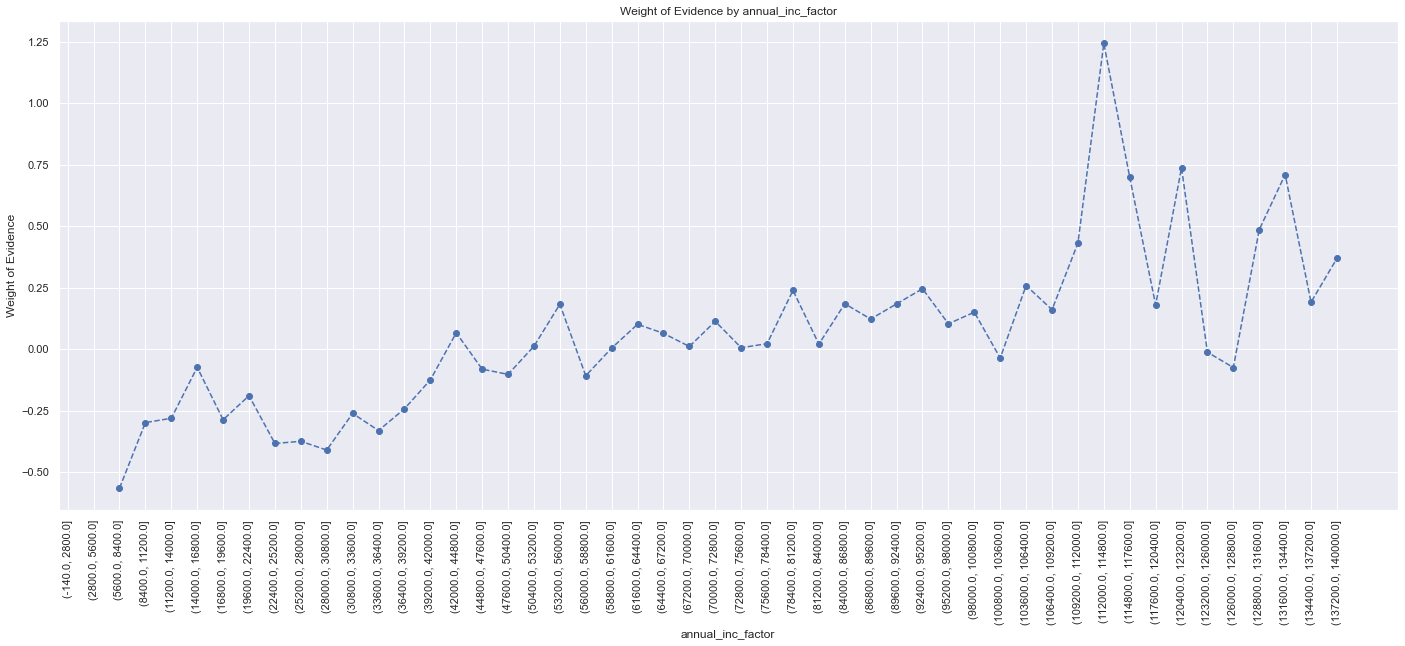

In [97]:
# viualize the WoE by annual income
plot_woe(temp, 'annual_inc_factor', 'WoE', 90)

In [98]:
# what we see here, is that the WoE increases almost monotonically with annual income
# we can split the variable into some roughly equal intervals 
# taking into consideration the number of observations I have split the variable with intervals of $10,000 or $20,000 each  
# below is the relevant code 
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [99]:
# now let's face the issue of missing values
# I created a dummy variable indicating that the value of the original variable is missing:
# 1: when the value is missing and 2: when the value is not missing
# first I stored the not missing value in a separate dataframe, this carried out on the "mths_since_last_delinq"
df_inputs_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]

# now let's do some fine classing
df_inputs_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_temp['mths_since_last_delinq'], 50)

# calculate the weight of evidence by months since last delinquency
df_temp = woe_continuous(df_inputs_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_temp.index])
df_temp

<ipython-input-99-ef6dc040bb76>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_temp['mths_since_last_delinq'], 50)
C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


mths_since_last_delinq_factor  n_obs  prop_good  obs_prop   n_good  n_bad  \
0                 (-0.176, 3.52]   7261   0.985815  0.033440   7158.0  103.0   
1                   (3.52, 7.04]  15763   0.990230  0.072596  15609.0  154.0   
2                  (7.04, 10.56]  12365   0.991427  0.056947  12259.0  106.0   
3                 (10.56, 14.08]  16125   0.989085  0.074263  15949.0  176.0   
4                  (14.08, 17.6]  11384   0.986033  0.052429  11225.0  159.0   
5                  (17.6, 21.12]  14291   0.989714  0.065817  14144.0  147.0   
6                 (21.12, 24.64]  10544   0.990231  0.048560  10441.0  103.0   
7                 (24.64, 28.16]  13761   0.990408  0.063376  13629.0  132.0   
8                 (28.16, 31.68]   9867   0.991994  0.045442   9788.0   79.0   
9                  (31.68, 35.2]  12583   0.991258  0.057951  12473.0  110.0   
10                 (35.2, 38.72]   8869   0.988838  0.040846   8770.0   99.0   
11                (38.72, 42.24]  11025   0.991020  0.050775  10926.0   99.0   
12                (42.24, 45.76]   8005   0.990506  0.036867   7929.0   76.0   
13                (45.76, 49.28]   9697   0.989481  0.044659   9595.0  102.0   
14                 (49.28, 52.8]   5298   0.990185  0.024400   5246.0   52.0   
15                 (52.8, 56.32]   7492   0.988788  0.034504   7408.0   84.0   
16                (56.32, 59.84]   5786   0.989803  0.026647   5727.0   59.0   
17                (59.84, 63.36]   7743   0.988506  0.035660   7654.0   89.0   
18                (63.36, 66.88]   5785   0.991530  0.026643   5736.0   49.0   
19                 (66.88, 70.4]   7266   0.991329  0.033463   7203.0   63.0   
20                 (70.4, 73.92]   4913   0.990026  0.022627   4864.0   49.0   
21                (73.92, 77.44]   5702   0.991231  0.026260   5652.0   50.0   
22                (77.44, 80.96]   3639   0.989832  0.016759   3602.0   37.0   
23                (80.96, 84.48]   1650   0.989697  0.007599   1633.0   17.0   
24                 (84.48, 88.0]    106   0.990566  0.000488    105.0    1.0   
25                 (88.0, 91.52]     40   0.975000  0.000184     39.0    1.0   
26                (91.52, 95.04]     40   0.975000  0.000184     39.0    1.0   
27                (95.04, 98.56]     20   1.000000  0.000092     20.0    0.0   
28               (98.56, 102.08]     28   1.000000  0.000129     28.0    0.0   
29               (102.08, 105.6]     11   1.000000  0.000051     11.0    0.0   
30               (105.6, 109.12]     19   1.000000  0.000088     19.0    0.0   
31              (109.12, 112.64]     10   1.000000  0.000046     10.0    0.0   
32              (112.64, 116.16]     10   1.000000  0.000046     10.0    0.0   
33              (116.16, 119.68]      5   1.000000  0.000023      5.0    0.0   
34               (119.68, 123.2]     11   1.000000  0.000051     11.0    0.0   
35               (123.2, 126.72]      1   1.000000  0.000005      1.0    0.0   
36              (126.72, 130.24]      2   1.000000  0.000009      2.0    0.0   
37              (130.24, 133.76]      2   1.000000  0.000009      2.0    0.0   
38              (133.76, 137.28]      2   1.000000  0.000009      2.0    0.0   
39               (137.28, 140.8]      0        NaN  0.000000      NaN    NaN   
40               (140.8, 144.32]      1   1.000000  0.000005      1.0    0.0   
41              (144.32, 147.84]      2   1.000000  0.000009      2.0    0.0   
42              (147.84, 151.36]      1   1.000000  0.000005      1.0    0.0   
43              (151.36, 154.88]      3   1.000000  0.000014      3.0    0.0   
44               (154.88, 158.4]      1   1.000000  0.000005      1.0    0.0   
45               (158.4, 161.92]      0        NaN  0.000000      NaN    NaN   
46              (161.92, 165.44]      0        NaN  0.000000      NaN    NaN   
47              (165.44, 168.96]      0        NaN  0.000000      NaN    NaN   
48              (168.96, 172.48]      3   1.000000  0.000014      3.0    0.0   
49 

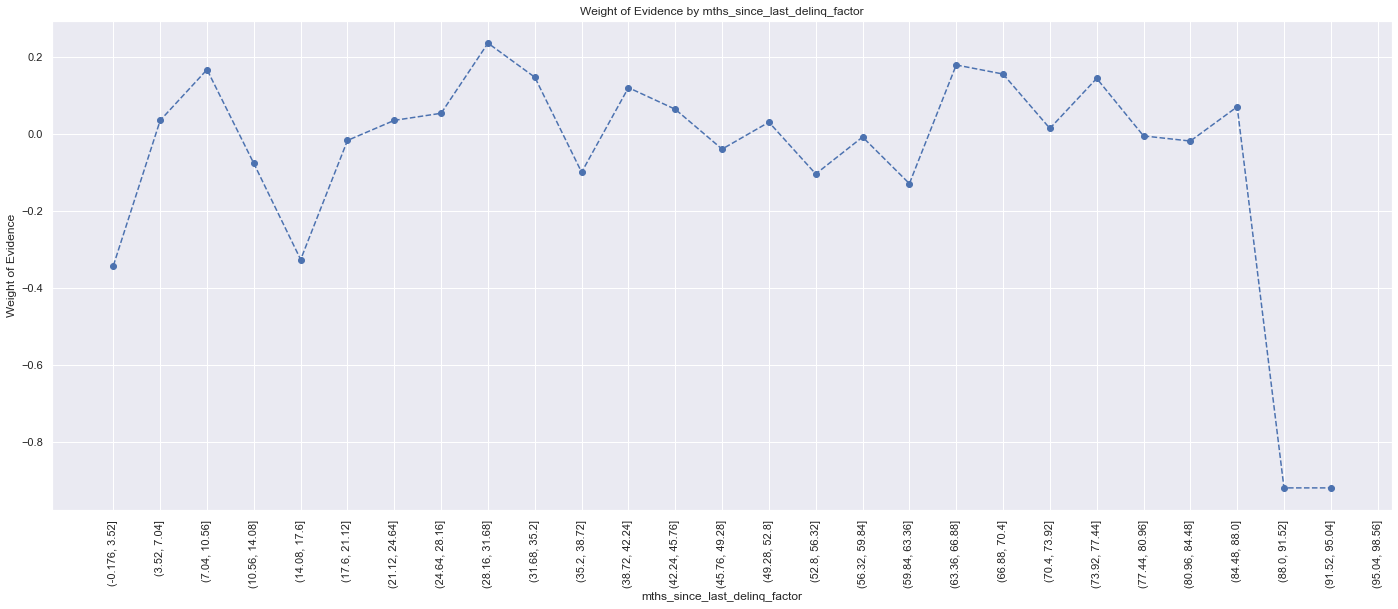

In [100]:
# visualize the WoE by "mths_since_last_delinq"
plot_woe(df_temp, 'mths_since_last_delinq_factor', 'WoE', 90)

In [101]:
# again we will use the np.where() method to create some dummy variables
# below is the relevant code
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [102]:
# the next variable to deal with is the the debt-to-income ratio variable "dti" that will be preprocessed as the "annual_inc" variable
# let's split the variable into 50 categories
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
# df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

dti_factor   n_obs  prop_good  obs_prop    n_good   n_bad  \
0     (-9.999, 199.98]  421089   0.989791  0.999988  416790.0  4299.0   
1     (199.98, 399.96]       1   1.000000  0.000002       1.0     0.0   
2     (399.96, 599.94]       0        NaN  0.000000       NaN     NaN   
3     (599.94, 799.92]       1   1.000000  0.000002       1.0     0.0   
4      (799.92, 999.9]       0        NaN  0.000000       NaN     NaN   
5     (999.9, 1199.88]       1   1.000000  0.000002       1.0     0.0   
6   (1199.88, 1399.86]       0        NaN  0.000000       NaN     NaN   
7   (1399.86, 1599.84]       0        NaN  0.000000       NaN     NaN   
8   (1599.84, 1799.82]       0        NaN  0.000000       NaN     NaN   
9    (1799.82, 1999.8]       0        NaN  0.000000       NaN     NaN   
10   (1999.8, 2199.78]       0        NaN  0.000000       NaN     NaN   
11  (2199.78, 2399.76]       0        NaN  0.000000       NaN     NaN   
12  (2399.76, 2599.74]       0        NaN  0.000000       NaN     NaN   
13  (2599.74, 2799.72]       0        NaN  0.000000       NaN     NaN   
14   (2799.72, 2999.7]       0        NaN  0.000000       NaN     NaN   
15   (2999.7, 3199.68]       0        NaN  0.000000       NaN     NaN   
16  (3199.68, 3399.66]       0        NaN  0.000000       NaN     NaN   
17  (3399.66, 3599.64]       0        NaN  0.000000       NaN     NaN   
18  (3599.64, 3799.62]       0        NaN  0.000000       NaN     NaN   
19   (3799.62, 3999.6]       0        NaN  0.000000       NaN     NaN   
20   (3999.6, 4199.58]       0        NaN  0.000000       NaN     NaN   
21  (4199.58, 4399.56]       0        NaN  0.000000       NaN     NaN   
22  (4399.56, 4599.54]       0        NaN  0.000000       NaN     NaN   
23  (4599.54, 4799.52]       0        NaN  0.000000       NaN     NaN   
24   (4799.52, 4999.5]       0        NaN  0.000000       NaN     NaN   
25   (4999.5, 5199.48]       0        NaN  0.000000       NaN     NaN   
26  (5199.48, 5399.46]       0        NaN  0.000000       NaN     NaN   
27  (5399.46, 5599.44]       0        NaN  0.000000       NaN     NaN   
28  (5599.44, 5799.42]       0        NaN  0.000000       NaN     NaN   
29   (5799.42, 5999.4]       0        NaN  0.000000       NaN     NaN   
30   (5999.4, 6199.38]       0        NaN  0.000000       NaN     NaN   
31  (6199.38, 6399.36]       0        NaN  0.000000       NaN     NaN   
32  (6399.36, 6599.34]       0        NaN  0.000000       NaN     NaN   
33  (6599.34, 6799.32]       0        NaN  0.000000       NaN     NaN   
34   (6799.32, 6999.3]       0        NaN  0.000000       NaN     NaN   
35   (6999.3, 7199.28]       0        NaN  0.000000       NaN     NaN   
36  (7199.28, 7399.26]       0        NaN  0.000000       NaN     NaN   
37  (7399.26, 7599.24]       0        NaN  0.000000       NaN     NaN   
38  (7599.24, 7799.22]       0        NaN  0.000000       NaN     NaN   
39   (7799.22, 7999.2]       0        NaN  0.000000       NaN     NaN   
40   (7999.2, 8199.18]       0        NaN  0.000000       NaN     NaN   
41  (8199.18, 8399.16]       0        NaN  0.000000       NaN     NaN   
42  (8399.16, 8599.14]       0        NaN  0.000000       NaN     NaN   
43  (8599.14, 8799.12]       0        NaN  0.000000       NaN     NaN   
44   (8799.12, 8999.1]       0        NaN  0.000000       NaN     NaN   
45   (8999.1, 9199.08]       0        NaN  0.000000       NaN     NaN   
46  (9199.08, 9399.06]       0        NaN  0.000000       NaN     NaN   
47  (9399.06, 9599.04]       0        NaN  0.000000       NaN     NaN   
48  (9599.04, 9799.02]       0        NaN  0.000000       NaN     NaN   
49   (9799.02, 9999.0]       2   1.000000  0.000005       2.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0      0.999988         1.0 -0.000012             NaN       NaN         inf  
1      0.000002         0.0       inf        0.010209       inf         inf  
2           NaN         NaN       NaN             NaN 

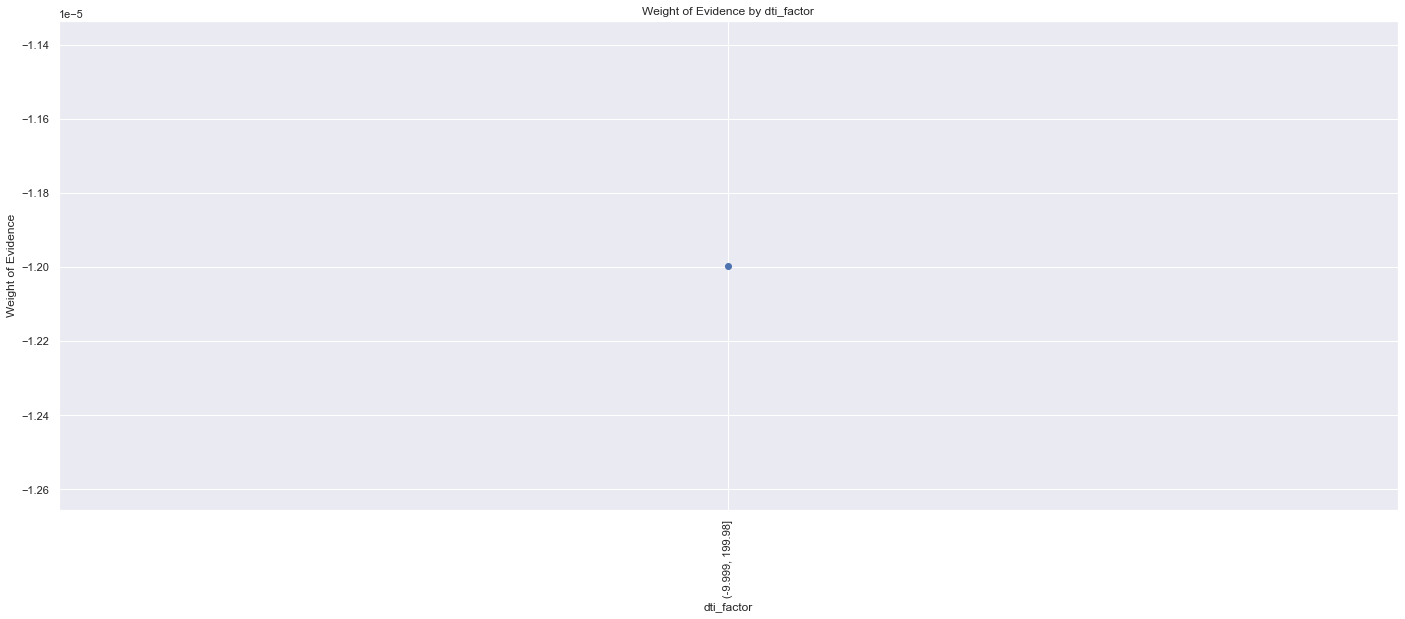

In [103]:
# visualize the weight of evidence by debt-to-income ratio
plot_woe(df_temp, 'dti_factor', 'WoE', 90)

In [104]:
# the first interval has the lowest WoE so it will have its own dummy variable and will be the reference category
# below is the relevant code
df_inputs_prepr['dti: <= 1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti: 1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti: 3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti: 7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti: 10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti: 16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti: 20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti: 21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti: 22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti: > 35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [105]:
# one more variable to preprocess is the "mths_since_last_record" 
# first I stored the not missing value in a separate dataframe, this carried out on the "mths_since_last_delinq"
df_inputs_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

# then let's cut this variable into 50 categories
df_inputs_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr['mths_since_last_record'], 50)

# calculate the weight of evidence by "mths_since_last_record"
df_temp = woe_continuous(df_inputs_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_temp.index])
df_temp

<ipython-input-105-195f97fa95d1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr['mths_since_last_record'], 50)
C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


mths_since_last_record_factor  n_obs  prop_good  obs_prop  n_good  n_bad  \
0                   (-0.12, 2.4]     87   1.000000  0.001169    87.0    0.0   
1                     (2.4, 4.8]    161   1.000000  0.002164   161.0    0.0   
2                     (4.8, 7.2]    344   0.985465  0.004623   339.0    5.0   
3                     (7.2, 9.6]    291   0.989691  0.003911   288.0    3.0   
4                    (9.6, 12.0]    537   0.992551  0.007216   533.0    4.0   
5                   (12.0, 14.4]    404   0.992574  0.005429   401.0    3.0   
6                   (14.4, 16.8]    410   0.987805  0.005510   405.0    5.0   
7                   (16.8, 19.2]    693   0.991342  0.009313   687.0    6.0   
8                   (19.2, 21.6]    521   0.988484  0.007001   515.0    6.0   
9                   (21.6, 24.0]    825   0.989091  0.011086   816.0    9.0   
10                  (24.0, 26.4]    653   0.984686  0.008775   643.0   10.0   
11                  (26.4, 28.8]    742   0.989218  0.009971   734.0    8.0   
12                  (28.8, 31.2]   1241   0.991136  0.016677  1230.0   11.0   
13                  (31.2, 33.6]    936   0.990385  0.012578   927.0    9.0   
14                  (33.6, 36.0]   1520   0.994079  0.020426  1511.0    9.0   
15                  (36.0, 38.4]   1188   0.984007  0.015965  1169.0   19.0   
16                  (38.4, 40.8]   1219   0.993437  0.016381  1211.0    8.0   
17                  (40.8, 43.2]   1936   0.991736  0.026016  1920.0   16.0   
18                  (43.2, 45.6]   1342   0.990313  0.018034  1329.0   13.0   
19                  (45.6, 48.0]   2299   0.992605  0.030894  2282.0   17.0   
20                  (48.0, 50.4]   1654   0.988513  0.022227  1635.0   19.0   
21                  (50.4, 52.8]   1834   0.986369  0.024646  1809.0   25.0   
22                  (52.8, 55.2]   3195   0.987480  0.042935  3155.0   40.0   
23                  (55.2, 57.6]   2155   0.984223  0.028959  2121.0   34.0   
24                  (57.6, 60.0]   3350   0.989851  0.045018  3316.0   34.0   
25                  (60.0, 62.4]   2408   0.995432  0.032359  2397.0   11.0   
26                  (62.4, 64.8]   2440   0.990164  0.032789  2416.0   24.0   
27                  (64.8, 67.2]   3676   0.991567  0.049399  3645.0   31.0   
28                  (67.2, 69.6]   2500   0.994800  0.033595  2487.0   13.0   
29                  (69.6, 72.0]   3782   0.991274  0.050823  3749.0   33.0   
30                  (72.0, 74.4]   2381   0.994120  0.031996  2367.0   14.0   
31                  (74.4, 76.8]   2489   0.989956  0.033448  2464.0   25.0   
32                  (76.8, 79.2]   3471   0.990781  0.046644  3439.0   32.0   
33                  (79.2, 81.6]   2197   0.986800  0.029524  2168.0   29.0   
34                  (81.6, 84.0]   2729   0.989007  0.036673  2699.0   30.0   
35                  (84.0, 86.4]   1593   0.989328  0.021407  1576.0   17.0   
36                  (86.4, 88.8]   1413   0.985846  0.018988  1393.0   20.0   
37                  (88.8, 91.2]   1790   0.987709  0.024054  1768.0   22.0   
38                  (91.2, 93.6]   1001   0.989011  0.013452   990.0   11.0   
39                  (93.6, 96.0]   1309   0.981665  0.017591  1285.0   24.0   
40                  (96.0, 98.4]    815   0.984049  0.010952   802.0   13.0   
41                 (98.4, 100.8]    733   0.984993  0.009850   722.0   11.0   
42                (100.8, 103.2]   1026   0.988304  0.013788  1014.0   12.0   
43                (103.2, 105.6]    605   0.991736  0.008130   600.0    5.0   
44                (105.6, 108.0]    775   0.981935  0.010415   761.0   14.0   
45                (108.0, 110.4]    546   0.987179  0.007337   539.0    7.0   
46                (110.4, 112.8]    898   0.975501  0.012067   876.0   22.0   
47                (112.8, 115.2]   1728   0.979745  0.023221  1693.0   35.0   
48                (115.2, 117.6]   1382   0.985528  0.018572  1362.0   20.0   
49                (117.6, 120.0]   1191   0.989924  0

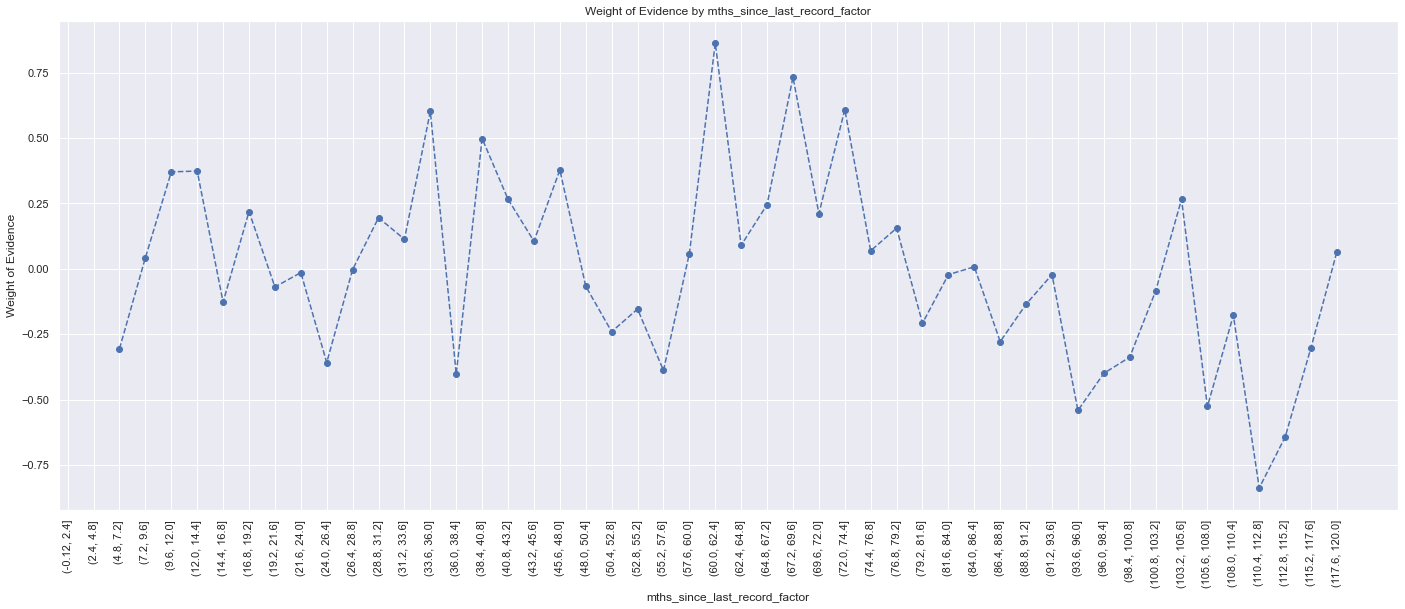

In [106]:
plot_woe(df_temp, 'mths_since_last_record_factor', 'WoE', 90)

In [107]:
# the first interval has the lowest WoE so it will have its own dummy variable
# below is the relevant code
df_inputs_prepr['mths_since_last_record: Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record: 0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record: 3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record: 21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record: 32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record: 81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record: > 86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

In [108]:
# print the unique values of the "mths_since_earliest_cr_line" column
df_inputs_prepr['mth_since_earliest_cr_line'].unique()

array([334., 197.,  77., 228., 208., 193., 192., 172., 362., 296., 422.,
       234., 187., 183., 195., 153., 205., 111., 277., 403., 196., 203.,
       230., 158., 240., 318., 258., 198., 100., 319., 244., 384., 190.,
       346., 210., 191., 166., 135., 330., 307., 201., 180., 284., 131.,
       262., 186.,  74., 188., 227., 239., 152., 123., 134., 150., 155.,
       291., 145., 364., 217., 162., 138., 332., 270., 181., 376., 176.,
        83.,  97., 112., 272., 283., 254., 200., 161., 159., 279.,  70.,
       216., 246., 218., 207., 115., 263., 171., 226., 160., 146., 169.,
       189., 289., 360., 126., 199., 211., 139., 128., 358., 163., 182.,
       167., 344., 411., 339., 118., 140., 320., 220., 290., 164.,  67.,
       202., 175., 361., 343., 105., 119., 438., 170., 480., 214., 414.,
       261., 184., 235., 483., 327., 520., 391., 251., 274.,  76., 204.,
       223., 225., 213., 356., 313., 253., 232., 308., 156., 257., 385.,
       458.,  96., 293., 110., 249., 416., 173., 20

In [109]:
# the next variable to deal with is the "mth_since_earliest_cr_line" 
# let's split the variable into 50 categories
df_inputs_prepr['mth_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mth_since_earliest_cr_line'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
# df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'mth_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

mth_since_earliest_cr_line_factor  n_obs  prop_good  obs_prop   n_good  \
0                    (60.474, 71.52]   2001   0.994003  0.004752   1989.0   
1                     (71.52, 82.04]   4886   0.987311  0.011603   4824.0   
2                     (82.04, 92.56]   4610   0.985033  0.010948   4541.0   
3                    (92.56, 103.08]   5446   0.986228  0.012933   5371.0   
4                    (103.08, 113.6]   6146   0.985519  0.014595   6057.0   
5                    (113.6, 124.12]  10200   0.986863  0.024223  10066.0   
6                   (124.12, 134.64]  11155   0.985477  0.026491  10993.0   
7                   (134.64, 145.16]  15641   0.986957  0.037144  15437.0   
8                   (145.16, 155.68]  18480   0.988961  0.043886  18276.0   
9                    (155.68, 166.2]  24374   0.988102  0.057883  24084.0   
10                   (166.2, 176.72]  23553   0.989428  0.055933  23304.0   
11                  (176.72, 187.24]  25918   0.988811  0.061549  25628.0   
12                  (187.24, 197.76]  24415   0.989392  0.057980  24156.0   
13                  (197.76, 208.28]  25908   0.990389  0.061525  25659.0   
14                   (208.28, 218.8]  21150   0.989693  0.050226  20932.0   
15                   (218.8, 229.32]  20886   0.990185  0.049599  20681.0   
16                  (229.32, 239.84]  16822   0.989894  0.039948  16652.0   
17                  (239.84, 250.36]  16459   0.989914  0.039086  16293.0   
18                  (250.36, 260.88]  14610   0.991650  0.034695  14488.0   
19                   (260.88, 271.4]  15788   0.991513  0.037493  15654.0   
20                   (271.4, 281.92]  12804   0.990940  0.030407  12688.0   
21                  (281.92, 292.44]  12779   0.991001  0.030347  12664.0   
22                  (292.44, 302.96]   8808   0.994210  0.020917   8757.0   
23                  (302.96, 313.48]   7483   0.991715  0.017770   7421.0   
24                   (313.48, 324.0]   7441   0.993146  0.017671   7390.0   
25                   (324.0, 334.52]   7372   0.992268  0.017507   7315.0   
26                  (334.52, 345.04]   7591   0.989988  0.018027   7515.0   
27                  (345.04, 355.56]   5732   0.992149  0.013612   5687.0   
28                  (355.56, 366.08]   5946   0.990918  0.014120   5892.0   
29                   (366.08, 376.6]   4670   0.991649  0.011090   4631.0   
30                   (376.6, 387.12]   4423   0.989826  0.010504   4378.0   
31                  (387.12, 397.64]   3711   0.991108  0.008813   3678.0   
32                  (397.64, 408.16]   3844   0.993236  0.009129   3818.0   
33                  (408.16, 418.68]   2925   0.993162  0.006946   2905.0   
34                   (418.68, 429.2]   2528   0.993275  0.006003   2511.0   
35                   (429.2, 439.72]   1702   0.993537  0.004042   1691.0   
36                  (439.72, 450.24]   1584   0.991162  0.003762   1570.0   
37                  (450.24, 460.76]   1355   0.990406  0.003218   1342.0   
38                  (460.76, 471.28]   1492   0.990617  0.003543   1478.0   
39                   (471.28, 481.8]   1336   0.991766  0.003173   1325.0   
40                   (481.8, 492.32]   1256   0.991242  0.002983   1245.0   
41                  (492.32, 502.84]    872   0.988532  0.002071    862.0   
42                  (502.84, 513.36]    786   0.989822  0.001867    778.0   
43                  (513.36, 523.88]    592   0.986486  0.001406    584.0   
44                   (523.88, 534.4]    612   0.986928  0.001453    604.0   
45                   (534.4, 544.92]    517   1.000000  0.001228    517.0   
46                  (544.92, 555.44]    452   0.993363  0.001073    449.0   
47                  (555.44, 565.96]    280   0.992857  0.000665    278.0   
48                  (565.96, 576.48]    327   0.984709  0.000777    322.0   
49                   (576.48, 587.0]   1426   0.992286  0.003386   1415.0   

    n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0

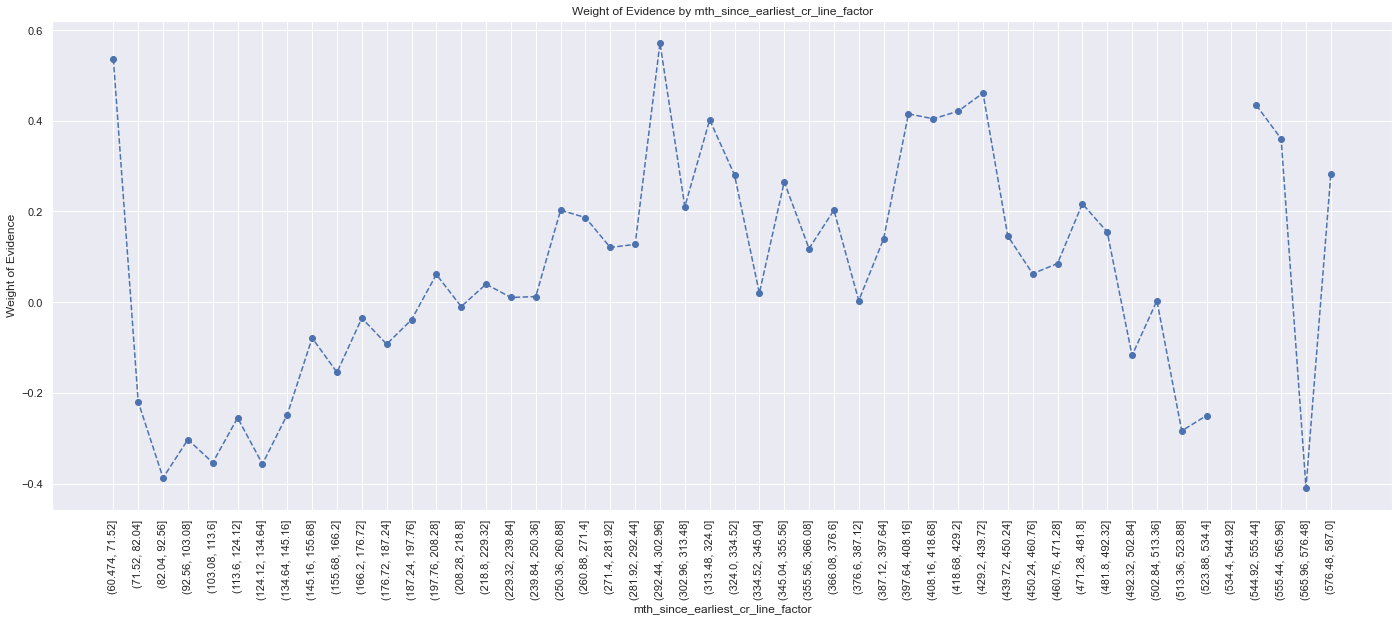

In [110]:
# visualize the weight of evidence by "mth_since_earliest_cr_line"
plot_woe(df_temp, 'mth_since_earliest_cr_line_factor', 'WoE', 90)

In [111]:
# we create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mth_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mth_since_earliest_cr_line'].max()))), 1, 0)

In [112]:
# print the unique value of the "delinq_2yrs" variable
df_inputs_prepr['delinq_2yrs'].unique()

array([ 0.,  2.,  1.,  3.,  4.,  6.,  5., 15.,  7.,  9., 10.,  8., 11.,
       13., 14., 12., 30., 18., 16., 17., 26., 20., 19., 22., 27., 39.])

In [113]:
# the next variable to deal with is the "delinq_2yrs" variable 
# let's split the variable into 50 categories
# df_inputs_prepr['delinq_2yrs_factor'] = pd.cut(df_inputs_prepr['delinq_2yrs'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
# df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


delinq_2yrs   n_obs  prop_good  obs_prop    n_good   n_bad  prop_n_good  \
0           0.0  334007   0.989904  0.793189  330635.0  3372.0     0.793280   
1           1.0   57000   0.989825  0.135362   56420.0   580.0     0.135366   
2           2.0   17241   0.989212  0.040943   17055.0   186.0     0.040919   
3           3.0    6293   0.989035  0.014944    6224.0    69.0     0.014933   
4           4.0    2949   0.985080  0.007003    2905.0    44.0     0.006970   
5           5.0    1475   0.985763  0.003503    1454.0    21.0     0.003489   
6           6.0     842   0.986936  0.002000     831.0    11.0     0.001994   
7           7.0     438   0.988584  0.001040     433.0     5.0     0.001039   
8           8.0     284   0.989437  0.000674     281.0     3.0     0.000674   
9           9.0     173   0.988439  0.000411     171.0     2.0     0.000410   
10         10.0     127   0.984252  0.000302     125.0     2.0     0.000300   
11         11.0      80   0.987500  0.000190      79.0     1.0     0.000190   
12         12.0      51   0.960784  0.000121      49.0     2.0     0.000118   
13         13.0      39   1.000000  0.000093      39.0     0.0     0.000094   
14         14.0      37   1.000000  0.000088      37.0     0.0     0.000089   
15         15.0      21   0.952381  0.000050      20.0     1.0     0.000048   
16         16.0      12   1.000000  0.000028      12.0     0.0     0.000029   
17         17.0       7   1.000000  0.000017       7.0     0.0     0.000017   
18         18.0       5   1.000000  0.000012       5.0     0.0     0.000012   
19         19.0       5   1.000000  0.000012       5.0     0.0     0.000012   
20         20.0       2   1.000000  0.000005       2.0     0.0     0.000005   
21         22.0       1   1.000000  0.000002       1.0     0.0     0.000002   
22         26.0       2   1.000000  0.000005       2.0     0.0     0.000005   
23         27.0       1   1.000000  0.000002       1.0     0.0     0.000002   
24         30.0       1   1.000000  0.000002       1.0     0.0     0.000002   
25         39.0       1   1.000000  0.000002       1.0     0.0     0.000002   

    prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0     0.784368  0.011297             NaN       NaN         inf  
1     0.134915  0.003339        0.000080  0.007958         inf  
2     0.043266 -0.055760        0.000613  0.059099         inf  
3     0.016050 -0.072150        0.000176  0.016390         inf  
4     0.010235 -0.384213        0.003956  0.312063         inf  
5     0.004885 -0.336661        0.000683  0.047552         inf  
6     0.002559 -0.249478        0.001173  0.087183         inf  
7     0.001163 -0.112912        0.001649  0.136565         inf  
8     0.000698 -0.034470        0.000852  0.078443         inf  
9     0.000465 -0.125696        0.000997  0.091226         inf  
10    0.000465 -0.439045        0.004187  0.313350         inf  
11    0.000233 -0.204764        0.003248  0.234281         inf  
12    0.000465 -1.375539        0.026716  1.170775         inf  
13    0.000000       inf        0.039216       inf         inf  
14    0.000000       inf        0.000000       NaN         inf  
15    0.000233 -1.578480        0.047619       inf         inf  
16    0.000000       inf        0.047619       inf         inf  
17    0.000000       inf        0.000000       NaN         inf  
18    0.000000       inf        0.000000       NaN         inf  
19    0.000000       inf        0.000000       NaN         inf  
20    0.000000       inf        0.000000       NaN         inf  
21    0.000000       inf        0.000000       NaN         inf  
22    0.000000       inf        0.000000       NaN         inf  
23    0.000000       inf        0.000000       NaN         inf  
24    0.000000       inf        0.000000       NaN         inf  
25    0.000000       inf        0.000000       NaN         inf

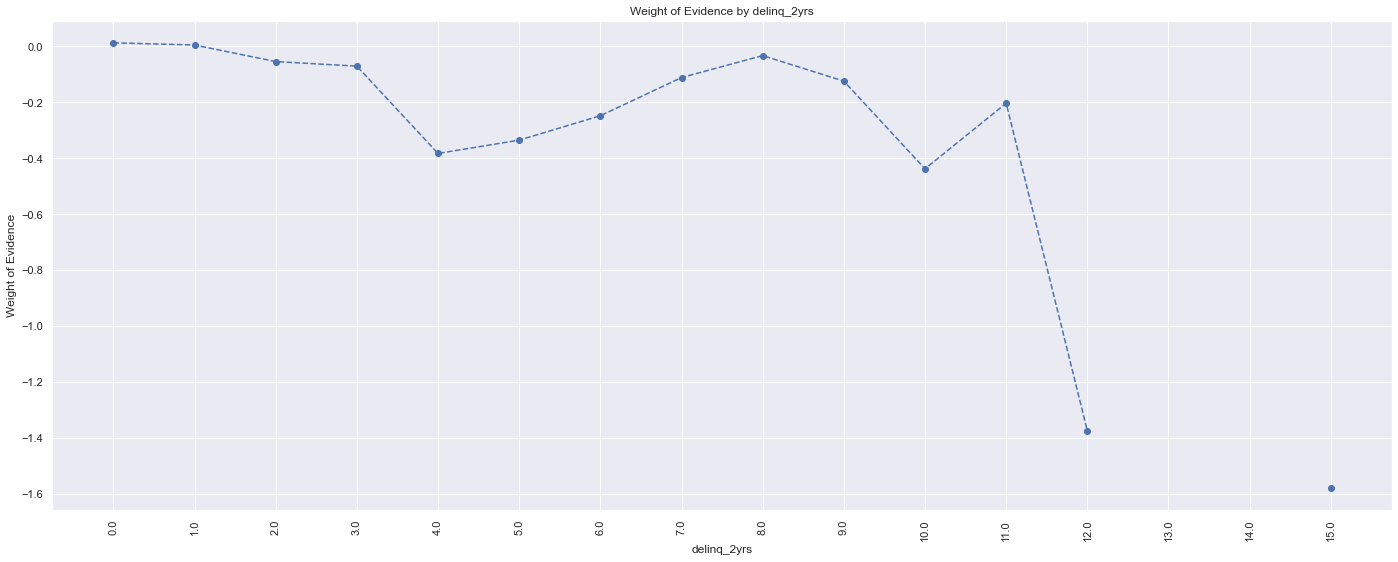

In [114]:
# visualize the weight of evidence by "delinq_2yrs"
plot_woe(df_temp, 'delinq_2yrs', 'WoE', 90)

In [115]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [116]:
# print the unique value of the "delinq_2yrs" variable
df_inputs_prepr['inq_last_6mths'].unique()

array([0., 1., 3., 4., 2., 5., 6.])

In [117]:
# the next variable to deal with is the "delinq_2yrs" variable 
# let's split the variable into 50 categories
# df_inputs_prepr['inq_last_6mths_factor'] = pd.cut(df_inputs_prepr['inq_last_6mths'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
# df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

inq_last_6mths   n_obs  prop_good  obs_prop    n_good   n_bad  prop_n_good  \
0             0.0  256407   0.991615  0.608907  254257.0  2150.0     0.610029   
1             1.0  111346   0.988298  0.264421  110043.0  1303.0     0.264022   
2             2.0   36292   0.985176  0.086185   35754.0   538.0     0.085783   
3             3.0   12272   0.980769  0.029143   12036.0   236.0     0.028878   
4             4.0    3517   0.986068  0.008352    3468.0    49.0     0.008321   
5             5.0    1217   0.981101  0.002890    1194.0    23.0     0.002865   
6             6.0      43   1.000000  0.000102      43.0     0.0     0.000103   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0    0.500116  0.198666             NaN       NaN         inf  
1    0.303094 -0.138010        0.003317  0.336676         inf  
2    0.125145 -0.377653        0.003122  0.239643         inf  
3    0.054896 -0.642386        0.004407  0.264733         inf  
4    0.011398 -0.314699        0.005298  0.327687         inf  
5    0.005350 -0.624642        0.004967  0.309943         inf  
6    0.000000       inf        0.018899       inf         inf

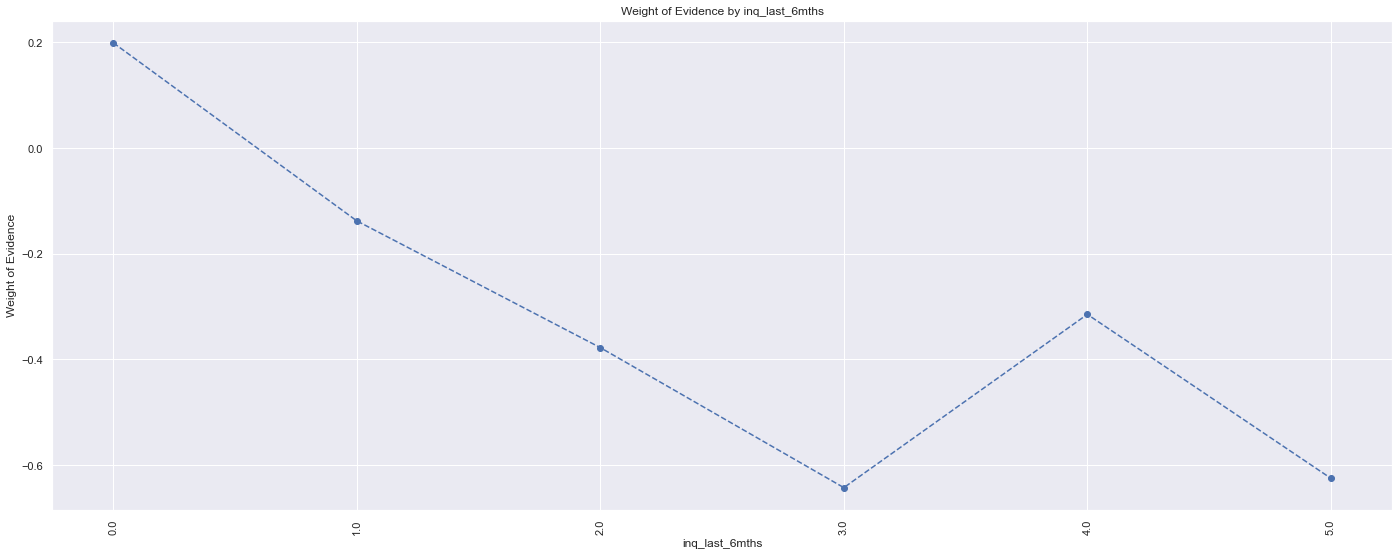

In [118]:
# visualize the weight of evidence by "delinq_2yrs"
plot_woe(df_temp, 'inq_last_6mths', 'WoE', 90)

In [119]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths: 0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths: 1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths: 3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths: > 6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [120]:
# print the unique value of the "open_acc" variable
df_inputs_prepr['open_acc'].unique()

array([17., 15.,  6., 10.,  7.,  9.,  5., 30., 12., 21., 18., 13.,  8.,
       16.,  4., 11., 33., 14.,  3., 28., 19., 24., 20., 22., 29., 27.,
       23., 25., 26., 34., 46.,  2., 35., 32., 40., 55., 37., 39., 31.,
       36., 38., 47., 44.,  1., 42., 41., 43., 52., 45., 53., 65., 51.,
       58., 67., 49., 50., 57., 48., 66., 54., 68., 61., 70., 60., 56.,
       82., 63., 59., 64., 62., 79., 74., 90.])

In [121]:
# the next variable to deal with is the "delinq_2yrs" variable 
# let's split the variable into 50 categories
# df_inputs_prepr['open_acc_factor'] = pd.cut(df_inputs_prepr['open_acc'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
# df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


open_acc  n_obs  prop_good  obs_prop   n_good  n_bad  prop_n_good  \
0        1.0     90   0.988889  0.000214     89.0    1.0     0.000214   
1        2.0    986   0.984787  0.002342    971.0   15.0     0.002330   
2        3.0   4119   0.990046  0.009782   4078.0   41.0     0.009784   
3        4.0  10779   0.989424  0.025598  10665.0  114.0     0.025588   
4        5.0  18222   0.989463  0.043273  18030.0  192.0     0.043259   
5        6.0  25117   0.988892  0.059647  24838.0  279.0     0.059593   
6        7.0  30294   0.989404  0.071941  29973.0  321.0     0.071913   
7        8.0  34685   0.989217  0.082369  34311.0  374.0     0.082321   
8        9.0  36266   0.990239  0.086123  35912.0  354.0     0.086162   
9       10.0  35809   0.989388  0.085038  35429.0  380.0     0.085003   
10      11.0  33153   0.989654  0.078731  32810.0  343.0     0.078720   
11      12.0  30105   0.988474  0.071492  29758.0  347.0     0.071397   
12      13.0  26836   0.990982  0.063729  26594.0  242.0     0.063806   
13      14.0  23084   0.990556  0.054819  22866.0  218.0     0.054862   
14      15.0  19544   0.989050  0.046412  19330.0  214.0     0.046378   
15      16.0  16501   0.990243  0.039186  16340.0  161.0     0.039204   
16      17.0  13870   0.990267  0.032938  13735.0  135.0     0.032954   
17      18.0  11462   0.990839  0.027220  11357.0  105.0     0.027248   
18      19.0   9627   0.990651  0.022862   9537.0   90.0     0.022882   
19      20.0   7807   0.991546  0.018540   7741.0   66.0     0.018573   
20      21.0   6321   0.989717  0.015011   6256.0   65.0     0.015010   
21      22.0   5209   0.990209  0.012370   5158.0   51.0     0.012375   
22      23.0   4170   0.987770  0.009903   4119.0   51.0     0.009883   
23      24.0   3423   0.989483  0.008129   3387.0   36.0     0.008126   
24      25.0   2767   0.994579  0.006571   2752.0   15.0     0.006603   
25      26.0   2088   0.990900  0.004959   2069.0   19.0     0.004964   
26      27.0   1758   0.993174  0.004175   1746.0   12.0     0.004189   
27      28.0   1356   0.989676  0.003220   1342.0   14.0     0.003220   
28      29.0   1126   0.992895  0.002674   1118.0    8.0     0.002682   
29      30.0    845   0.990533  0.002007    837.0    8.0     0.002008   
30      31.0    689   0.991292  0.001636    683.0    6.0     0.001639   
31      32.0    638   0.992163  0.001515    633.0    5.0     0.001519   
32      33.0    482   0.987552  0.001145    476.0    6.0     0.001142   
33      34.0    362   0.997238  0.000860    361.0    1.0     0.000866   
34      35.0    284   0.996479  0.000674    283.0    1.0     0.000679   
35      36.0    219   0.981735  0.000520    215.0    4.0     0.000516   
36      37.0    187   0.994652  0.000444    186.0    1.0     0.000446   
37      38.0    141   1.000000  0.000335    141.0    0.0     0.000338   
38      39.0    124   1.000000  0.000294    124.0    0.0     0.000298   
39      40.0     99   0.989899  0.000235     98.0    1.0     0.000235   
40      41.0     78   1.000000  0.000185     78.0    0.0     0.000187   
41      42.0     81   1.000000  0.000192     81.0    0.0     0.000194   
42      43.0     53   1.000000  0.000126     53.0    0.0     0.000127   
43      44.0     34   0.970588  0.000081     33.0    1.0     0.000079   
44      45.0     30   0.966667  0.000071     29.0    1.0     0.000070   
45      46.0     32   1.000000  0.000076     32.0    0.0     0.000077   
46      47.0     24   0.958333  0.000057     23.0    1.0     0.000055   
47      48.0     26   1.000000  0.000062     26.0    0.0     0.000062   
48      49.0     15   1.000000  0.000036     15.0    0.0     0.000036   
49      50.0      9   1.000000  0.000021      9.0    0.0     0.000022   
50      51.0     12   1.000000  0.000028     12.0    0.0     0.000029   
51      52.0     11   1.000000  0.000026     11.0    0.0     0.000026   
52      53.0     11   1.000000  0.000026     11.0    0.0     0.000026   
53      54.0      3   1.000000  0.000007      3.0    0.0     0

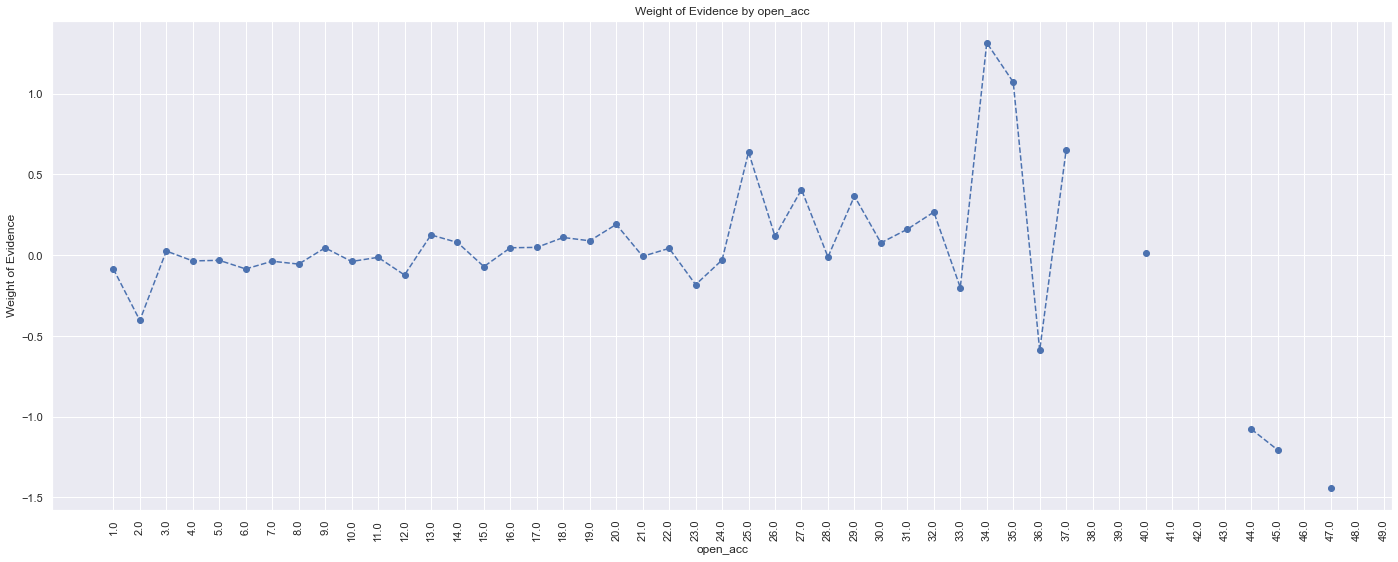

In [122]:
# visualize the weight of evidence by "open_acc"
plot_woe(df_temp, 'open_acc', 'WoE', 90)

In [123]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [124]:
# print the unique value of the "pub_rec" variable
df_inputs_prepr['pub_rec'].unique()

array([ 0.,  2.,  1.,  3.,  5.,  4., 11.,  7.,  6.,  9.,  8., 10., 23.,
       12., 15., 26., 17., 13., 28., 20., 86., 18., 21., 14., 16., 19.,
       49., 22.])

In [125]:
# the next variable to deal with is the "pub_rec" variable 
# let's split the variable into 50 categories
# df_inputs_prepr['pub_rec_factor'] = pd.cut(df_inputs_prepr['pub_rec'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
# df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


pub_rec   n_obs  prop_good  obs_prop    n_good   n_bad  prop_n_good  \
0       0.0  346679   0.989907  0.823282  343180.0  3499.0     0.823378   
1       1.0   60215   0.989106  0.142997   59559.0   656.0     0.142898   
2       2.0    9230   0.990141  0.021919    9139.0    91.0     0.021927   
3       3.0    2876   0.988526  0.006830    2843.0    33.0     0.006821   
4       4.0    1044   0.990421  0.002479    1034.0    10.0     0.002481   
5       5.0     481   0.987526  0.001142     475.0     6.0     0.001140   
6       6.0     249   0.991968  0.000591     247.0     2.0     0.000593   
7       7.0     108   1.000000  0.000256     108.0     0.0     0.000259   
8       8.0      84   1.000000  0.000199      84.0     0.0     0.000202   
9       9.0      34   1.000000  0.000081      34.0     0.0     0.000082   
10     10.0      29   1.000000  0.000069      29.0     0.0     0.000070   
11     11.0      15   1.000000  0.000036      15.0     0.0     0.000036   
12     12.0      14   0.857143  0.000033      12.0     2.0     0.000029   
13     13.0      10   1.000000  0.000024      10.0     0.0     0.000024   
14     14.0       1   1.000000  0.000002       1.0     0.0     0.000002   
15     15.0       5   1.000000  0.000012       5.0     0.0     0.000012   
16     16.0       4   1.000000  0.000009       4.0     0.0     0.000010   
17     17.0       2   1.000000  0.000005       2.0     0.0     0.000005   
18     18.0       3   1.000000  0.000007       3.0     0.0     0.000007   
19     19.0       1   1.000000  0.000002       1.0     0.0     0.000002   
20     20.0       1   1.000000  0.000002       1.0     0.0     0.000002   
21     21.0       3   1.000000  0.000007       3.0     0.0     0.000007   
22     22.0       1   1.000000  0.000002       1.0     0.0     0.000002   
23     23.0       1   1.000000  0.000002       1.0     0.0     0.000002   
24     26.0       1   1.000000  0.000002       1.0     0.0     0.000002   
25     28.0       1   1.000000  0.000002       1.0     0.0     0.000002   
26     49.0       1   1.000000  0.000002       1.0     0.0     0.000002   
27     86.0       1   1.000000  0.000002       1.0     0.0     0.000002   

    prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0     0.813910  0.011566             NaN       NaN         inf  
1     0.152594 -0.065650        0.000801  0.077216         inf  
2     0.021168  0.035235        0.001035  0.100885         inf  
3     0.007676 -0.118105        0.001615  0.153339         inf  
4     0.002326  0.064393        0.001896  0.182497         inf  
5     0.001396 -0.202657        0.002895  0.267050         inf  
6     0.000465  0.242029        0.004442  0.444686         inf  
7     0.000000       inf        0.008032       inf         inf  
8     0.000000       inf        0.000000       NaN         inf  
9     0.000000       inf        0.000000       NaN         inf  
10    0.000000       inf        0.000000       NaN         inf  
11    0.000000       inf        0.000000       NaN         inf  
12    0.000465 -2.782453        0.142857       inf         inf  
13    0.000000       inf        0.142857       inf         inf  
14    0.000000       inf        0.000000       NaN         inf  
15    0.000000       inf        0.000000       NaN         inf  
16    0.000000       inf        0.000000       NaN         inf  
17    0.000000       inf        0.000000       NaN         inf  
18    0.000000       inf        0.000000       NaN         inf  
19    0.000000       inf        0.000000       NaN         inf  
20    0.000000       inf        0.000000       NaN         inf  
21    0.000000       inf        0.000000       NaN         inf  
22    0.000000       inf        0.000000       NaN         inf  
23    0.000000       inf        0.000000       NaN         inf  
24    0.000000       inf        0.000000       NaN         inf  
25    0.000000       inf        0.000000       NaN         inf  
26    0.000000       inf        0.000000       NaN         inf  
27    0.

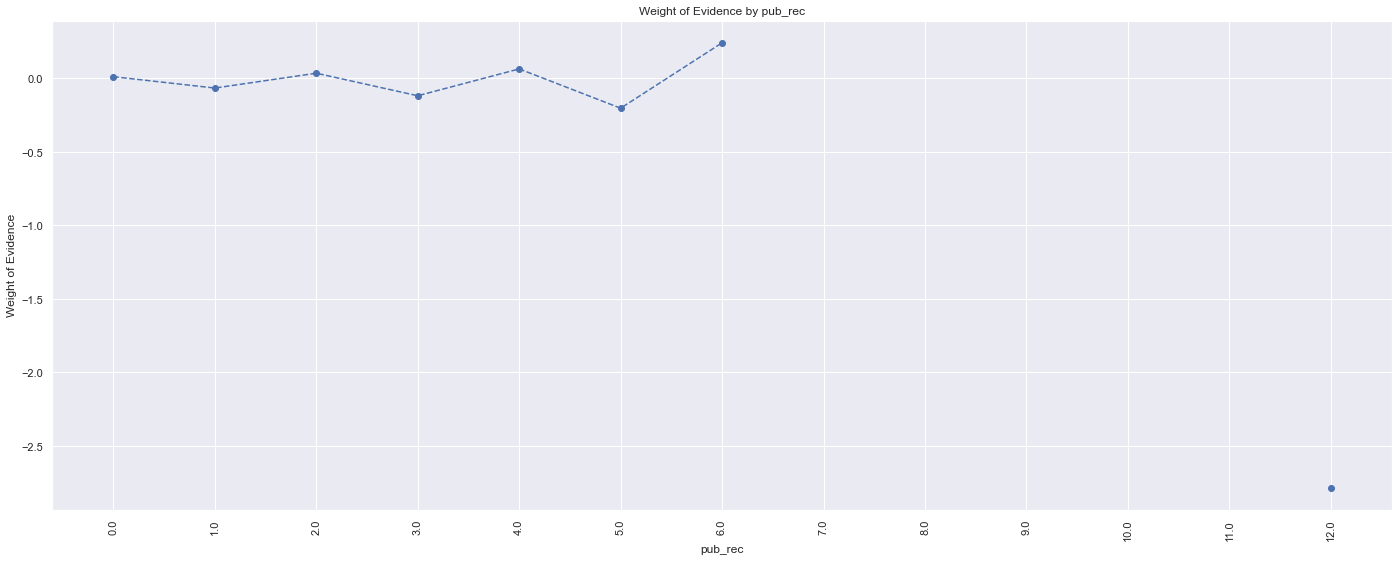

In [126]:
# visualize the weight of evidence by "pub_rec"
plot_woe(df_temp, 'pub_rec', 'WoE', 90)

In [127]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [128]:
# print the unique value of the "total_acc" variable
df_inputs_prepr['total_acc'].unique()

array([ 46.,  24.,   6.,  23.,  18.,  31.,  19.,  13.,  47.,  21.,  35.,
        33.,  22.,  17.,  32.,   7.,  14.,   9.,  72.,  20.,  39.,  37.,
        34.,  27.,  26.,   5.,  69.,  15.,  28.,  25.,  29.,  16.,  38.,
        12.,  10.,  63.,  44.,  43.,  48.,  11.,  36.,  42.,  30.,  49.,
        54.,  53.,  52.,  56.,  40.,  41.,  62.,  45.,  68.,  64.,  58.,
        61.,  65.,   8.,  87.,  50.,   4.,  66.,  59.,  60.,  51.,  89.,
        70.,  71.,  57.,  55.,  77.,  75.,  73.,  67.,  76., 105.,  74.,
       102.,  98.,  85.,  81.,  78.,  83.,  79., 111.,  84.,  86.,  94.,
        97.,  90.,  82.,  93., 127.,  96., 101.,  91.,  80., 112., 125.,
       110.,  95.,  88.,  92., 109., 135.,  99., 106., 104., 151., 130.,
       107., 113., 169., 140., 146., 100., 116., 129., 126., 137., 103.,
       124., 138., 162., 114., 108.])

In [129]:
# the next variable to deal with is the "delinq_2yrs" variable 
# let's split the variable into 50 categories
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
# df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_acc_factor  n_obs  prop_good  obs_prop   n_good  n_bad  prop_n_good  \
0      (3.835, 7.3]  11333   0.988529  0.026913  11203.0  130.0     0.026879   
1       (7.3, 10.6]  21005   0.988003  0.049882  20753.0  252.0     0.049792   
2      (10.6, 13.9]  31446   0.989188  0.074677  31106.0  340.0     0.074631   
3      (13.9, 17.2]  53180   0.989752  0.126290  52635.0  545.0     0.126285   
4      (17.2, 20.5]  44528   0.989782  0.105744  44073.0  455.0     0.105743   
5      (20.5, 23.8]  44749   0.989162  0.106268  44264.0  485.0     0.106201   
6      (23.8, 27.1]  55586   0.990087  0.132004  55035.0  551.0     0.132043   
7      (27.1, 30.4]  35493   0.991069  0.084288  35176.0  317.0     0.084396   
8      (30.4, 33.7]  29540   0.990318  0.070151  29254.0  286.0     0.070188   
9      (33.7, 37.0]  30463   0.990546  0.072343  30175.0  288.0     0.072398   
10     (37.0, 40.3]  16888   0.989874  0.040105  16717.0  171.0     0.040108   
11     (40.3, 43.6]  12873   0.989746  0.030570  12741.0  132.0     0.030569   
12     (43.6, 46.9]   9721   0.989919  0.023085   9623.0   98.0     0.023088   
13     (46.9, 50.2]   9005   0.989895  0.021385   8914.0   91.0     0.021387   
14     (50.2, 53.5]   4532   0.988526  0.010762   4480.0   52.0     0.010749   
15     (53.5, 56.8]   3179   0.990878  0.007549   3150.0   29.0     0.007558   
16     (56.8, 60.1]   2870   0.988850  0.006816   2838.0   32.0     0.006809   
17     (60.1, 63.4]   1465   0.993174  0.003479   1455.0   10.0     0.003491   
18     (63.4, 66.7]    965   0.990674  0.002292    956.0    9.0     0.002294   
19     (66.7, 70.0]    849   0.990577  0.002016    841.0    8.0     0.002018   
20     (70.0, 73.3]    428   0.995327  0.001016    426.0    2.0     0.001022   
21     (73.3, 76.6]    272   0.988971  0.000646    269.0    3.0     0.000645   
22     (76.6, 79.9]    197   0.979695  0.000468    193.0    4.0     0.000463   
23     (79.9, 83.2]    173   0.971098  0.000411    168.0    5.0     0.000403   
24     (83.2, 86.5]     96   0.989583  0.000228     95.0    1.0     0.000228   
25     (86.5, 89.8]     66   0.984848  0.000157     65.0    1.0     0.000156   
26     (89.8, 93.1]     74   1.000000  0.000176     74.0    0.0     0.000178   
27     (93.1, 96.4]     34   1.000000  0.000081     34.0    0.0     0.000082   
28     (96.4, 99.7]     19   0.947368  0.000045     18.0    1.0     0.000043   
29    (99.7, 103.0]     17   1.000000  0.000040     17.0    0.0     0.000041   
30   (103.0, 106.3]     14   1.000000  0.000033     14.0    0.0     0.000034   
31   (106.3, 109.6]      5   1.000000  0.000012      5.0    0.0     0.000012   
32   (109.6, 112.9]      8   0.875000  0.000019      7.0    1.0     0.000017   
33   (112.9, 116.2]      6   1.000000  0.000014      6.0    0.0     0.000014   
34   (116.2, 119.5]      0        NaN  0.000000      NaN    NaN          NaN   
35   (119.5, 122.8]      0        NaN  0.000000      NaN    NaN          NaN   
36   (122.8, 126.1]      4   1.000000  0.000009      4.0    0.0     0.000010   
37   (126.1, 129.4]      2   1.000000  0.000005      2.0    0.0     0.000005   
38   (129.4, 132.7]      1   1.000000  0.000002      1.0    0.0     0.000002   
39   (132.7, 136.0]      1   1.000000  0.000002      1.0    0.0     0.000002   
40   (136.0, 139.3]      2   1.000000  0.000005      2.0    0.0     0.000005   
41   (139.3, 142.6]      1   1.000000  0.000002      1.0    0.0     0.000002   
42   (142.6, 145.9]      0        NaN  0.000000      NaN    NaN          NaN   
43   (145.9, 149.2]      1   1.000000  0.000002      1.0    0.0     0.000002   
44   (149.2, 152.5]      1   1.000000  0.000002      1.0    0.0     0.000002   
45   (152.5, 155.8]      0        NaN  0.000000      NaN    NaN          NaN   
46   (155.8, 159.1]      0        NaN  0.000000      NaN    NaN          NaN   
47   (159.1, 162.4]      1   1.000000  0.000002      1.0    0.0     0.000002   
48   (162.4, 165.7]      0        NaN  0.000000      NaN    NaN          NaN   
49 

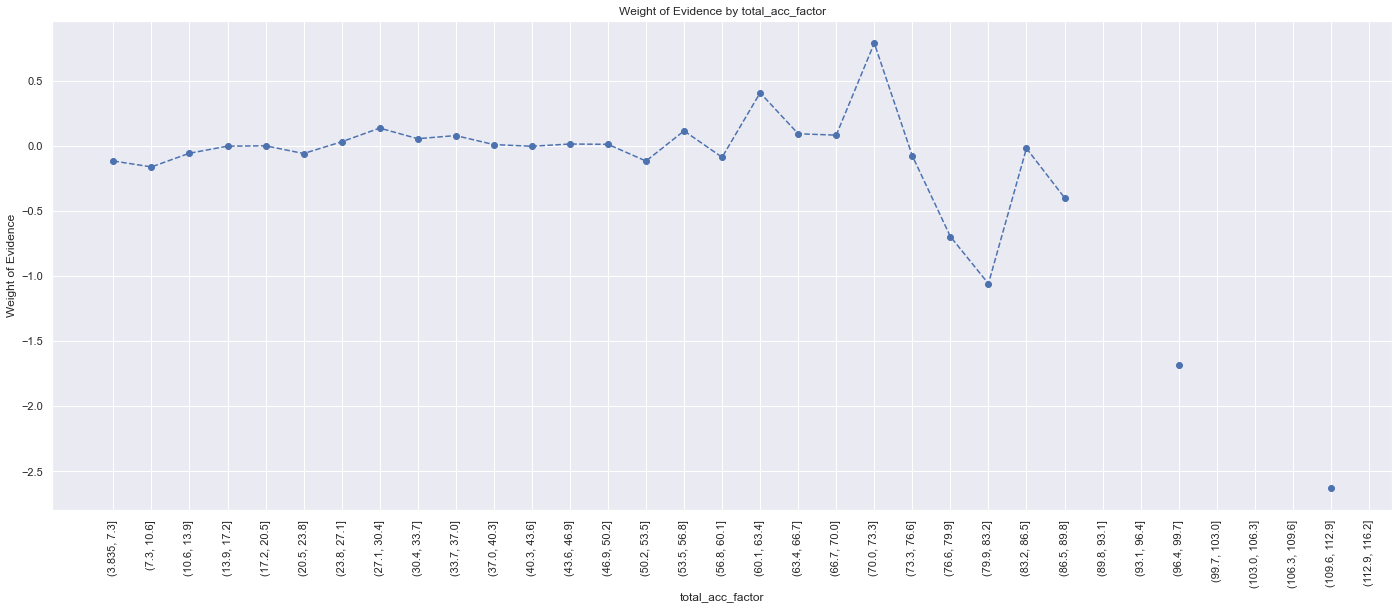

In [130]:
# visualize the weight of evidence by "pub_rec"
plot_woe(df_temp, 'total_acc_factor', 'WoE', 90)

In [131]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [132]:
# print the unique value of the "acc_now_delinq" variable
df_inputs_prepr['acc_now_delinq'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  5.,  6., 14.])

In [133]:
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


acc_now_delinq   n_obs  prop_good  obs_prop    n_good   n_bad  prop_n_good  \
0             0.0  418712   0.989819  0.994343  414449.0  4263.0     0.994371   
1             1.0    2243   0.985288  0.005327    2210.0    33.0     0.005302   
2             2.0     116   0.974138  0.000275     113.0     3.0     0.000271   
3             3.0      17   1.000000  0.000040      17.0     0.0     0.000041   
4             4.0       3   1.000000  0.000007       3.0     0.0     0.000007   
5             5.0       1   1.000000  0.000002       1.0     0.0     0.000002   
6             6.0       1   1.000000  0.000002       1.0     0.0     0.000002   
7            14.0       1   1.000000  0.000002       1.0     0.0     0.000002   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0    0.991626  0.002765             NaN       NaN         inf  
1    0.007676 -0.369972        0.004531  0.372737         inf  
2    0.000698 -0.945437        0.011150  0.575465         inf  
3    0.000000       inf        0.025862       inf         inf  
4    0.000000       inf        0.000000       NaN         inf  
5    0.000000       inf        0.000000       NaN         inf  
6    0.000000       inf        0.000000       NaN         inf  
7    0.000000       inf        0.000000       NaN         inf

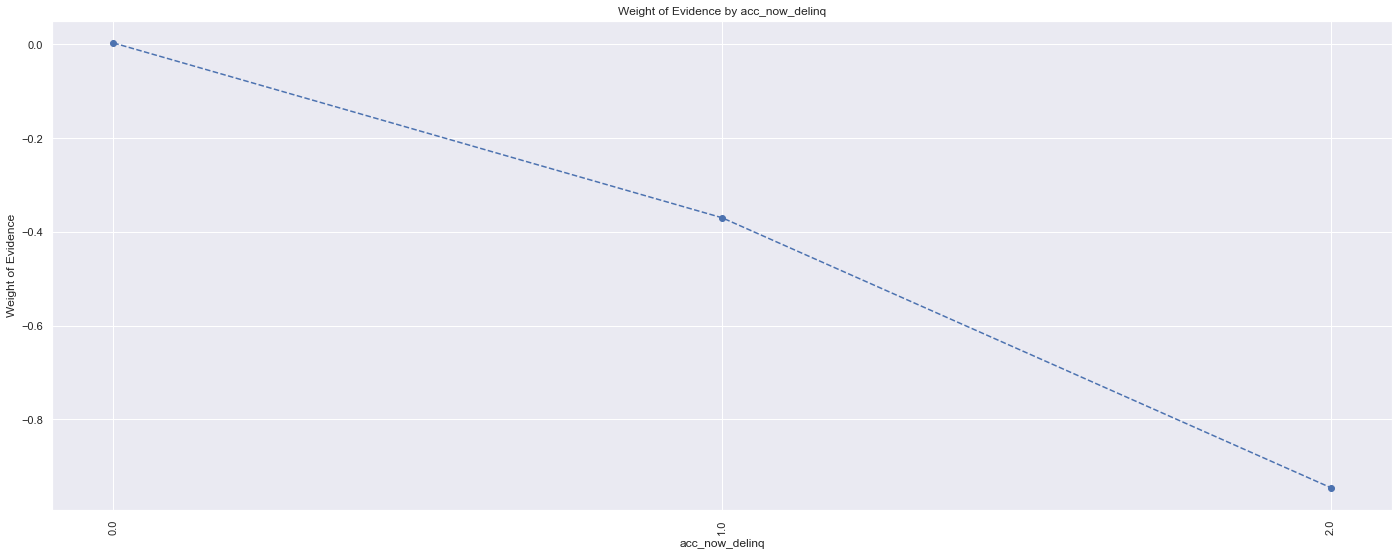

In [134]:
# visualize the weight of evidence by "acc_now_delinq"
plot_woe(df_temp, 'acc_now_delinq', 'WoE', 90)

In [135]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [136]:
# the first interval has the lowest WoE so it will have its own dummy variable
# WoE values from 2.42 to 31.46 change randomly but have a few number of obsevations so will be assigned the same dummy
# intervals starting from  31.46 to 75.02 have apparoximatelty the same WoE and will have the same dummy
# finally, all intervals from that point will have their own dummy variable
# below is the relevant code
df_inputs_prepr['mths_since_last_record_factor: Missing'] = np.where(df_inputs_prepr['mths_since_last_record'].isnull(), 1, 0)
df_inputs_prepr['mths_since_last_record_factor: < 2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record_factor: 3-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record_factor: 32-75'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 75), 1, 0)
df_inputs_prepr['mths_since_last_record_factor: > 76'] = np.where(df_inputs_prepr['mths_since_last_record'] >= 76, 1, 0)

In [137]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_rev_hi_lim_factor  n_obs  prop_good  obs_prop   n_good  n_bad  \
0            (-9999.999, 5000.0]  12981   0.983052  0.030827  12761.0  220.0   
1             (5000.0, 9999.999]  42858   0.985674  0.101778  42244.0  614.0   
2          (9999.999, 14999.998]  56173   0.988446  0.133398  55524.0  649.0   
3         (14999.998, 19999.998]  54873   0.989066  0.130311  54273.0  600.0   
4         (19999.998, 24999.997]  46739   0.990415  0.110994  46291.0  448.0   
5         (24999.997, 29999.997]  38749   0.989677  0.092020  38349.0  400.0   
6         (29999.997, 34999.996]  31075   0.990475  0.073796  30779.0  296.0   
7         (34999.996, 39999.996]  24932   0.990815  0.059208  24703.0  229.0   
8         (39999.996, 44999.996]  20201   0.991981  0.047973  20039.0  162.0   
9         (44999.996, 49999.995]  16418   0.992143  0.038989  16289.0  129.0   
10        (49999.995, 54999.994]  13224   0.991228  0.031404  13108.0  116.0   
11        (54999.994, 59999.994]  10621   0.993221  0.025222  10549.0   72.0   
12        (59999.994, 64999.994]   8361   0.991987  0.019855   8294.0   67.0   
13        (64999.994, 69999.993]   6894   0.991877  0.016372   6838.0   56.0   
14        (69999.993, 74999.992]   5547   0.992789  0.013173   5507.0   40.0   
15        (74999.992, 79999.992]   4515   0.992691  0.010722   4482.0   33.0   
16        (79999.992, 84999.992]   3662   0.993719  0.008696   3639.0   23.0   
17        (84999.992, 89999.991]   3102   0.993230  0.007367   3081.0   21.0   
18         (89999.991, 94999.99]   2650   0.992453  0.006293   2630.0   20.0   
19          (94999.99, 99999.99]   2163   0.995839  0.005137   2154.0    9.0   
20         (99999.99, 104999.99]   1830   0.992350  0.004346   1816.0   14.0   
21       (104999.99, 109999.989]   1543   0.995463  0.003664   1536.0    7.0   
22      (109999.989, 114999.988]   1340   0.991791  0.003182   1329.0   11.0   
23      (114999.988, 119999.988]   1178   0.995756  0.002797   1173.0    5.0   
24      (119999.988, 124999.988]    961   0.995838  0.002282    957.0    4.0   
25      (124999.988, 129999.987]    816   0.997549  0.001938    814.0    2.0   
26      (129999.987, 134999.986]    780   0.996154  0.001852    777.0    3.0   
27      (134999.986, 139999.986]    633   0.993681  0.001503    629.0    4.0   
28      (139999.986, 144999.986]    531   0.990584  0.001261    526.0    5.0   
29      (144999.986, 149999.985]    468   0.995726  0.001111    466.0    2.0   
30      (149999.985, 154999.984]    420   0.988095  0.000997    415.0    5.0   
31      (154999.984, 159999.984]    404   0.990099  0.000959    400.0    4.0   
32      (159999.984, 164999.984]    361   0.997230  0.000857    360.0    1.0   
33      (164999.984, 169999.983]    336   0.994048  0.000798    334.0    2.0   
34      (169999.983, 174999.982]    283   0.996466  0.000672    282.0    1.0   
35      (174999.982, 179999.982]    242   0.991736  0.000575    240.0    2.0   
36      (179999.982, 184999.982]    237   0.991561  0.000563    235.0    2.0   
37      (184999.982, 189999.981]    225   0.991111  0.000534    223.0    2.0   
38       (189999.981, 194999.98]    175   0.994286  0.000416    174.0    1.0   
39        (194999.98, 199999.98]    166   0.993976  0.000394    165.0    1.0   
40        (199999.98, 204999.98]    167   1.000000  0.000397    167.0    0.0   
41       (204999.98, 209999.979]    152   0.993421  0.000361    151.0    1.0   
42      (209999.979, 214999.978]    136   0.985294  0.000323    134.0    2.0   
43      (214999.978, 219999.978]    127   1.000000  0.000302    127.0    0.0   
44      (219999.978, 224999.978]    129   0.992248  0.000306    128.0    1.0   
45      (224999.978, 229999.977]    105   1.000000  0.000249    105.0    0.0   
46      (229999.977, 234999.976]    120   1.000000  0.000285    120.0    0.0   
47      (234999.976, 239999.976]     86   1.000000  0.000204     86.0    0.0   
48      (239999.976, 244999.976]     84   1.000000  0.000199     84.0    0.0   
49      (

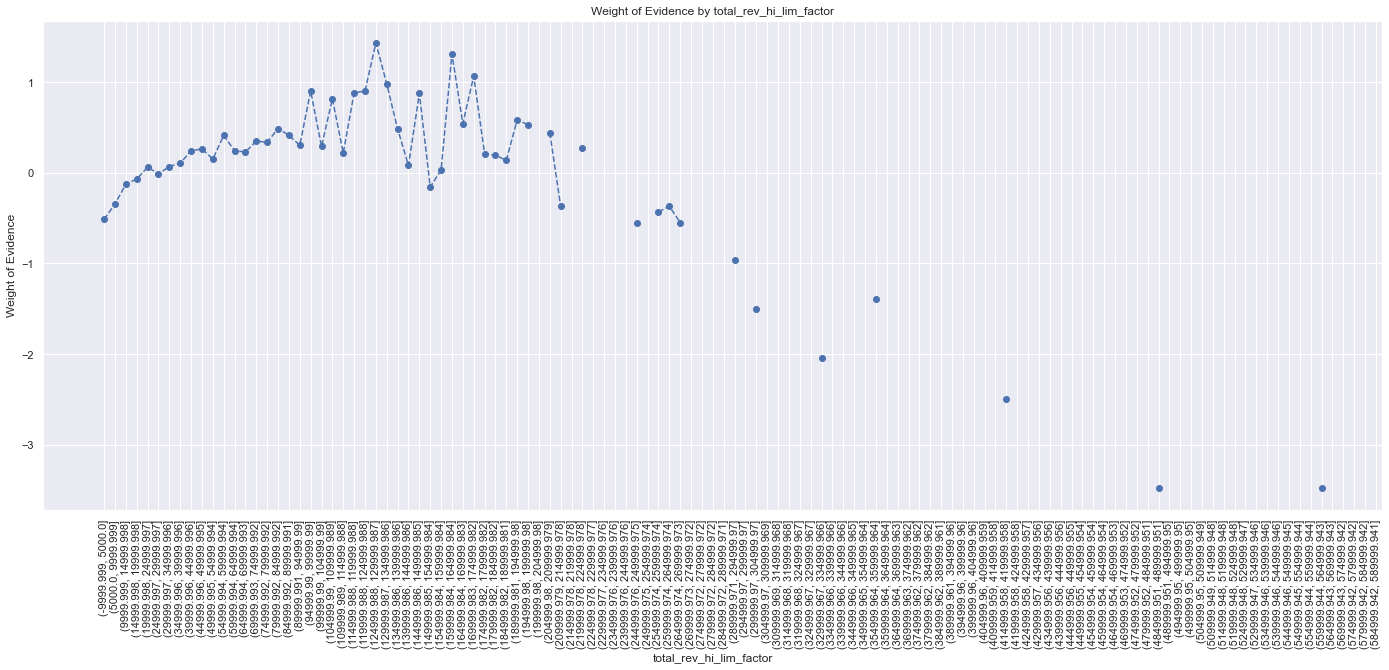

In [138]:
# visualize the weight of evidence by "total_rev_hi_lim"
plot_woe(df_temp, 'total_rev_hi_lim_factor', 'WoE', 90)

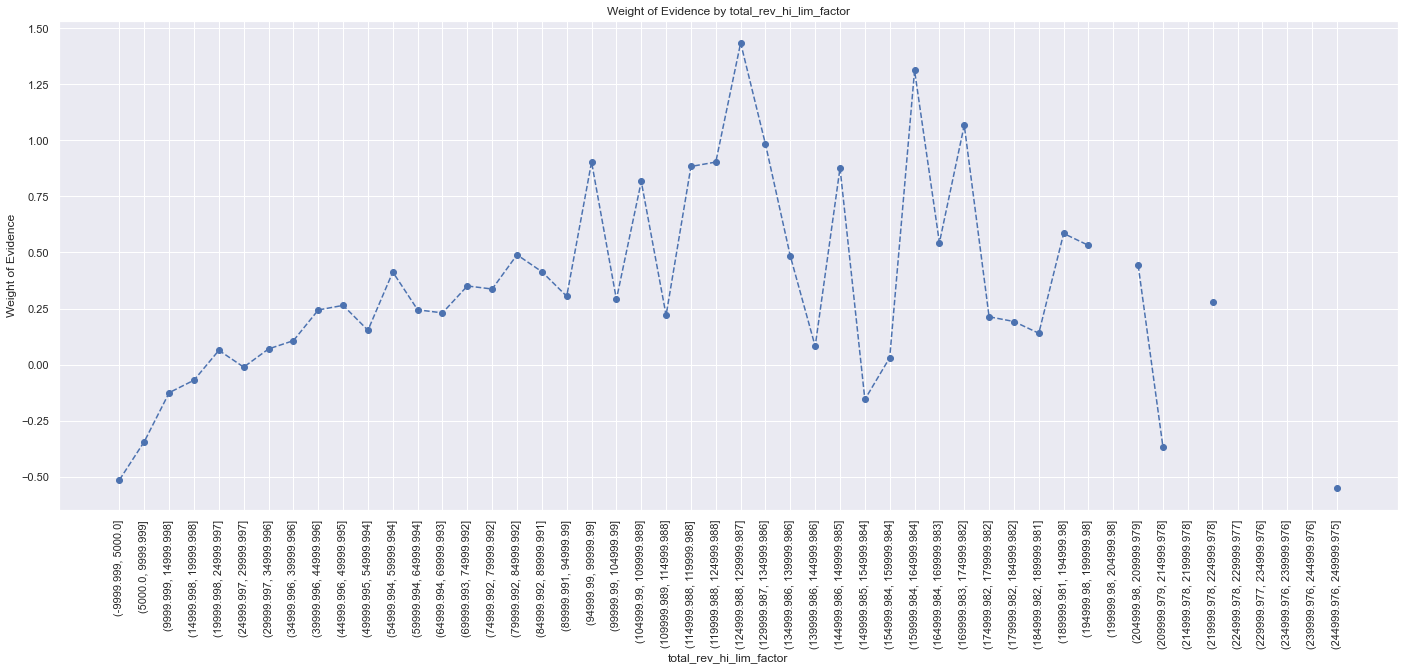

In [139]:
# visualize the weight of evidence by "total_rev_hi_lim"
plot_woe(df_temp.iloc[: 50, : ], 'total_rev_hi_lim_factor', 'WoE', 90)

In [140]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [141]:
# now that the dummies needed are defined we need to assign back the content of this dataframe to a datafame I named "loan_inputs_2015"
loan_inputs_2015 = df_inputs_prepr

# the dataframe for the targets will be renamed "loan_targets_2015"
loan_targets_2015 = df_targets_prepr

# print the shape of the inputs and targets
print('Inputs shape:', loan_inputs_2015.shape)
print('Targets shape:', loan_targets_2015.shape)

Inputs shape: (421094, 324)
Targets shape: (421094,)


In [142]:
# the shapes of the inputs and targets are matching
# let's save the two dataframe in separate csv files
loan_inputs_2015.to_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_inputs_2015.csv')
loan_targets_2015.to_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_targets_2015.csv')

**>>> The code up to here from the other line starting ">>>" is copied from the "Credit Risk Modeling - Part 1" notebook with minor adjustments.**

In [143]:
# what is left to do now is ti use the same dummies we used in the PD model
# they are contained in the csv file we created "inputs_train_with_ref_cat.csv"
inputs_train_with_ref_cat = pd.read_csv('C:/Users/Aylan/Documents/IT/Datasets/inputs_train_with_ref_cat.csv')

# we use a different name of our dataframe named "inputs_2015_with_ref_cat"
inputs_2015_with_ref_cat = loan_inputs_2015.loc[:,
                                             ['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY',
                                              'home_ownership:OWN', 'home_ownership:MORTGAGE', 'addr_state:ND_NE_IA_NV_FL_HI_AL',
                                              'addr_state:NM_VA', 'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
                                              'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR','addr_state:WI_MT', 'addr_state:IL_CT','addr_state:KS_SC_CO_VT_AK_MS', 
                                              'addr_state:WV_NH_WY_DC_ME_ID', 'addr_state:NY', 'addr_state:CA', 'addr_state:TX', 'verification_status:Not Verified', 
                                              'verification_status:Source Verified', 'verification_status:Verified', 'purpose:educ_smb_wedd_renen_mov_house', 
                                              'purpose:credit_card', 'purpose:debt_consolidation', 'purpose:oth_med_vacation', 'purpose:majorpurch_car_homeimpr',
                                               'initial_list_status:f', 'initial_list_status:w', 'term:36', 'term:60', 'emp_length_int:0', 'emp_length_int:1',
                                              'emp_length_int:2-4', 'emp_length_int:5-6', 'emp_length_int:7-9', 'emp_length_int:10', 'mth_issue_date:<38',
                                              'mth_issue_date:38-39', 'mth_issue_date:40-41', 'mth_issue_date:42-48', 'mth_issue_date:49-52',
                                              'mth_issue_date:53-64', 'mth_issue_date:65-84', 'mth_issue_date:>84', 'int_rate: < 9.548', 'int_rate:9.548 - 12.025', 
                                              'int_rate:12.025 - 15.74', 'int_rate:15.74 - 20.281', 'int_rate: > 20.281', 'mth_since_earliest_cr_line:<140',
                                              'mth_since_earliest_cr_line:141-164', 'mth_since_earliest_cr_line:165-247','mth_since_earliest_cr_line:248-270',
                                              'mth_since_earliest_cr_line:271-352', 'mth_since_earliest_cr_line:>352', 
                                              'inq_last_6mths: 0', 'inq_last_6mths: 1-2', 'inq_last_6mths: 3-6', 'inq_last_6mths: > 6', 'total_acc:<=27', 
                                              'total_acc:28-51', 'total_acc:>=52', 'mths_since_last_record: Missing', 'mths_since_last_record: 0-2', 
                                              'mths_since_last_record: 3-20','mths_since_last_record: 21-31', 'mths_since_last_record: 32-80', 
                                              'mths_since_last_record: 81-86', 'mths_since_last_record: > 86', 'annual_inc:<20K', 'annual_inc:20K-30K', 
                                              'annual_inc:30K-40K', 'annual_inc:40K-50K','annual_inc:50K-60K', 'annual_inc:60K-70K', 'annual_inc:70K-80K', 
                                              'annual_inc:80K-90K', 'annual_inc:90K-100K', 'annual_inc:100K-120K', 'annual_inc:120K-140K', 'annual_inc:>140K', 
                                              'dti: <= 1.4', 'dti: 1.4-3.5', 'dti: 3.5-7.7', 'dti: 7.7-10.5', 'dti: 10.5-16.1', 'dti: 16.1-20.3', 'dti: 20.3-21.7', 
                                              'dti: 21.7-22.4', 'dti: 22.4-35', 'dti: > 35', 'mths_since_last_delinq:Missing', 'mths_since_last_delinq:0-3', 
                                              'mths_since_last_delinq:4-30', 'mths_since_last_delinq:31-56', 'mths_since_last_delinq:>=57']]

# check the shape of both "inputs_train_with_ref_cat" and "inputs_2015_with_ref_cat" dataframe
print('"inputs_train_with_ref_cat" shape:', inputs_train_with_ref_cat.shape)
print('"inputs_2015_with_ref_cat" shape:', inputs_2015_with_ref_cat.shape)

"inputs_train_with_ref_cat" shape: (373028, 103)
"inputs_2015_with_ref_cat" shape: (421094, 102)


In [144]:
# there is an extra column in the "inputs_train_with_ref_cat" dataframe
# I wrote the short code below to identify this column
l = []
for i in inputs_train_with_ref_cat.columns:
  if i not in inputs_2015_with_ref_cat.columns:
    l.append(i)

l

['Unnamed: 0']

In [145]:
# the extra column is the "Unnamed: 0", we need to get rid of it
inputs_train_with_ref_cat.drop(['Unnamed: 0'], axis = 1, inplace = True)

# check again the shape of both "inputs_train_with_ref_cat" and "inputs_2015_with_ref_cat" dataframe
print('"inputs_train_with_ref_cat" shape:', inputs_train_with_ref_cat.shape)
print('"inputs_2015_with_ref_cat" shape:', inputs_2015_with_ref_cat.shape)

"inputs_train_with_ref_cat" shape: (373028, 102)
"inputs_2015_with_ref_cat" shape: (421094, 102)


In [146]:
# we want to calculate PSI not only for the original independant variables from the PD model but also for its outcome: the credit score
# the reason is to see if the credit score has changed, this sufficient reason to rework our model if it is the case
# that means we need to score the train data we used to build the model and the new data
# we already scored the test data, so we can use the same code to score these two dataframes too
# first let's get the scorecard
df_scorecard = pd.read_csv('C:/Users/Aylan/Documents/IT/Datasets/df_scorecard.csv', index_col = 0)

# dosplay the dataframe
df_scorecard

index                           Feature Name  Coefficients  \
0        0                              Intercept     -1.394022   
1        1                                grade:A      1.118854   
2        2                                grade:B      0.915756   
3        3                                grade:C      0.717694   
4        4                                grade:D      0.528501   
5        5                                grade:E      0.338641   
6        6                                grade:F      0.138195   
7        7                     home_ownership:OWN      0.080361   
8        8                home_ownership:MORTGAGE      0.088254   
9        9                       addr_state:NM_VA      0.035904   
10      10           addr_state:OK_TN_MO_LA_MD_NC      0.062053   
11      11                 addr_state:UT_KY_AZ_NJ      0.071627   
12      12              addr_state:AR_MI_PA_OH_MN      0.132076   
13      13              addr_state:RI_MA_DE_SD_IN      0.104608   
14      14                    addr_state:GA_WA_OR      0.163785   
15      15                       addr_state:WI_MT      0.246474   
16      16                       addr_state:IL_CT      0.259963   
17      17           addr_state:KS_SC_CO_VT_AK_MS      0.314811   
18      18           addr_state:WV_NH_WY_DC_ME_ID      0.513708   
19      19                          addr_state:NY      0.067455   
20      20                          addr_state:CA      0.041828   
21      21                          addr_state:TX      0.226102   
22      22       verification_status:Not Verified      0.093228   
23      23           verification_status:Verified      0.005045   
24      24                    purpose:credit_card      0.338507   
25      25             purpose:debt_consolidation      0.221279   
26      26               purpose:oth_med_vacation      0.215191   
27      27        purpose:majorpurch_car_homeimpr      0.291847   
28      28                  initial_list_status:w      0.061415   
29      29                                term:36      0.069380   
30      30                       emp_length_int:1      0.100726   
31      31                     emp_length_int:2-4      0.123496   
32      32                     emp_length_int:5-6      0.095577   
33      33                     emp_length_int:7-9      0.065633   
34      34                      emp_length_int:10      0.127227   
35      35                     mth_issue_date:<38      1.500592   
36      36                   mth_issue_date:38-39      1.175843   
37      37                   mth_issue_date:40-41      1.013836   
38      38                   mth_issue_date:42-48      0.748066   
39      39                   mth_issue_date:49-52      0.518073   
40      40                   mth_issue_date:53-64      0.223116   
41      41                   mth_issue_date:65-84     -0.069147   
42      42                      int_rate: < 9.548      0.905724   
43      43                int_rate:9.548 - 12.025      0.534371   
44      44                int_rate:12.025 - 15.74      0.298223   
45      45                int_rate:15.74 - 20.281      0.098675   
46      46     mth_since_earliest_cr_line:141-164      0.066020   
47      47     mth_since_earliest_cr_line:165-247      0.040621   
48      48     mth_since_earliest_cr_line:248-270      0.093674   
49      49     mth_since_earliest_cr_line:271-352      0.136033   
50      50        mth_since_earliest_cr_line:>352      0.133420   
51      51                      inq_last_6mths: 0      0.693122   
52      52                    inq_last_6mths: 1-2      0.544354   
53      53                    inq_last_6mths: 3-6      0.324412   
54      54                        total_acc:28-51     -0.041048   
55      55                         total_acc:>=52      0.023017   
56      56        mths_since_last_record: Missing      0.364517   
57      57           mths_since_last_record: 3-20      0.484324   
58      58          mths_since_last_record: 21-31   

In [147]:
# we want to multilply the dummy variables from each dataframe by the scores from the scorecard
# so we need to add a column that will multiply by the intercept to each of the dataframes with dummy variables
# the first step is to create a dataframe identical to "inputs_train_with_ref_cat"
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat
inputs_train_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

# we order the columns of this dataframe in the same way as the feature names from the scorecard dataframe
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat_w_intercept[df_scorecard['Feature Name'].values]
inputs_train_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
0          1        1        0        0        0        0        0   
1          1        0        0        1        0        0        0   
2          1        1        0        0        0        0        0   
3          1        0        0        0        1        0        0   
4          1        0        0        1        0        0        0   

   home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
0                   0                        1                 0   
1                   0                        1                 0   
2                   0                        1                 0   
3                   0                        0                 0   
4                   0                        1                 0   

   addr_state:OK_TN_MO_LA_MD_NC  addr_state:UT_KY_AZ_NJ  \
0                             0                       0   
1                             0                       1   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   addr_state:AR_MI_PA_OH_MN  addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  \
0                          0                          0                    0   
1                          0                          0                    0   
2                          0                          0                    1   
3                          0                          1                    0   
4                          0                          0                    0   

   addr_state:WI_MT  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
0                 0                 0                             1   
1                 0                 0                             0   
2                 0                 0                             0   
3                 0                 0                             0   
4                 0                 0                             0   

   addr_state:WV_NH_WY_DC_ME_ID  addr_state:NY  addr_state:CA  addr_state:TX  \
0                             0              0              0              0   
1                             0              0              0              0   
2                             0              0              0              0   
3                             0              0              0              0   
4                             0              0              1              0   

   verification_status:Not Verified  verification_status:Verified  \
0                                 0                             0   
1                                 1                             0   
2                                 0                             1   
3                                 0                             0   
4                                 0                             1   

   purpose:credit_card  purpose:debt_consolidation  purpose:oth_med_vacation  \
0                    0                           1                         0   
1                    0                           1                         0   
2                    0                           1                         0   
3                    0                           1                         0   
4                    0                           0                         0   

   purpose:majorpurch_car_homeimpr  initial_list_status:w  term:36  \
0                                0                      0        1   
1                                0                      0        1   
2                                0                      0        1   
3                                0                      0        1   
4                                0                      0        1   

   emp_length_int:1  emp_length_int:2-4  emp_length_int:5-6  \
0                 0                   1          

In [148]:
# analogically we do the same for the "inputs_2015_with_ref_cat" dataframe
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat
inputs_2015_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

# we order the columns of this dataframe in the same way as the feature names from the scorecard dataframe
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat_w_intercept[df_scorecard['Feature Name'].values]
inputs_2015_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
0          1        0        0        1        0        0        0   
1          1        1        0        0        0        0        0   
2          1        0        0        1        0        0        0   
3          1        0        0        1        0        0        0   
4          1        0        1        0        0        0        0   

   home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
0                   0                        1                 0   
1                   0                        1                 0   
2                   0                        0                 0   
3                   0                        0                 0   
4                   0                        1                 0   

   addr_state:OK_TN_MO_LA_MD_NC  addr_state:UT_KY_AZ_NJ  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   addr_state:AR_MI_PA_OH_MN  addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  \
0                          0                          0                    0   
1                          0                          1                    0   
2                          0                          0                    0   
3                          0                          1                    0   
4                          0                          0                    0   

   addr_state:WI_MT  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
0                 0                 0                             0   
1                 0                 0                             0   
2                 0                 0                             1   
3                 0                 0                             0   
4                 0                 1                             0   

   addr_state:WV_NH_WY_DC_ME_ID  addr_state:NY  addr_state:CA  addr_state:TX  \
0                             1              0              0              0   
1                             0              0              0              0   
2                             0              0              0              0   
3                             0              0              0              0   
4                             0              0              0              0   

   verification_status:Not Verified  verification_status:Verified  \
0                                 0                             0   
1                                 1                             0   
2                                 0                             0   
3                                 1                             0   
4                                 1                             0   

   purpose:credit_card  purpose:debt_consolidation  purpose:oth_med_vacation  \
0                    0                           0                         0   
1                    1                           0                         0   
2                    0                           1                         0   
3                    0                           1                         0   
4                    0                           0                         0   

   purpose:majorpurch_car_homeimpr  initial_list_status:w  term:36  \
0                                1                      1        0   
1                                0                      1        1   
2                                0                      1        1   
3                                0                      1        0   
4                                1                      1        0   

   emp_length_int:1  emp_length_int:2-4  emp_length_int:5-6  \
0                 0                   0          

In [149]:
# now we have to take only the scores from the scorecard and ensure that their shape is (103, 1) to make sure the dot product calculation is possible 
scorecard_scores = df_scorecard['Score - Final']
scorecard_scores = scorecard_scores.values.reshape(103,1)

# now we do the multiplication
y_scores_train = inputs_train_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores_train.head()

0
0 -21545.0
1 -21639.0
2 -21569.0
3 -21696.0
4 -21715.0

In [150]:
y_scores_2015 = inputs_2015_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores_2015.head()

0
0 -21466.0
1 -21458.0
2 -21573.0
3 -21585.0
4 -21511.0

In [151]:
# let's concatenate these results with the main dataframes
inputs_train_with_ref_cat_w_intercept = pd.concat([inputs_train_with_ref_cat_w_intercept, y_scores_train], axis = 1)
inputs_2015_with_ref_cat_w_intercept = pd.concat([inputs_2015_with_ref_cat_w_intercept, y_scores_2015], axis = 1)

In [152]:
inputs_train_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
0          1        1        0        0        0        0        0   
1          1        0        0        1        0        0        0   
2          1        1        0        0        0        0        0   
3          1        0        0        0        1        0        0   
4          1        0        0        1        0        0        0   

   home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
0                   0                        1                 0   
1                   0                        1                 0   
2                   0                        1                 0   
3                   0                        0                 0   
4                   0                        1                 0   

   addr_state:OK_TN_MO_LA_MD_NC  addr_state:UT_KY_AZ_NJ  \
0                             0                       0   
1                             0                       1   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   addr_state:AR_MI_PA_OH_MN  addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  \
0                          0                          0                    0   
1                          0                          0                    0   
2                          0                          0                    1   
3                          0                          1                    0   
4                          0                          0                    0   

   addr_state:WI_MT  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
0                 0                 0                             1   
1                 0                 0                             0   
2                 0                 0                             0   
3                 0                 0                             0   
4                 0                 0                             0   

   addr_state:WV_NH_WY_DC_ME_ID  addr_state:NY  addr_state:CA  addr_state:TX  \
0                             0              0              0              0   
1                             0              0              0              0   
2                             0              0              0              0   
3                             0              0              0              0   
4                             0              0              1              0   

   verification_status:Not Verified  verification_status:Verified  \
0                                 0                             0   
1                                 1                             0   
2                                 0                             1   
3                                 0                             0   
4                                 0                             1   

   purpose:credit_card  purpose:debt_consolidation  purpose:oth_med_vacation  \
0                    0                           1                         0   
1                    0                           1                         0   
2                    0                           1                         0   
3                    0                           1                         0   
4                    0                           0                         0   

   purpose:majorpurch_car_homeimpr  initial_list_status:w  term:36  \
0                                0                      0        1   
1                                0                      0        1   
2                                0                      0        1   
3                                0                      0        1   
4                                0                      0        1   

   emp_length_int:1  emp_length_int:2-4  emp_length_int:5-6  \
0                 0                   1          

In [153]:
# let's rename the last column as "Score"
inputs_train_with_ref_cat_w_intercept.columns.values[inputs_train_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
inputs_2015_with_ref_cat_w_intercept.columns.values[inputs_2015_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'

# display the first few rows
inputs_train_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
0          1        1        0        0        0        0        0   
1          1        0        0        1        0        0        0   
2          1        1        0        0        0        0        0   
3          1        0        0        0        1        0        0   
4          1        0        0        1        0        0        0   

   home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
0                   0                        1                 0   
1                   0                        1                 0   
2                   0                        1                 0   
3                   0                        0                 0   
4                   0                        1                 0   

   addr_state:OK_TN_MO_LA_MD_NC  addr_state:UT_KY_AZ_NJ  \
0                             0                       0   
1                             0                       1   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   addr_state:AR_MI_PA_OH_MN  addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  \
0                          0                          0                    0   
1                          0                          0                    0   
2                          0                          0                    1   
3                          0                          1                    0   
4                          0                          0                    0   

   addr_state:WI_MT  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
0                 0                 0                             1   
1                 0                 0                             0   
2                 0                 0                             0   
3                 0                 0                             0   
4                 0                 0                             0   

   addr_state:WV_NH_WY_DC_ME_ID  addr_state:NY  addr_state:CA  addr_state:TX  \
0                             0              0              0              0   
1                             0              0              0              0   
2                             0              0              0              0   
3                             0              0              0              0   
4                             0              0              1              0   

   verification_status:Not Verified  verification_status:Verified  \
0                                 0                             0   
1                                 1                             0   
2                                 0                             1   
3                                 0                             0   
4                                 0                             1   

   purpose:credit_card  purpose:debt_consolidation  purpose:oth_med_vacation  \
0                    0                           1                         0   
1                    0                           1                         0   
2                    0                           1                         0   
3                    0                           1                         0   
4                    0                           0                         0   

   purpose:majorpurch_car_homeimpr  initial_list_status:w  term:36  \
0                                0                      0        1   
1                                0                      0        1   
2                                0                      0        1   
3                                0                      0        1   
4                                0                      0        1   

   emp_length_int:1  emp_length_int:2-4  emp_length_int:5-6  \
0                 0                   1          

In [154]:
# we calculate the PSI with categorical dummy variables
# this means we have to turn the column "Score" into a dummy variable as well
# to be continued ....